In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk

In [2]:
data = pd.read_csv("used_device_data.csv")

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Nuwanga Wijamuni\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
data.head(10)

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0        Honor  Android        14.50  yes   no            13.0   
1        Honor  Android        17.30  yes  yes            13.0   
2        Honor  Android        16.69  yes  yes            13.0   
3        Honor  Android        25.50  yes  yes            13.0   
4        Honor  Android        15.32  yes   no            13.0   
5        Honor  Android        16.23  yes   no            13.0   
6        Honor  Android        13.84  yes   no             8.0   
7        Honor  Android        15.77  yes   no            13.0   
8        Honor  Android        15.32  yes   no            13.0   
9        Honor  Android        16.23  yes   no            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0              5.0             64.0  3.0   3020.0   146.0          2020   
1             16.0            128.0  8.0   4300.0   213.0          2020   
2              8.0            128.0  8.0   4200.0   213.0          2020   
3              8.0             64.0  6.0   7250.0   480.0          2020   
4              8.0             64.0  3.0   5000.0   185.0          2020   
5              8.0             64.0  4.0   4000.0   176.0          2020   
6              5.0             32.0  2.0   3020.0   144.0          2020   
7              8.0             64.0  4.0   3400.0   164.0          2020   
8             16.0            128.0  6.0   4000.0   165.0          2020   
9              8.0            128.0  6.0   4000.0   176.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837  
5        223               4.413889              5.060694  
6        234               3.878259              4.518958  
7        219               4.729421              5.188726  
8        161               4.886054              5.299916  
9        327               4.773224              5.073610

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
data.describe()


screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

In [7]:
data.isnull().sum()


device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<AxesSubplot: >

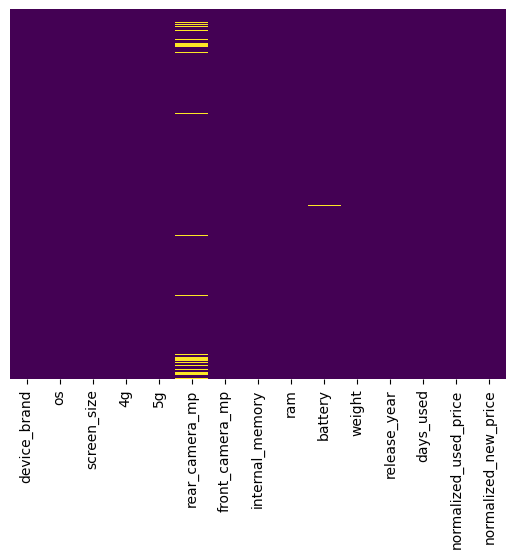

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data = data.dropna()


<AxesSubplot: >

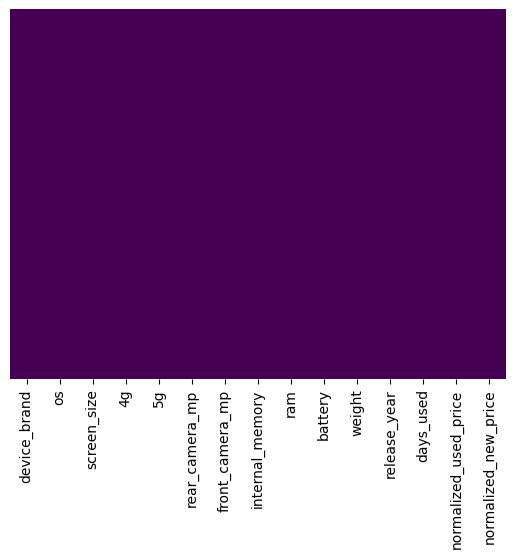

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
data.duplicated().sum()

0

In [12]:
dict_G = {'yes':1,'no':0}


In [13]:
data['4g'] = data['4g'].map(dict_G)


In [14]:
data['5g'] = data['5g'].map(dict_G)

In [15]:
brand_dict = data.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
data['Device_Brand'] = data['device_brand'].map(brand_dict)

In [16]:
data.head()

device_brand       os  screen_size  4g  5g  rear_camera_mp  front_camera_mp  \
0        Honor  Android        14.50   1   0            13.0              5.0   
1        Honor  Android        17.30   1   1            13.0             16.0   
2        Honor  Android        16.69   1   1            13.0              8.0   
3        Honor  Android        25.50   1   1            13.0              8.0   
4        Honor  Android        15.32   1   0            13.0              8.0   

   internal_memory  ram  battery  weight  release_year  days_used  \
0             64.0  3.0   3020.0   146.0          2020        127   
1            128.0  8.0   4300.0   213.0          2020        325   
2            128.0  8.0   4200.0   213.0          2020        162   
3             64.0  6.0   7250.0   480.0          2020        345   
4             64.0  3.0   5000.0   185.0          2020        293   

   normalized_used_price  normalized_new_price  Device_Brand  
0               4.307572              4.715100      4.683326  
1               5.162097              5.519018      4.683326  
2               5.111084              5.884631      4.683326  
3               5.135387              5.630961      4.683326  
4               4.389995              4.947837      4.683326

In [17]:
len(data.device_brand.value_counts())

33

In [18]:
data.device_brand.unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [19]:
Max_brand = data['device_brand'].value_counts().sort_values(ascending=False)[0:20]
Max_brand.name = 'Count'
Max_brand.index.name = 'Brands'

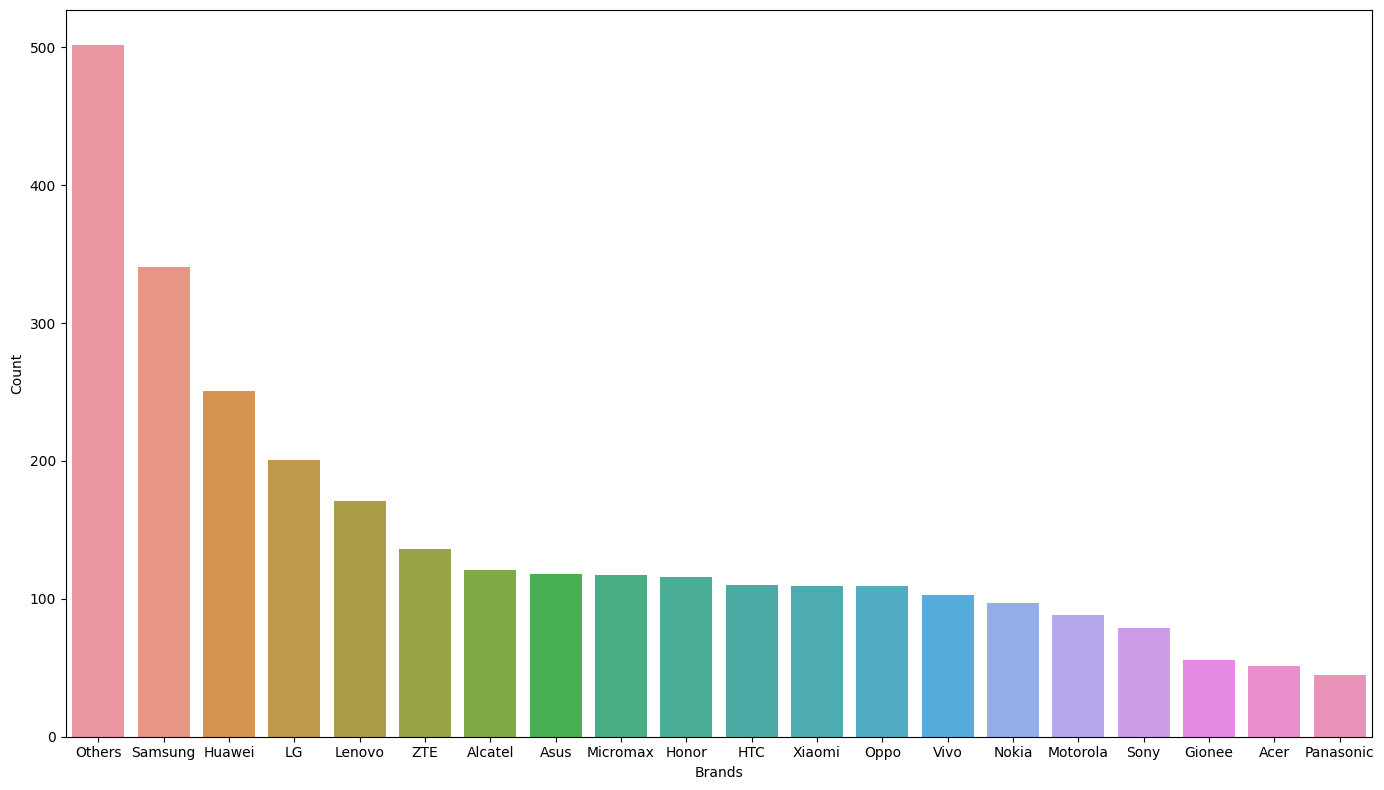

In [20]:
fig = plt.figure(figsize=(14,8))
sns.barplot(x=Max_brand.index,y= Max_brand)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Lava'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'LG'),
  Text(7, 0, 'Micromax'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'Oppo'),
  Text(10, 0, 'Samsung'),
  Text(11, 0, 'Vivo'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'ZTE'),
  Text(14, 0, 'Apple'),
  Text(15, 0, 'Asus'),
  Text(16, 0, 'Acer'),
  Text(17, 0, 'Alcatel'),
  Text(18, 0, 'BlackBerry'),
  Text(19, 0, 'Celkon'),
  Text(20, 0, 'Coolpad'),
  Text(21, 0, 'Gionee'),
  Text(22, 0, 'Google'),
  Text(23, 0, 'Karbonn'),
  Text(24, 0, 'Meizu'),
  Text(25, 0, 'Microsoft'),
  Text(26, 0, 'Motorola'),
  Text(27, 0, 'OnePlus'),
  Text(28, 0, 'Panasonic'),
  Text(29, 0, 'Realme'),
  Text(30, 0, 'Sony'),
  Text(31, 0, 'Spice'),
  Text(32, 0, 'XOLO')])

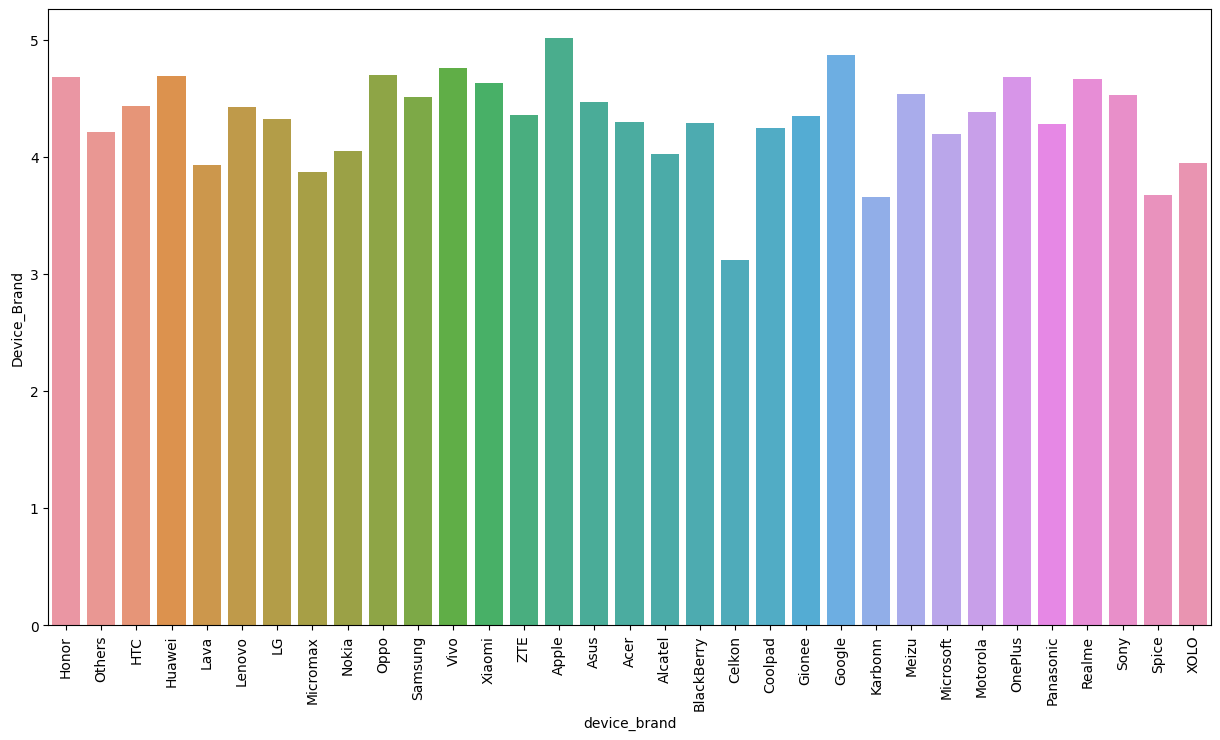

In [21]:
fig = plt.figure(figsize=(15,8))
sns.barplot(y=data['Device_Brand'],x=data['device_brand'])
plt.xticks(rotation=90)

In [22]:
data.os.value_counts().describe()


count       4.000000
mean      813.250000
std      1474.333607
min        36.000000
25%        57.750000
50%        96.500000
75%       852.000000
max      3024.000000
Name: os, dtype: float64

In [23]:
sns.countplot(data['os'])

ValueError: could not convert string to float: 'Android'

In [ ]:
data['5g'].value_counts()


0    3168
1      85
Name: 5g, dtype: int64

<AxesSubplot: ylabel='count'>

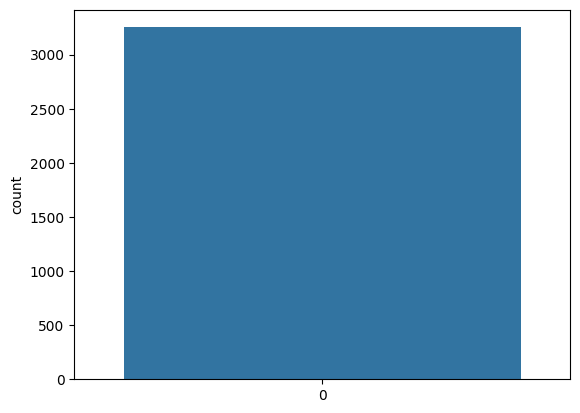

In [ ]:
sns.countplot(data['5g'])


In [ ]:
data['4g'].value_counts()


1    2148
0    1105
Name: 4g, dtype: int64

<AxesSubplot: ylabel='count'>

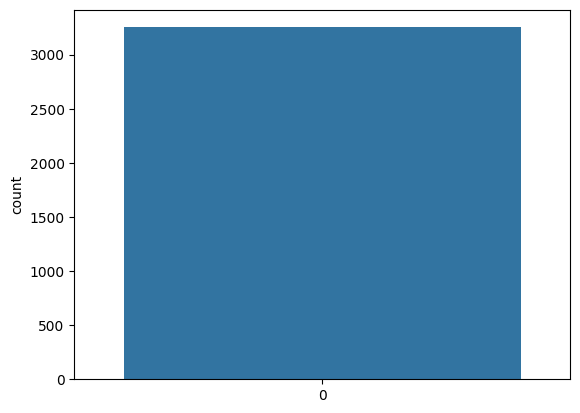

In [ ]:
sns.countplot(data['4g'])

In [ ]:
data['ram'].value_counts()


4.00     2755
6.00      109
8.00       88
0.25       83
2.00       70
3.00       64
1.00       34
0.03       16
0.02       14
12.00      10
0.50        9
1.50        1
Name: ram, dtype: int64

<AxesSubplot: ylabel='count'>

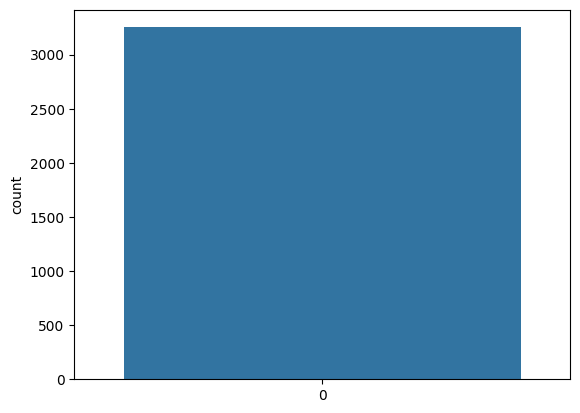

In [ ]:
sns.countplot(data['ram'])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2267834155.py, line 13)

In [ ]:
numerical_features = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price', 'normalized_used_price']

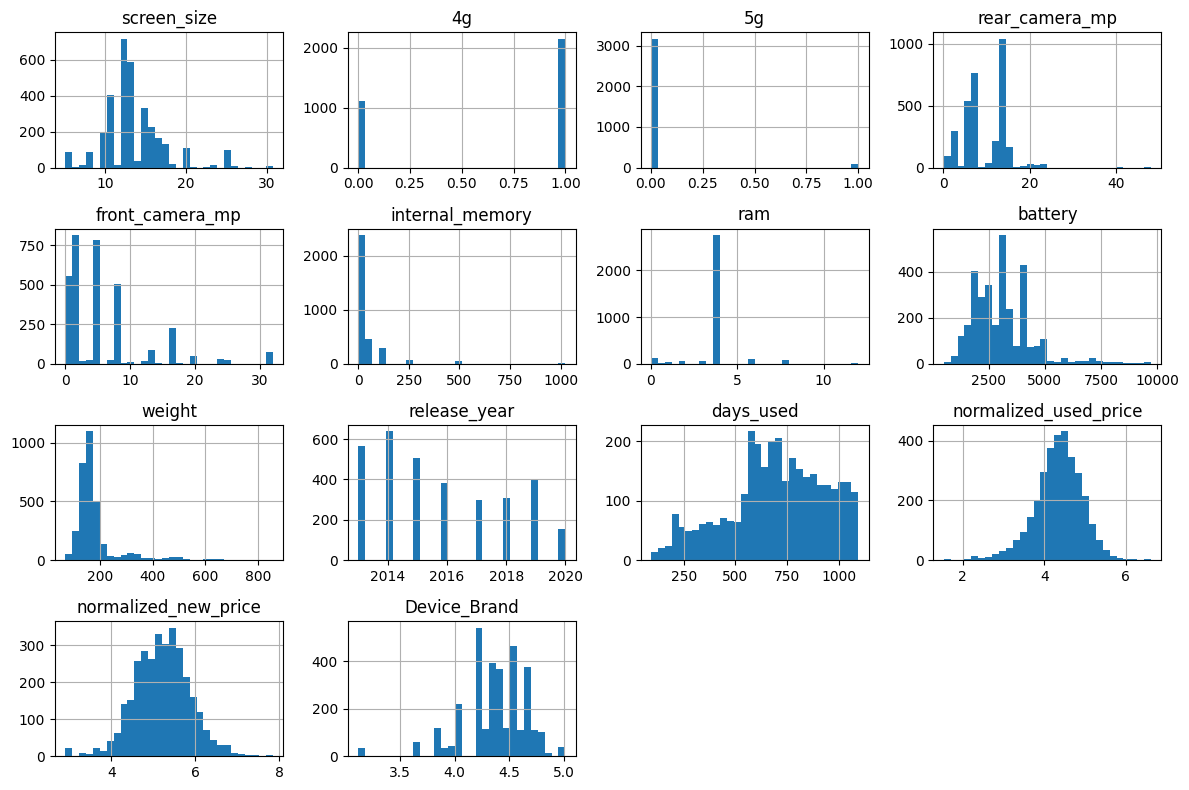

In [ ]:
data.hist(figsize=(12,8),bins=30)
plt.tight_layout()

In [ ]:
def bivariate_analysis(x):
 plt.figure(figsize=(10,6))
 ax = sns.regplot(x=x, y='normalized_used_price',data=data)
 ax.set_title("Used Price vs "+x, fontsize=25)
 ax.set_xlabel(x, fontsize=20)
 ax.set_ylabel('normalized_used_price', fontsize=20)
 plt.locator_params(axis='x', nbins=10)


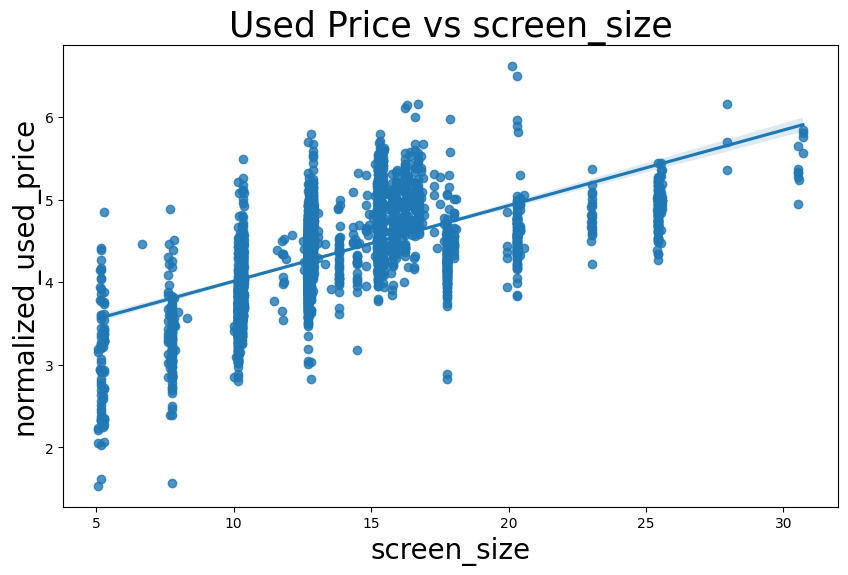

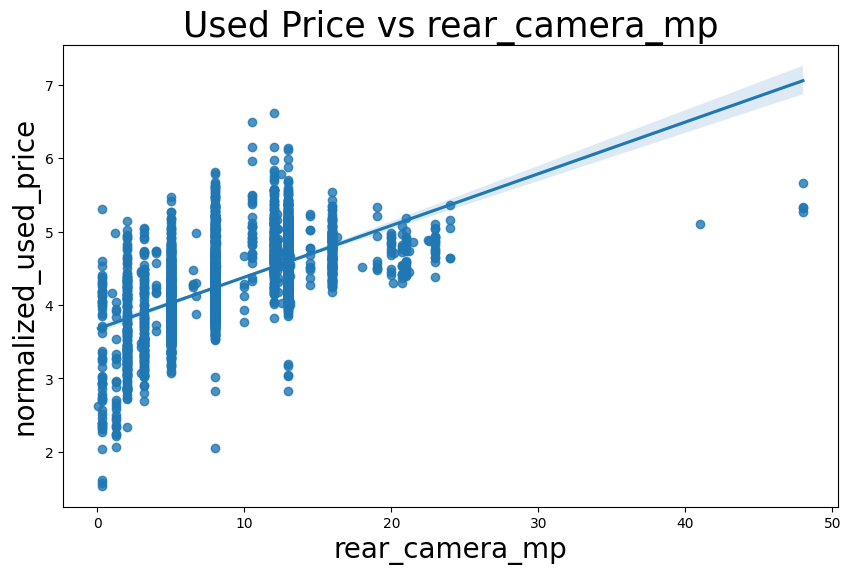

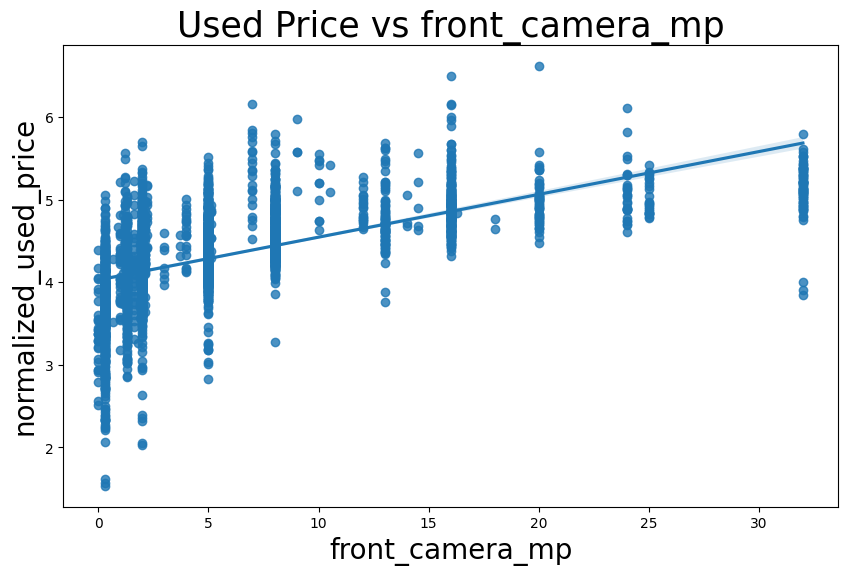

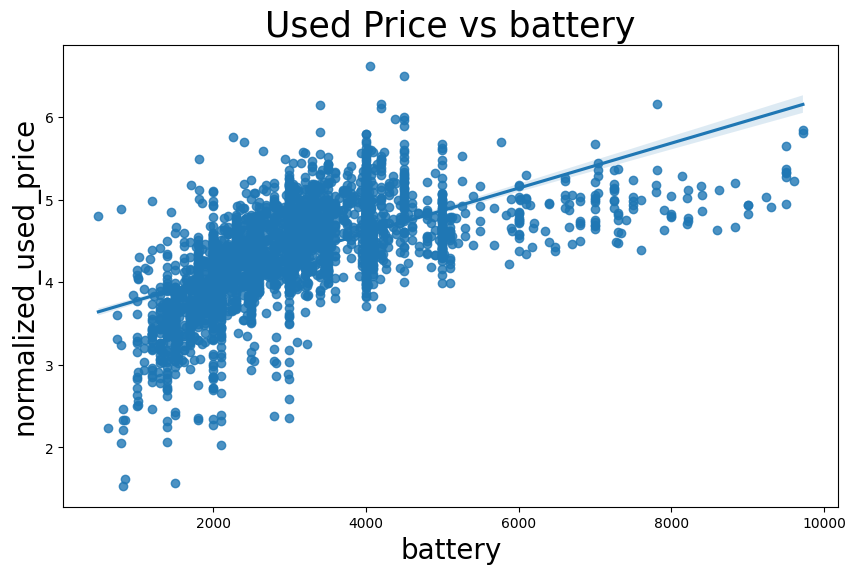

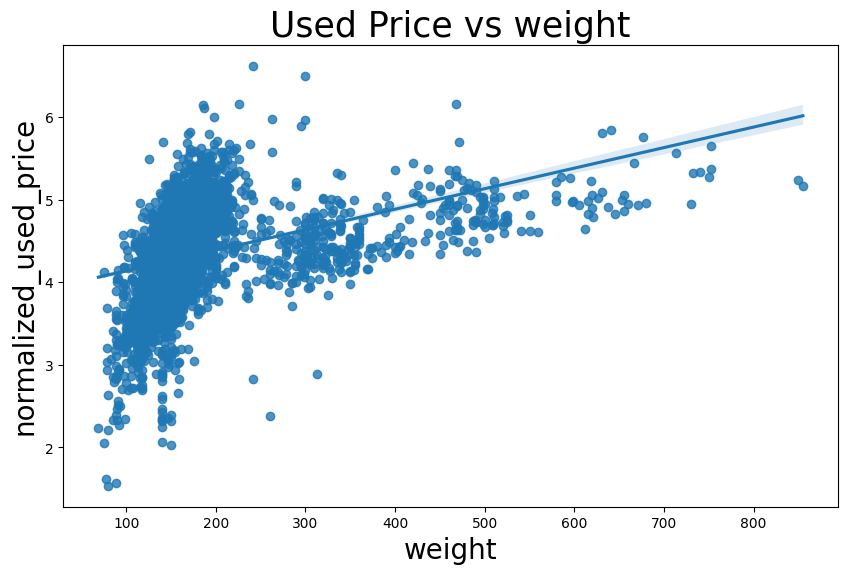

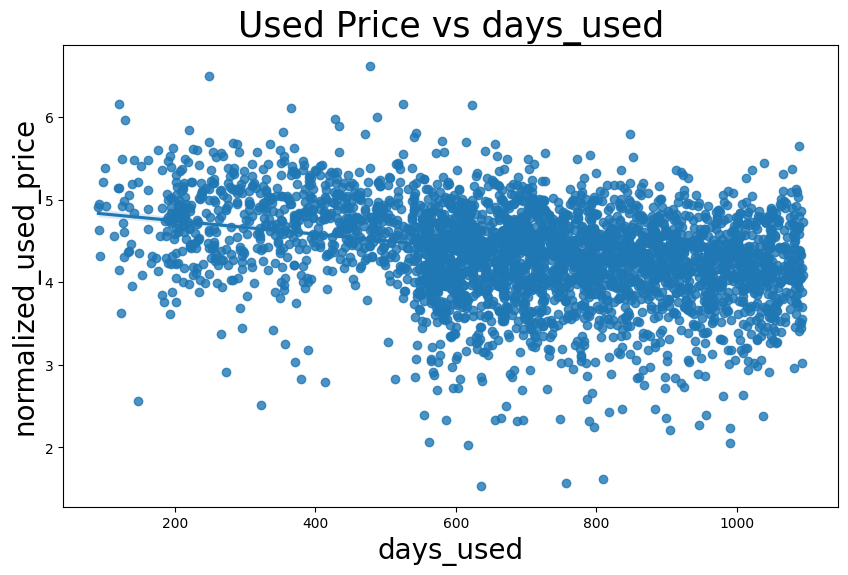

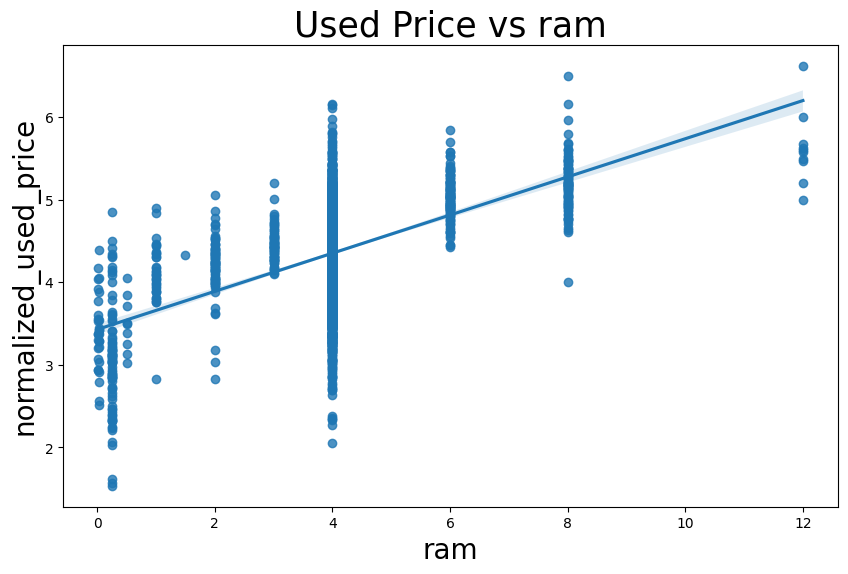

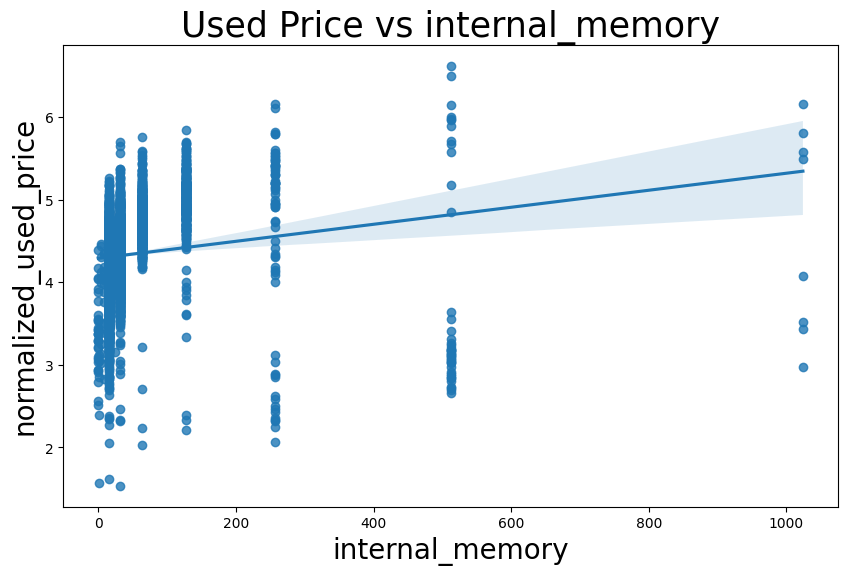

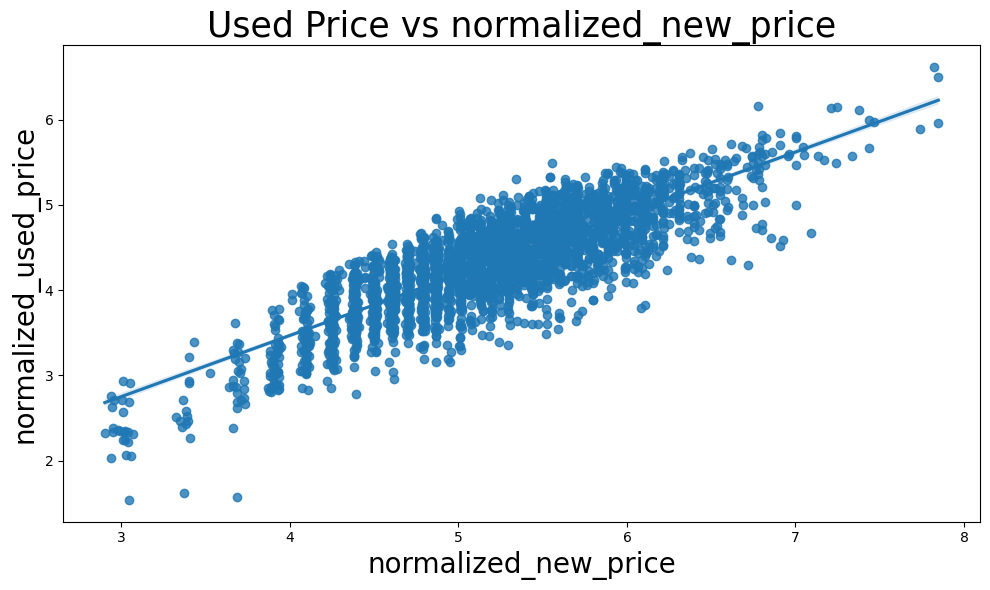

In [ ]:
cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','ram','internal_memory','normalized_new_price']
for x in cols:
    bivariate_analysis(x)
plt.tight_layout()

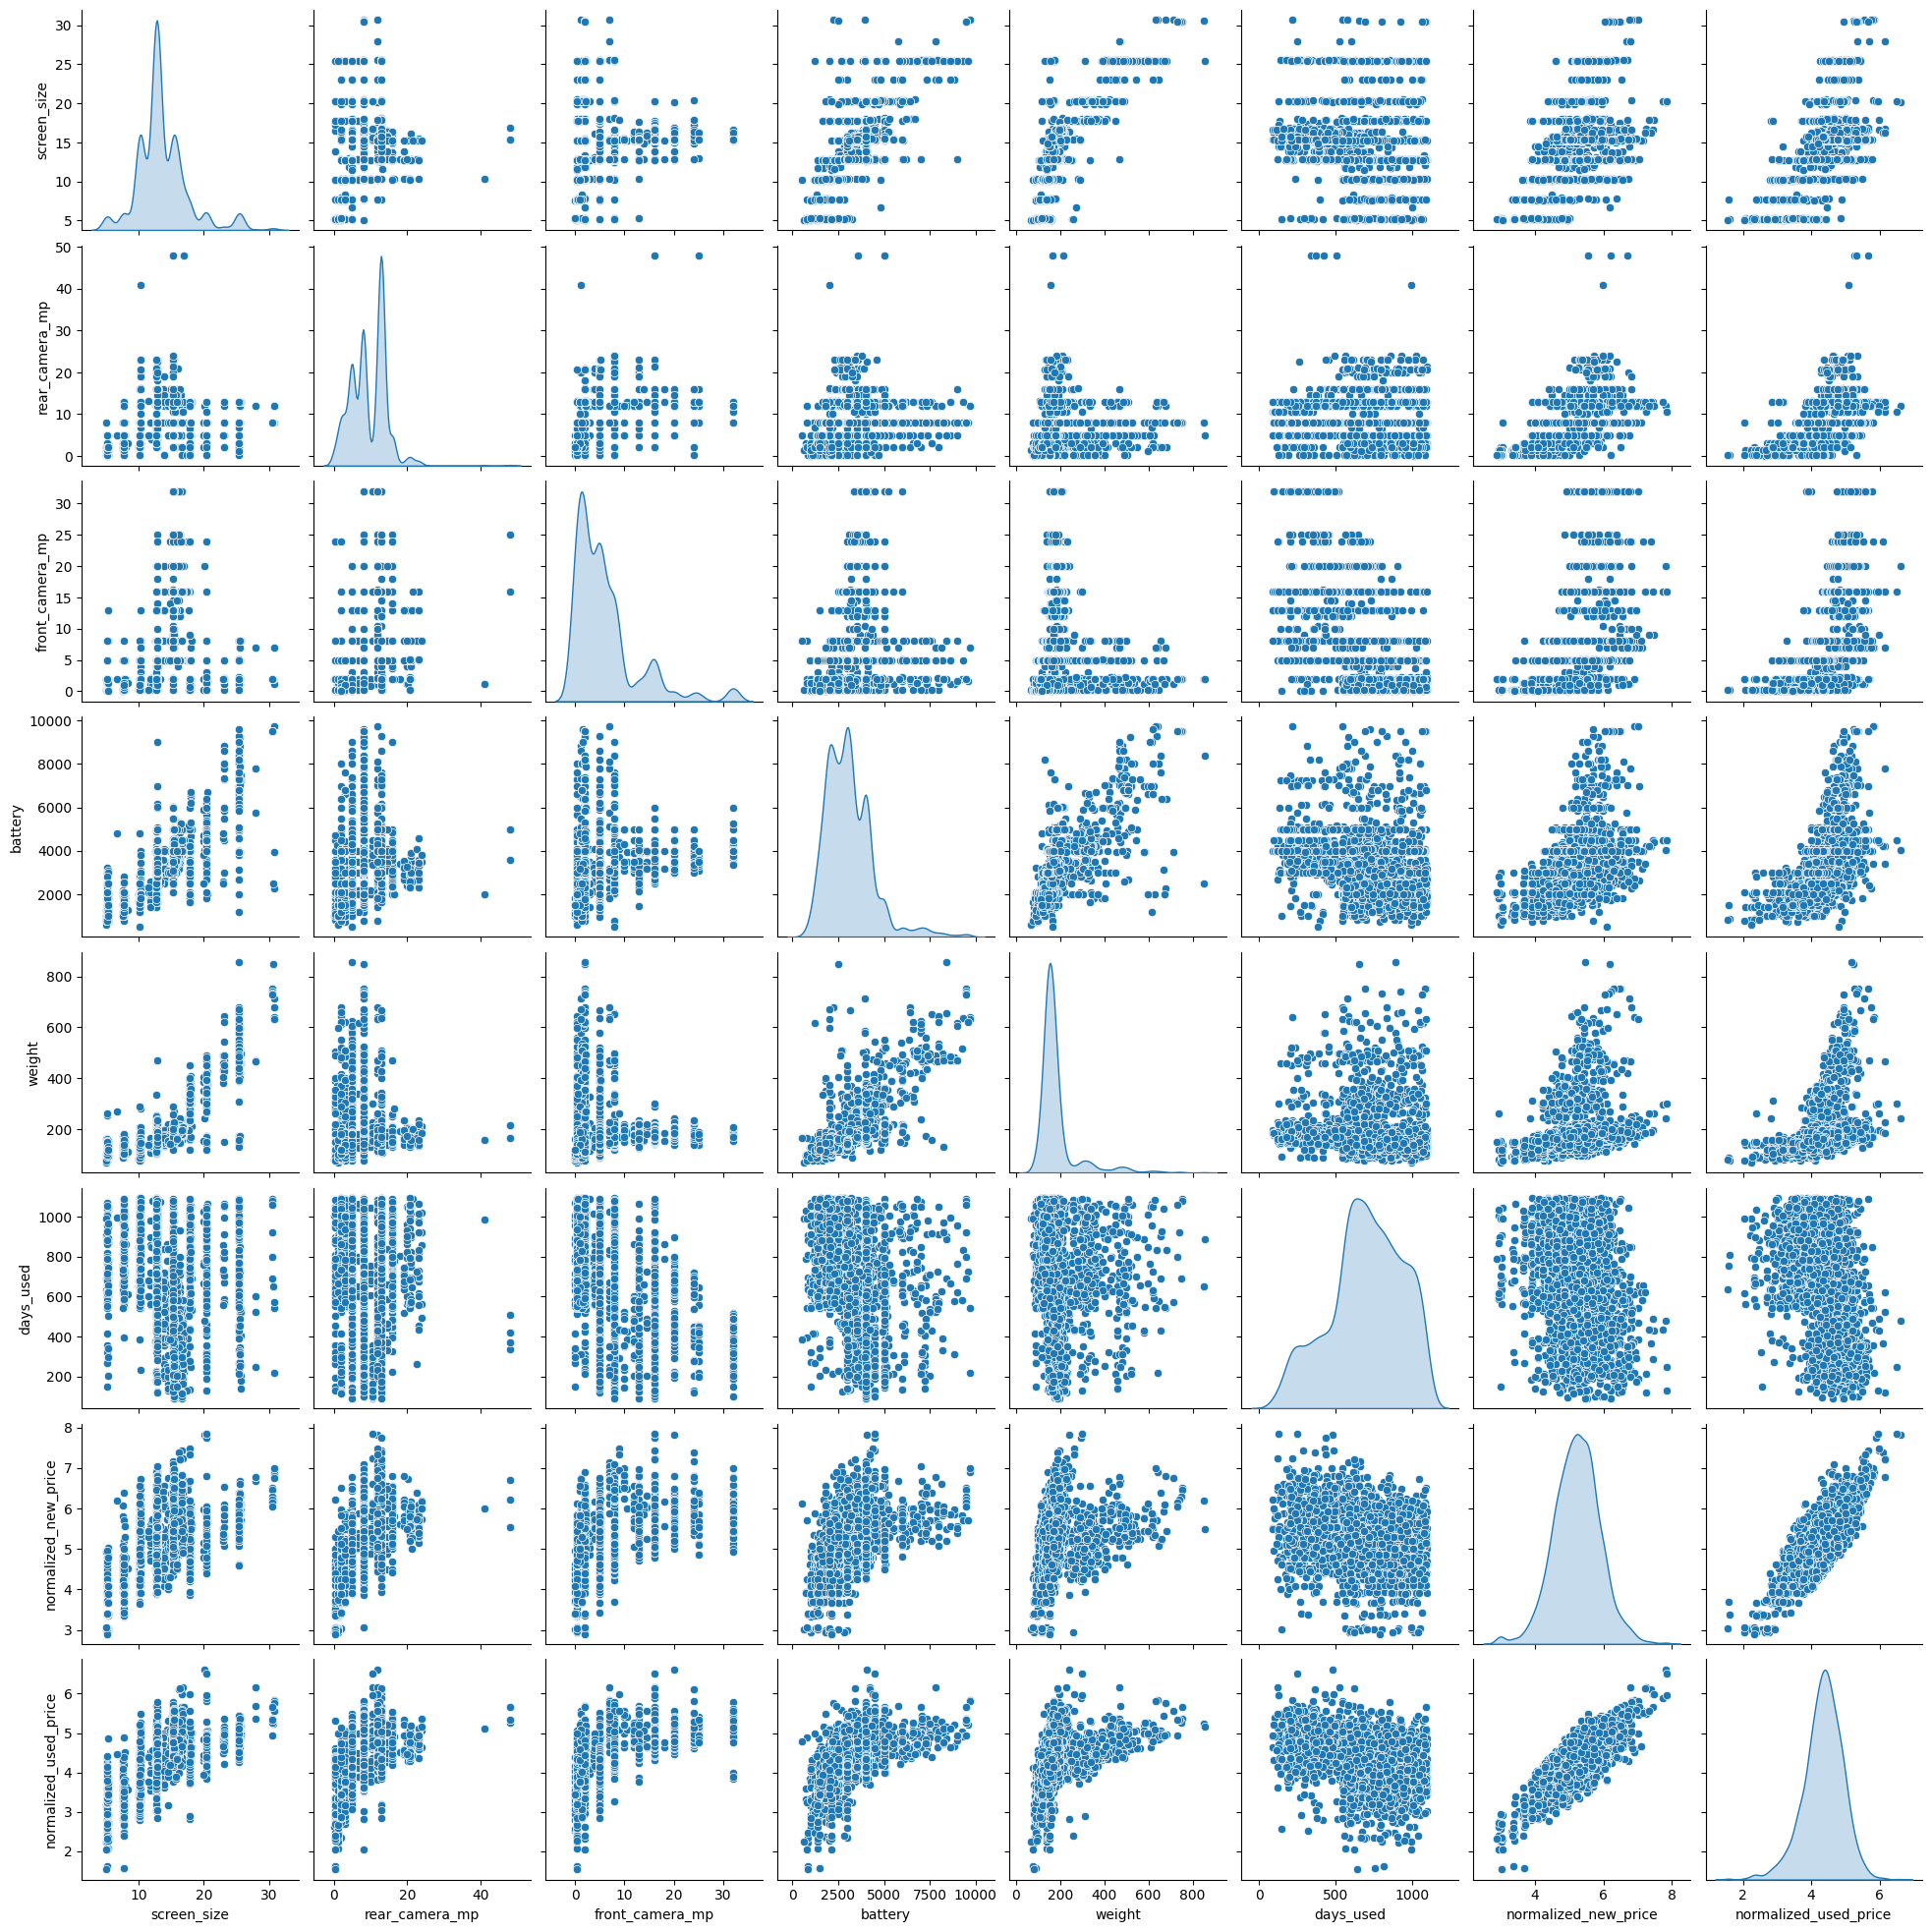

In [ ]:
sns.pairplot(data[numerical_features],diag_kind='kde')

<AxesSubplot: >

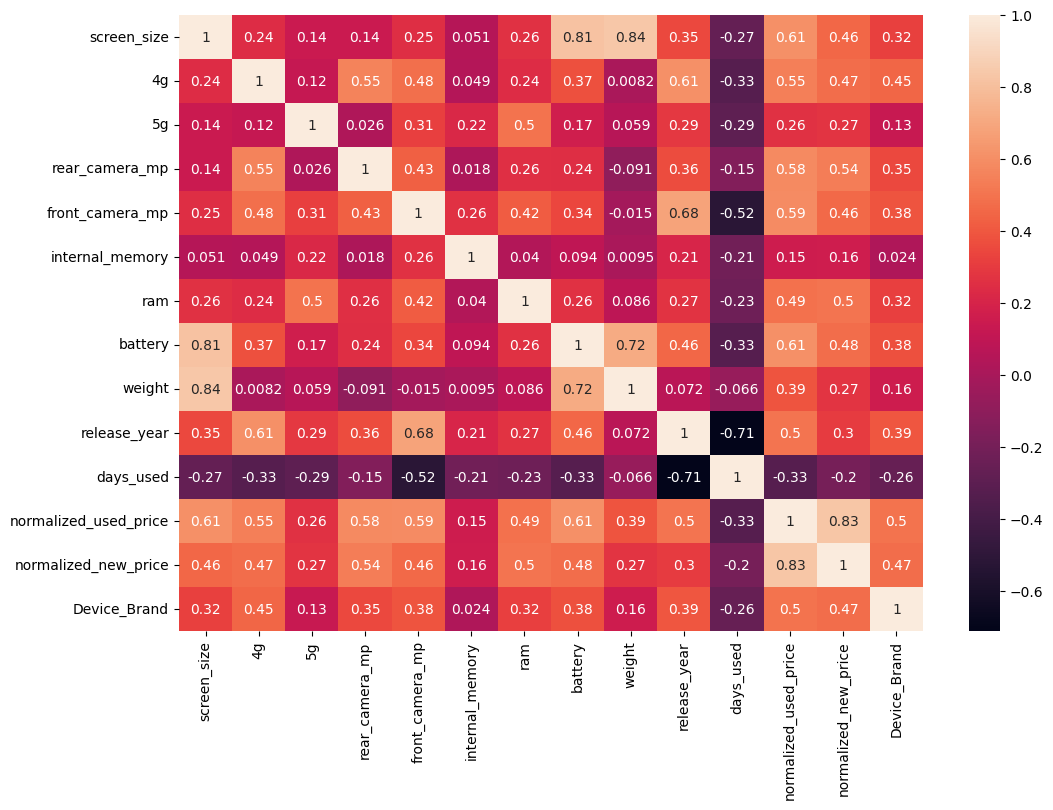

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

Relation between Features

In [ ]:
cols2 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price','normalized_used_price']

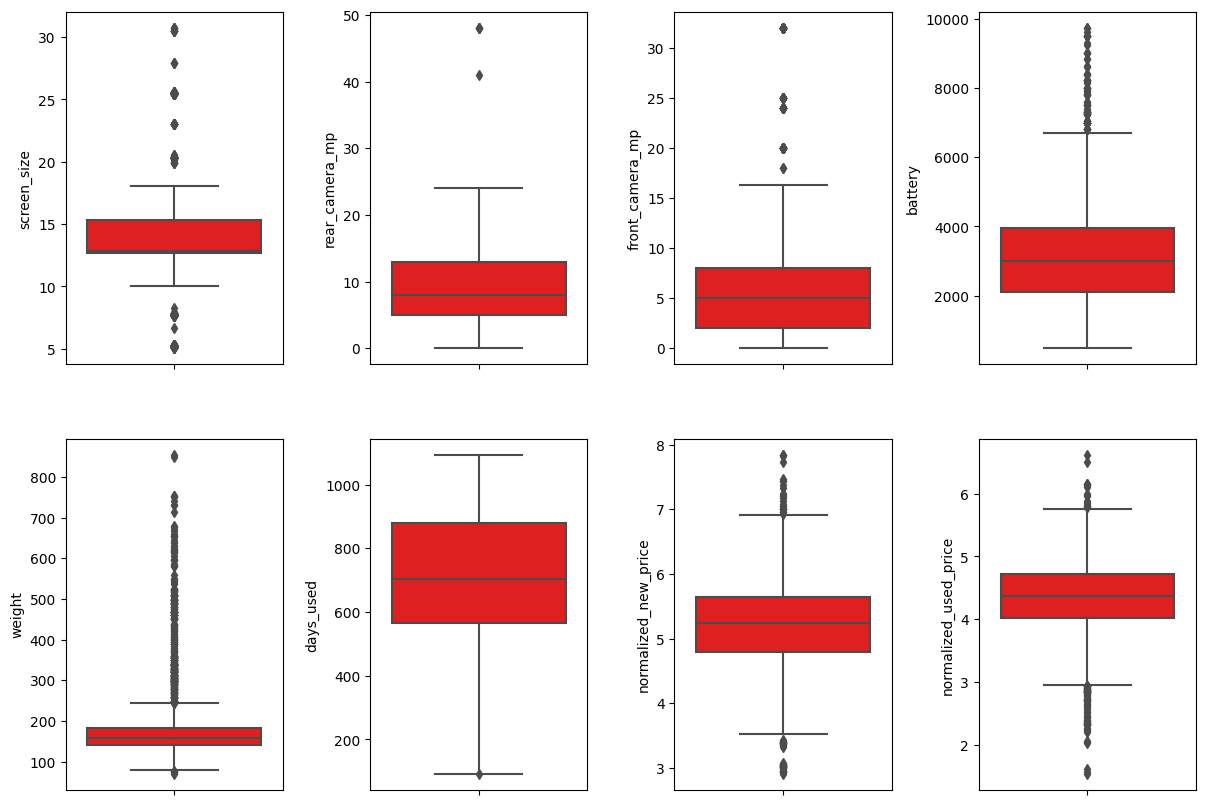

In [ ]:
fig,ax=plt.subplots(2,4,figsize=(12,8))
index=0
ax=ax.flatten()
for col in cols2:
    sns.boxplot(y=col, data=data, color='r', ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

In [ ]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(data[column], 25)
        # 3st quartile
        Q3 = np.percentile(data[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[column] < Q1 - outlier_step)
                              | (data[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

In [ ]:
len(detect_outliers(cols2))

440

In [ ]:
def check_skweness(columnName):
    print('''Before Correcting''')
    try:
        (mu, sigma) = norm.fit(data[columnName])
    except RuntimeError:
        (mu,sigma) = norm.fit(data[columnName].dropna())
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot=plt)
    plt.show();

Before Correcting
Mu before correcting SCREEN_SIZE : 13.617476175837686, Sigma before correcting SCREEN_SIZE : 3.850927722248345


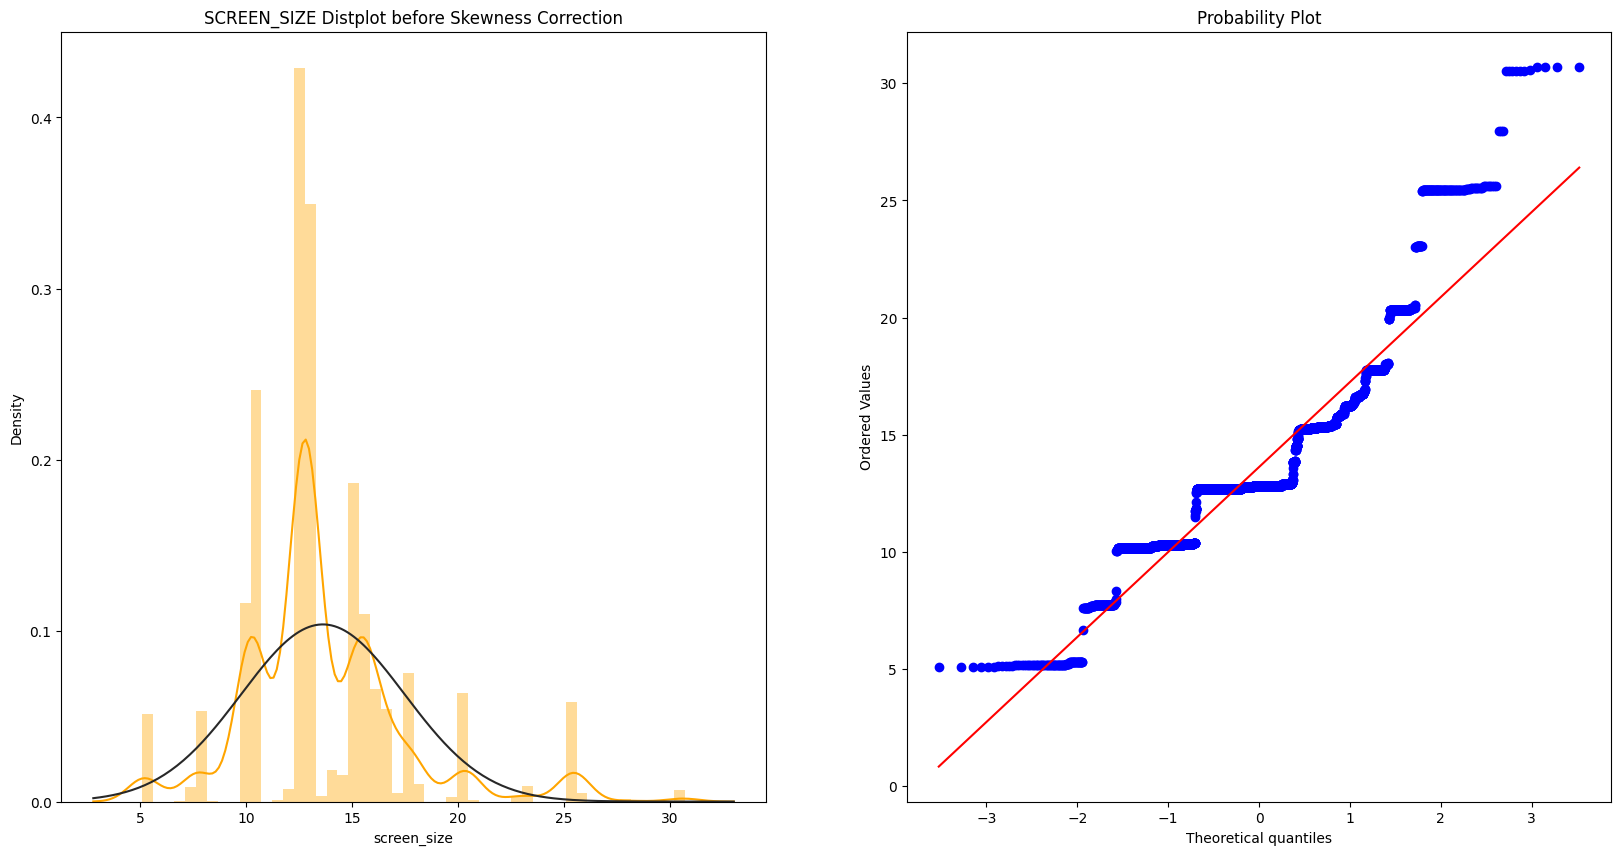

Before Correcting
Mu before correcting REAR_CAMERA_MP : 9.476354134644943, Sigma before correcting REAR_CAMERA_MP : 4.801461330992338


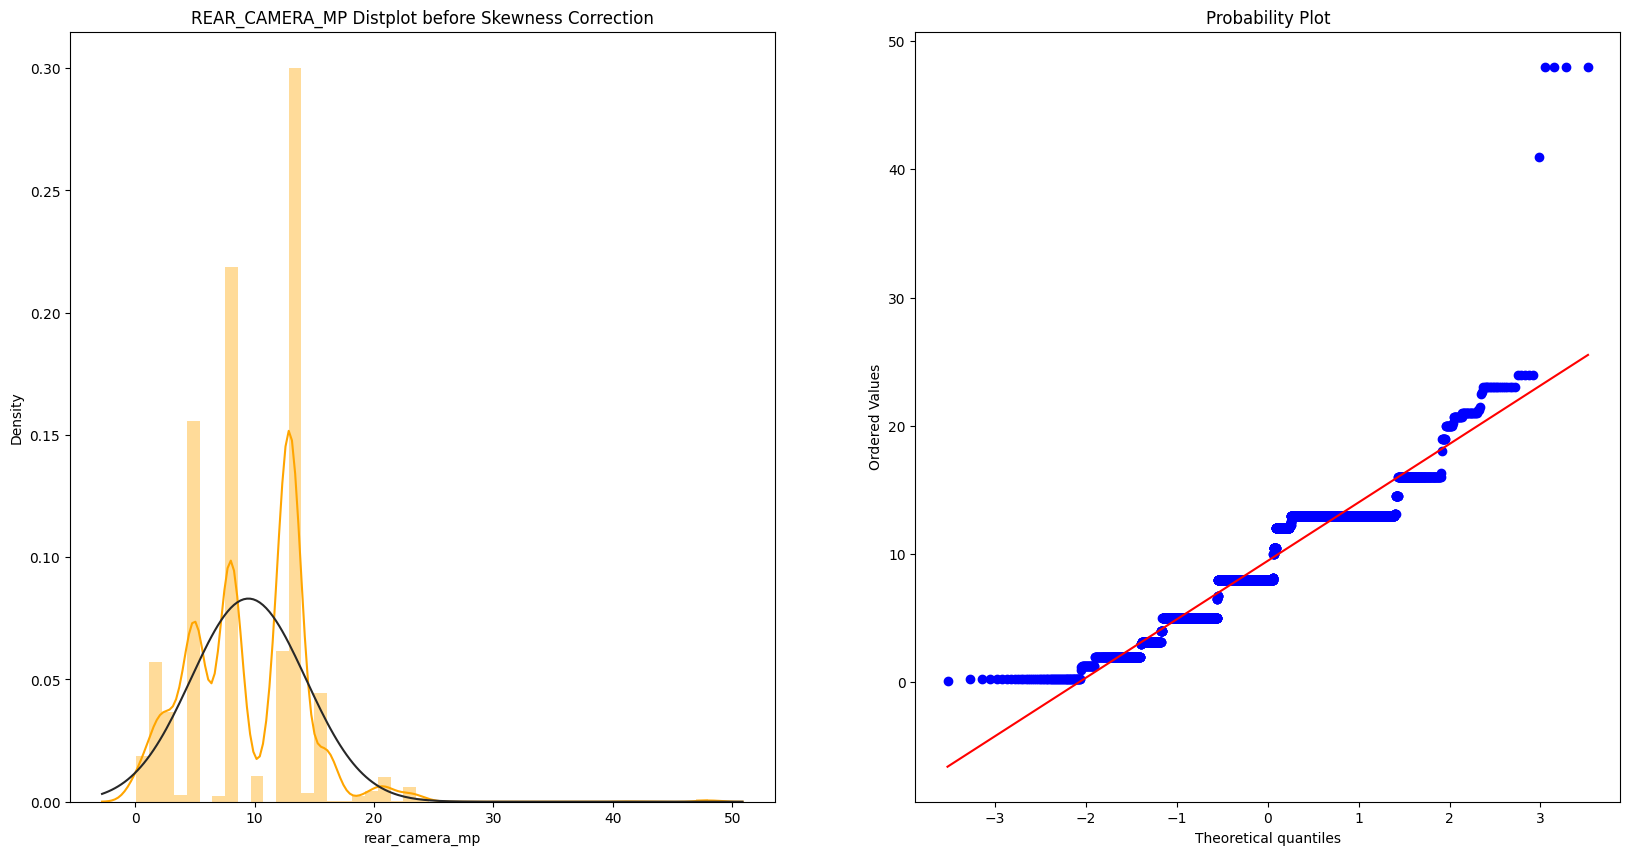

Before Correcting
Mu before correcting FRONT_CAMERA_MP : 6.093790347371658, Sigma before correcting FRONT_CAMERA_MP : 6.59856537717815


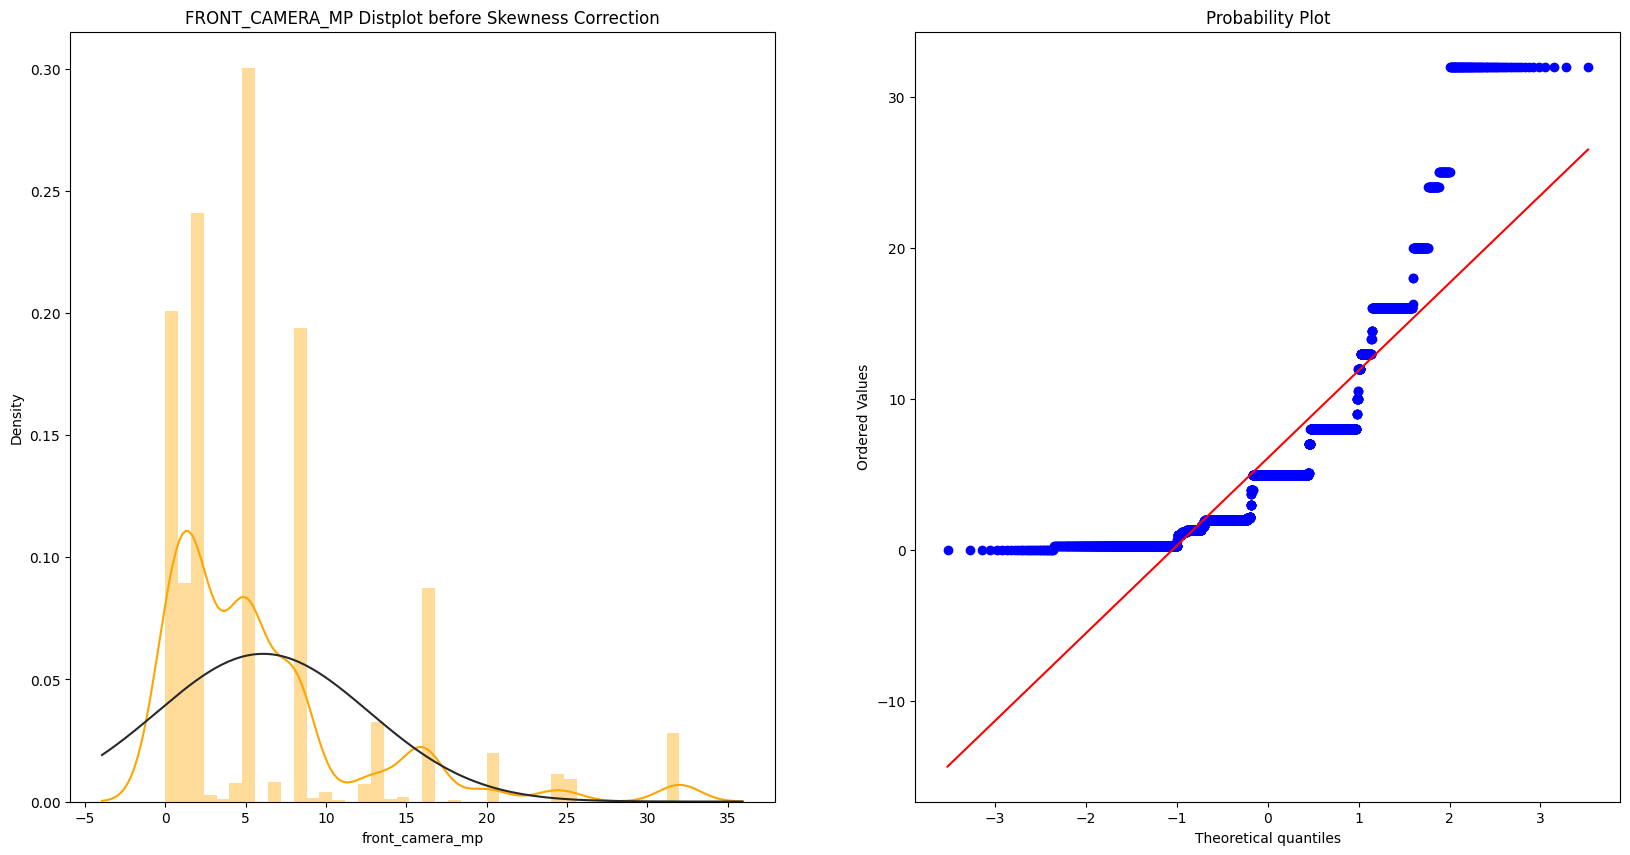

Before Correcting
Mu before correcting BATTERY : 3074.926990470335, Sigma before correcting BATTERY : 1296.758255626418


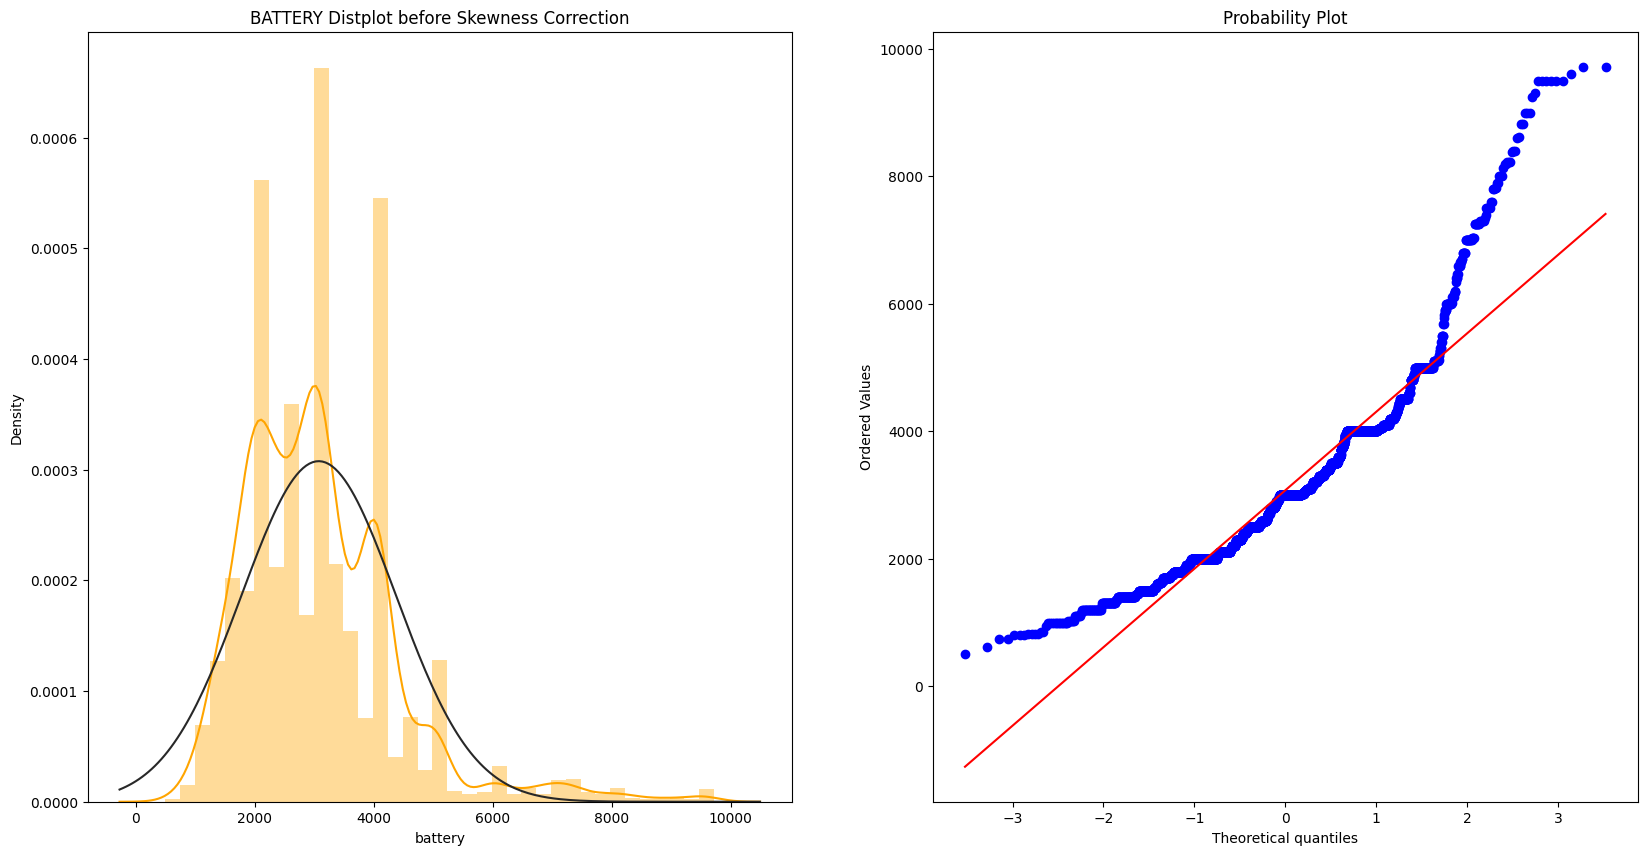

Before Correcting
Mu before correcting WEIGHT : 182.49363664309868, Sigma before correcting WEIGHT : 90.34592055359136


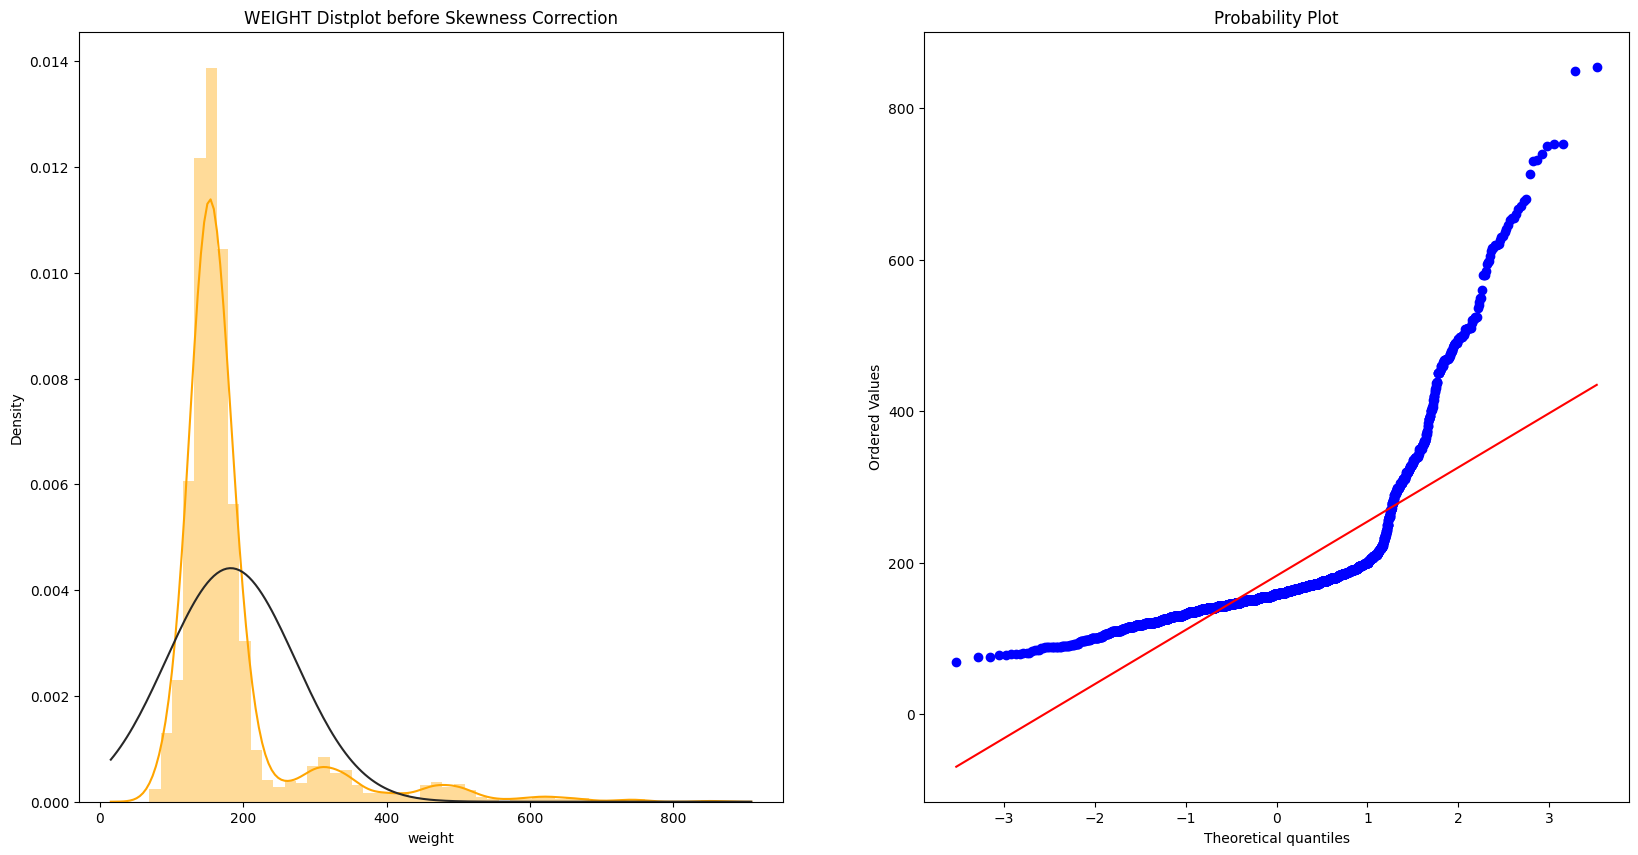

Before Correcting
Mu before correcting DAYS_USED : 695.695358130956, Sigma before correcting DAYS_USED : 235.4178911895456


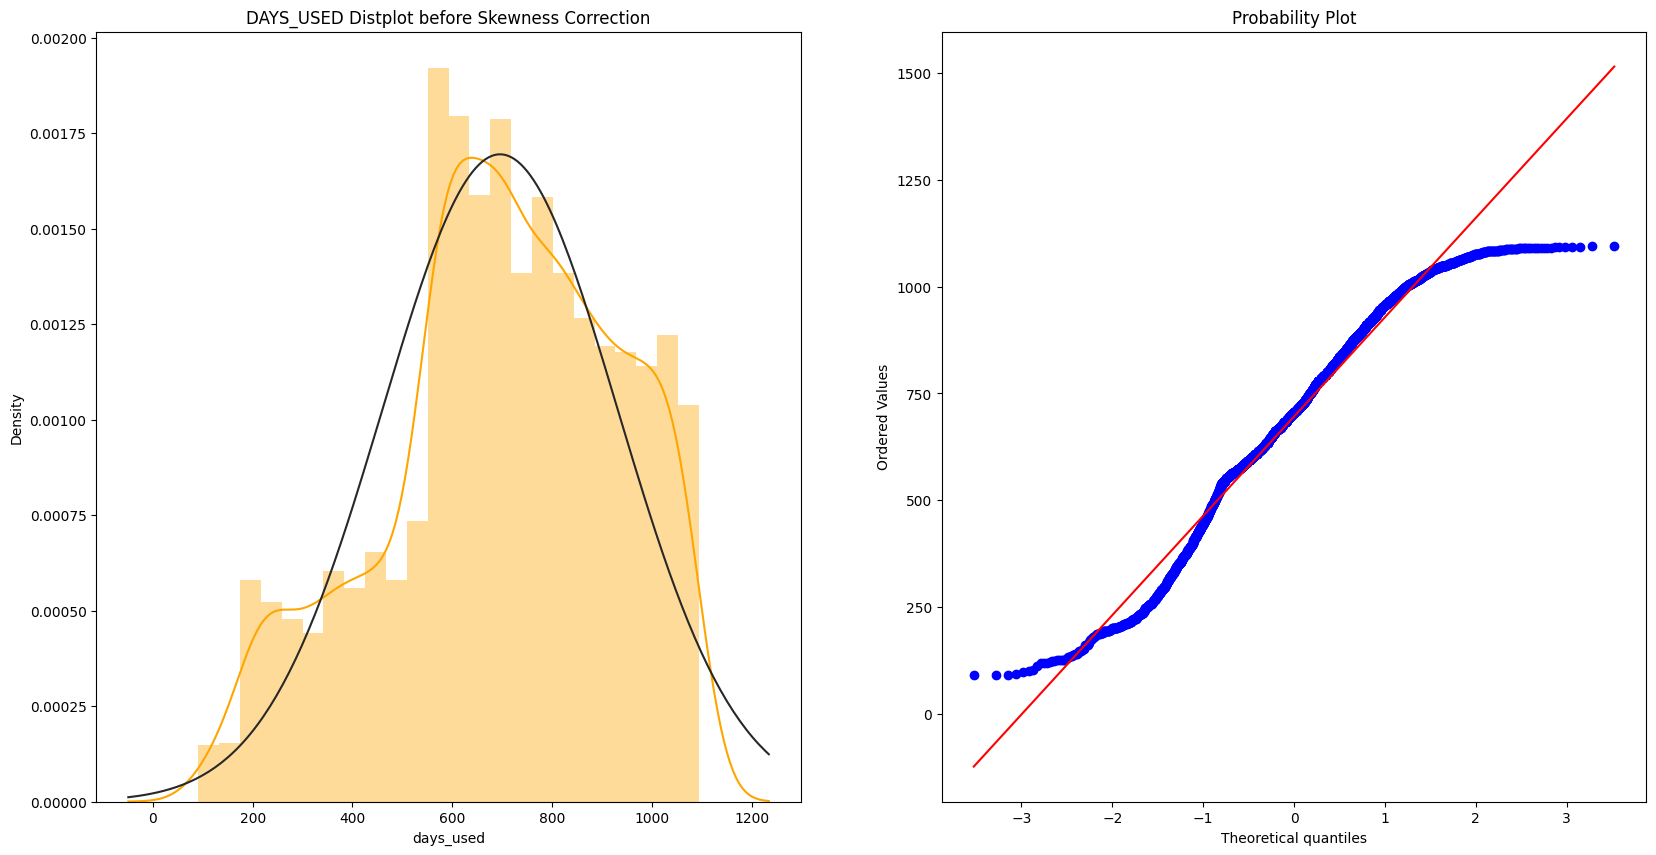

In [ ]:
skew_check_cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used']
for columns in skew_check_cols:
    check_skweness(columns)

In [ ]:
def trying_different_transformations(column,transformation):
    if transformation=='boxcox':
        try:
            print("BoxCox - "+column)
            temp,temp_params = boxcox(data[column]+1)
            (mu,sigma)=norm.fit(temp)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp, plot = plt)
        except ValueError:
            pass
        except ValueError:
            pass
    elif transformation=='log':
        try:
            print("Log - "+column)
            (mu,sigma)=norm.fit(np.log1p(data[column]))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(np.log1p(data[column]), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(np.log1p(data[column]), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='reciprocal':
        try:
            print("Reciprocal - "+column)
            temp_r = 1/data[column]
            temp_r = temp_r.replace([np.inf, -np.inf], 0)
            (mu,sigma)=norm.fit(temp_r)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp_r, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp_r, plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='sqroot':
        try:
            print("Square_Root - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    else:
        try:
            print("Exponential - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/1.2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/1.2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/1.2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass

In [ ]:
transformations = ['boxcox','log','reciprocal','sqroot','exp']

BoxCox - screen_size
mu  3.5698404424676915  sigma  0.4545136324169383
Log - screen_size
mu  2.6489500119971527  sigma  0.2597925882344679
Reciprocal - screen_size
mu  0.07960684557547834  sigma  0.025525098428114866
Square_Root - screen_size
mu  3.6549818070083795  sigma  0.5085117169500123
Exponential - screen_size
mu  8.765467966999235  sigma  2.0485469876423363


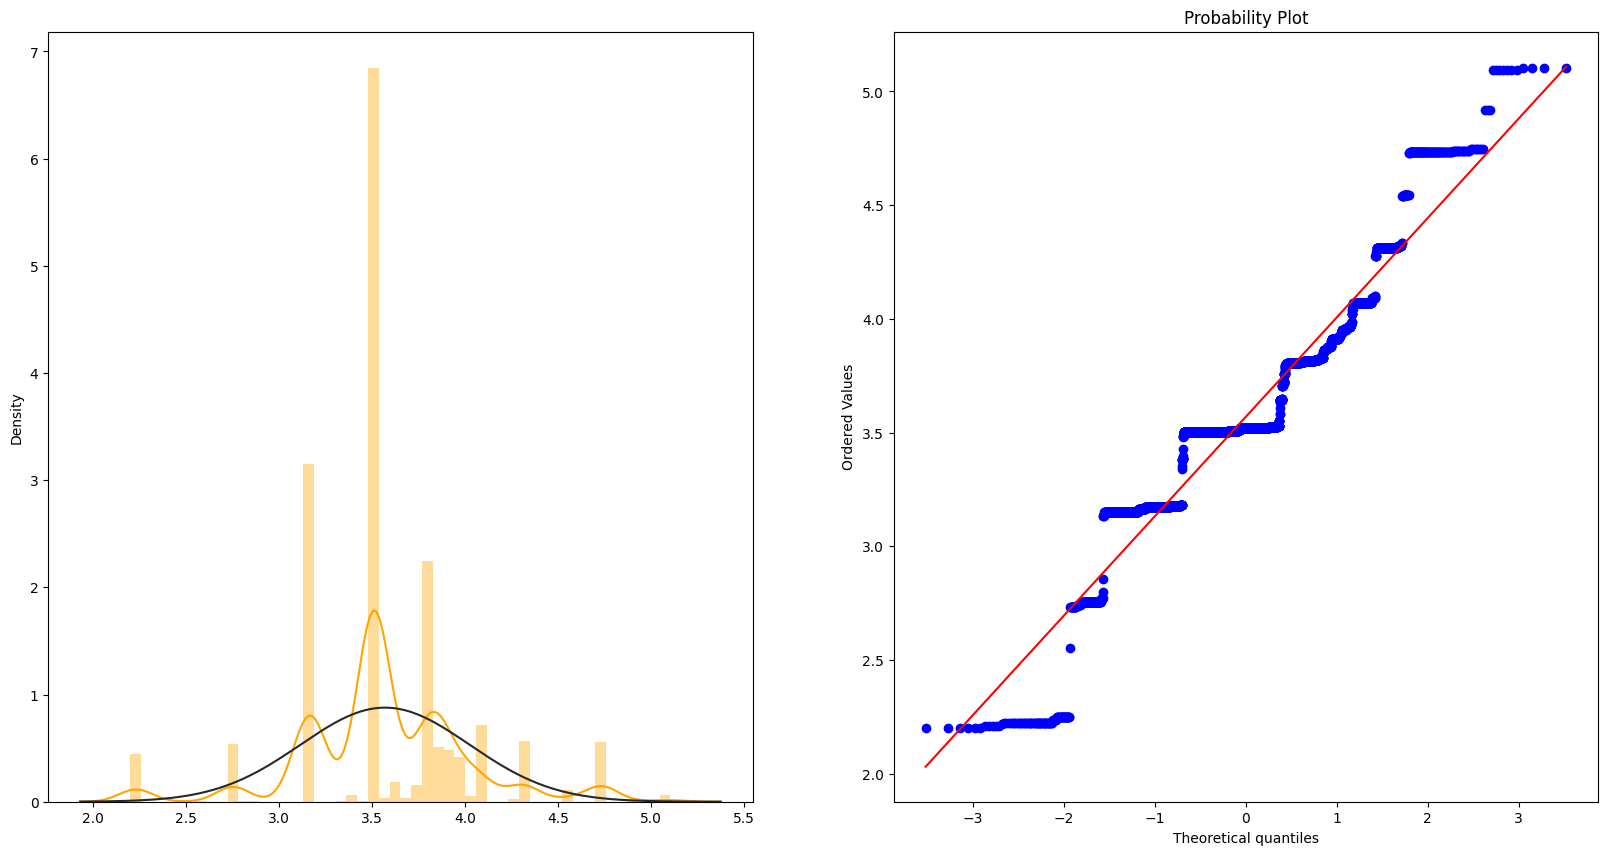

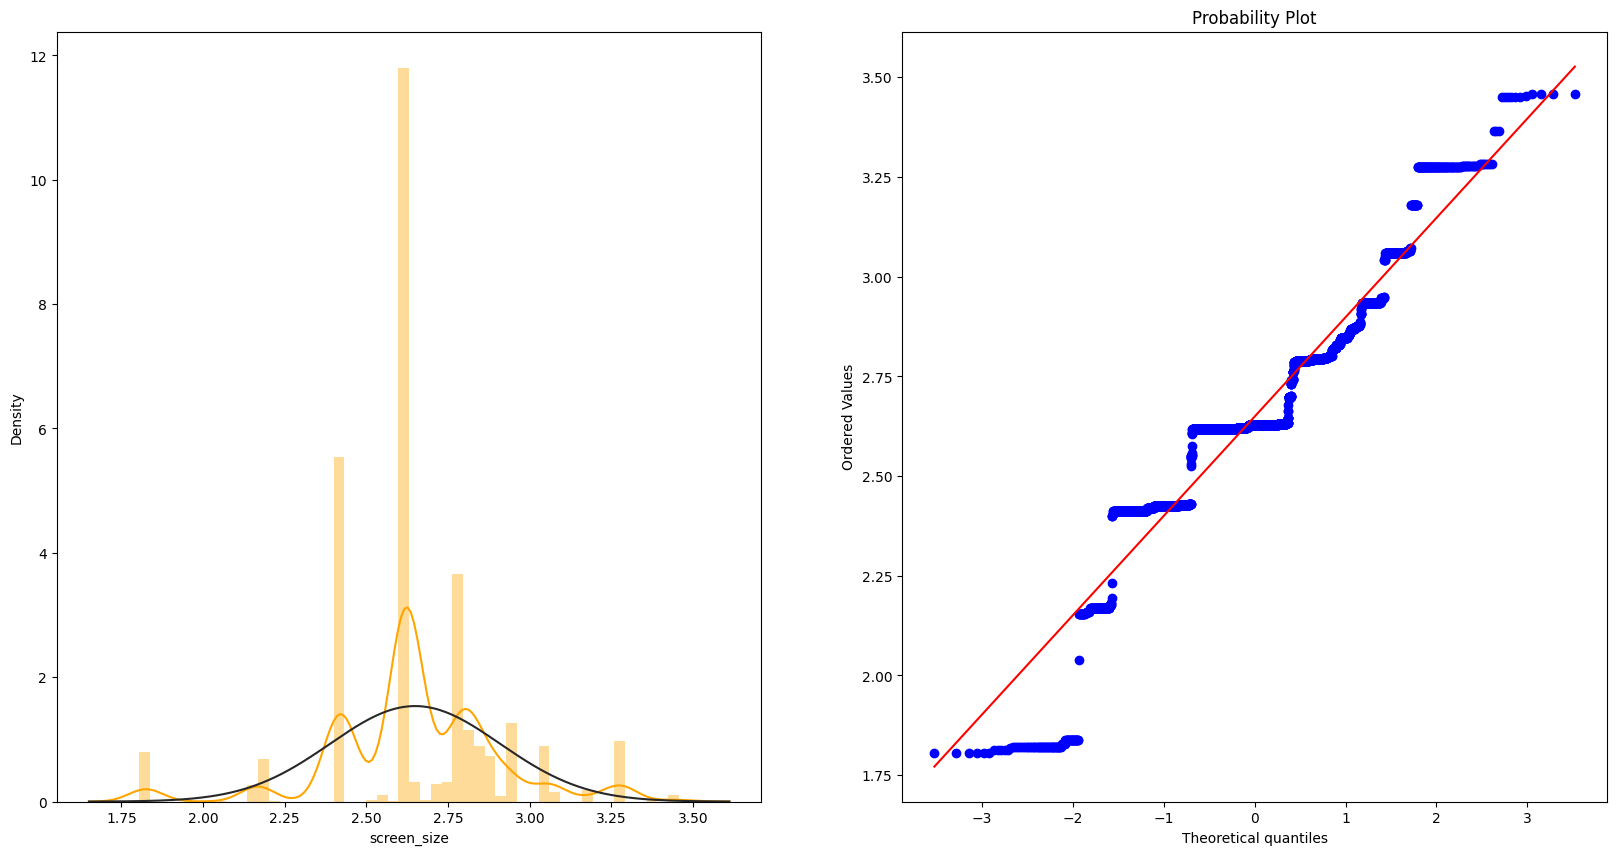

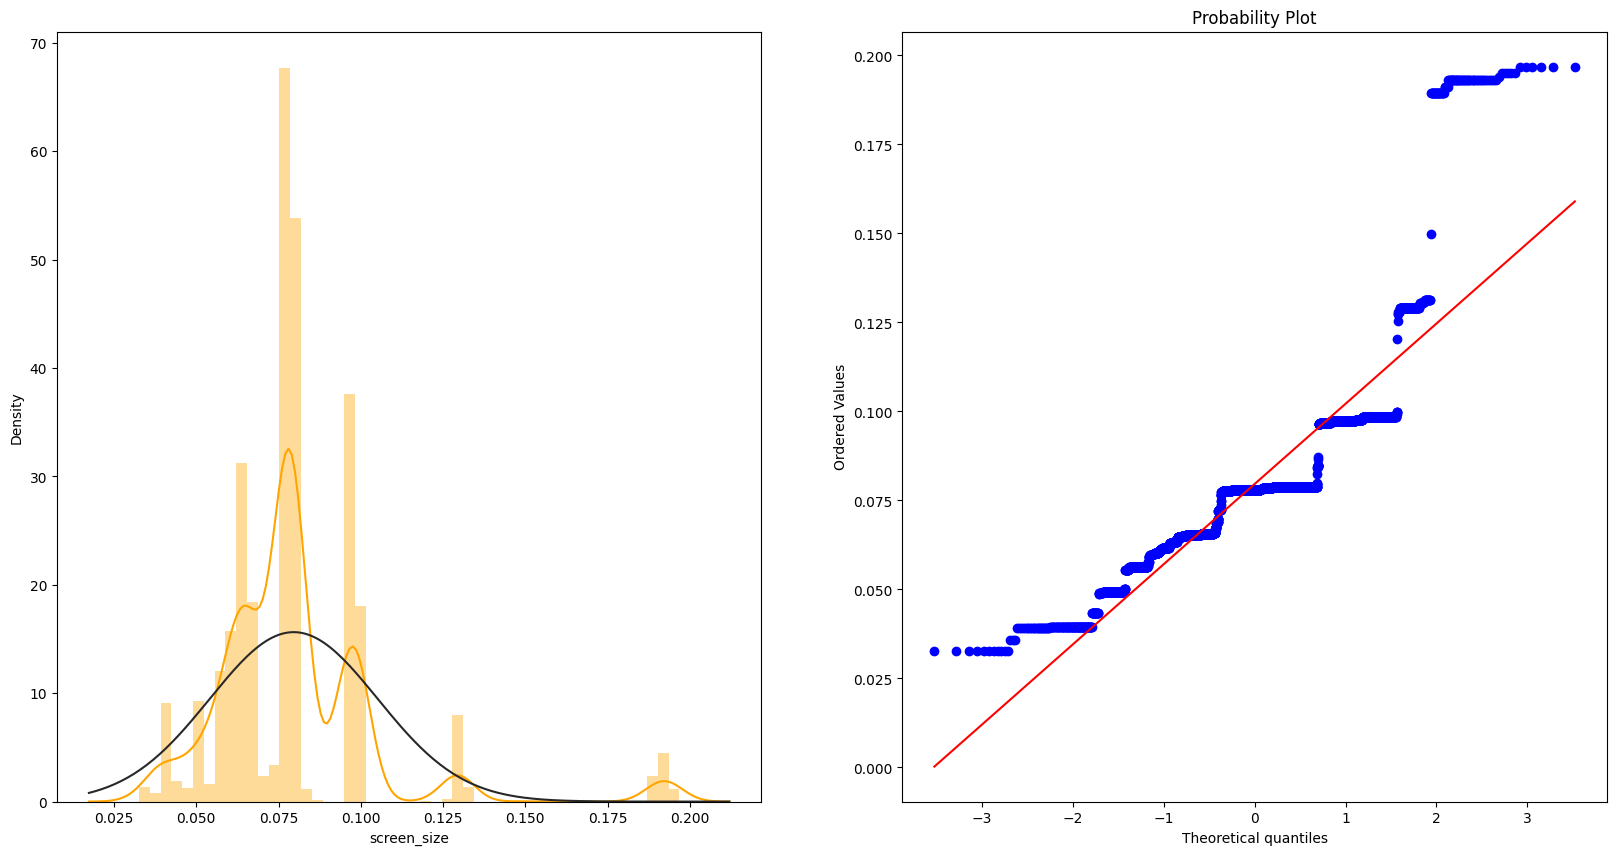

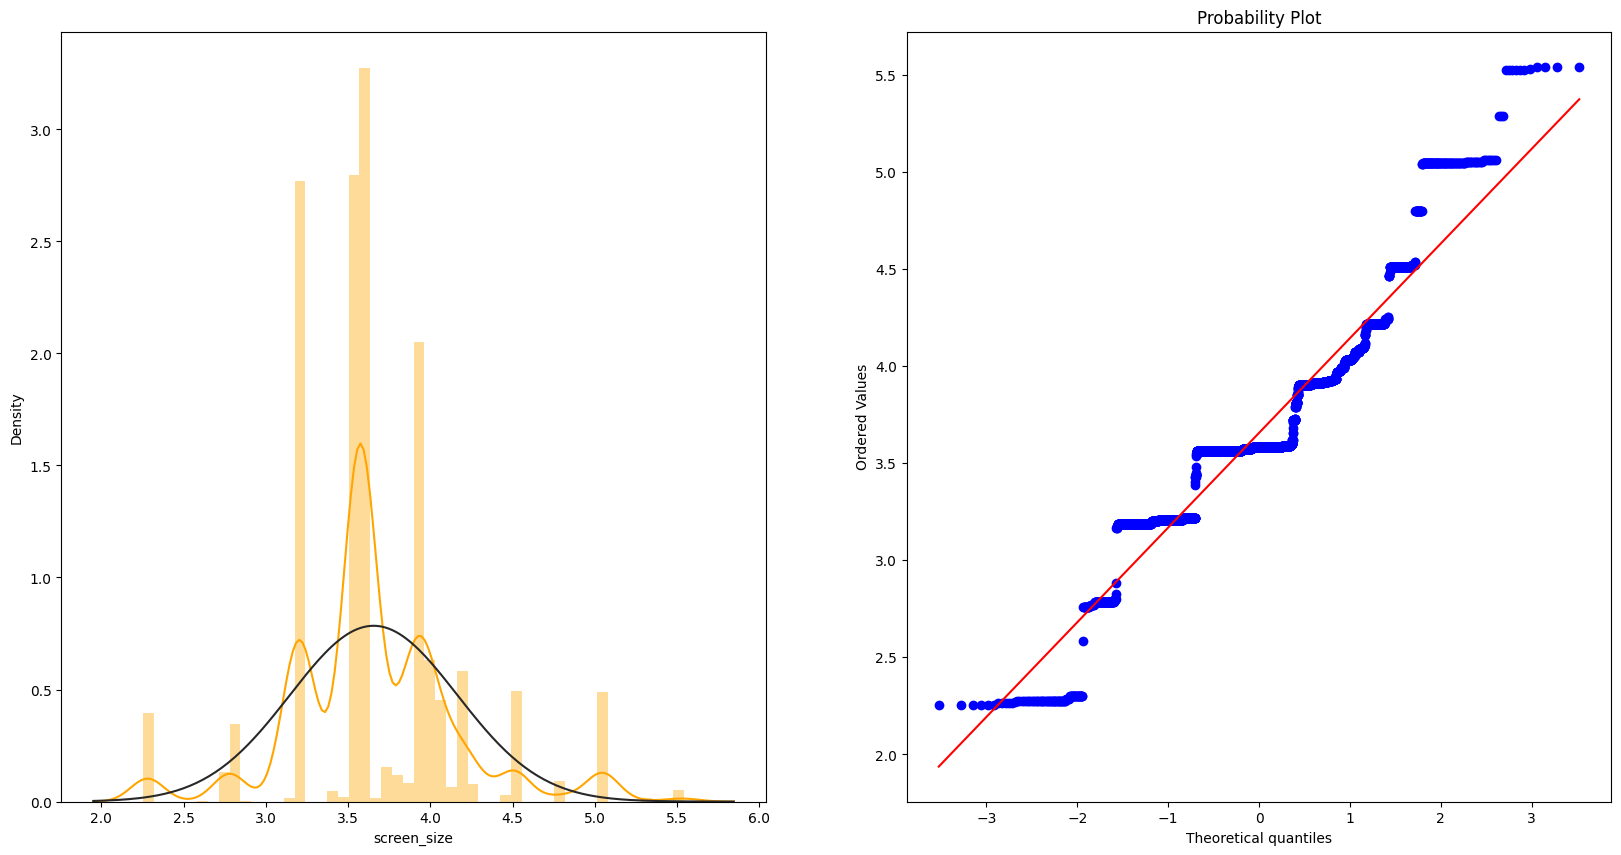

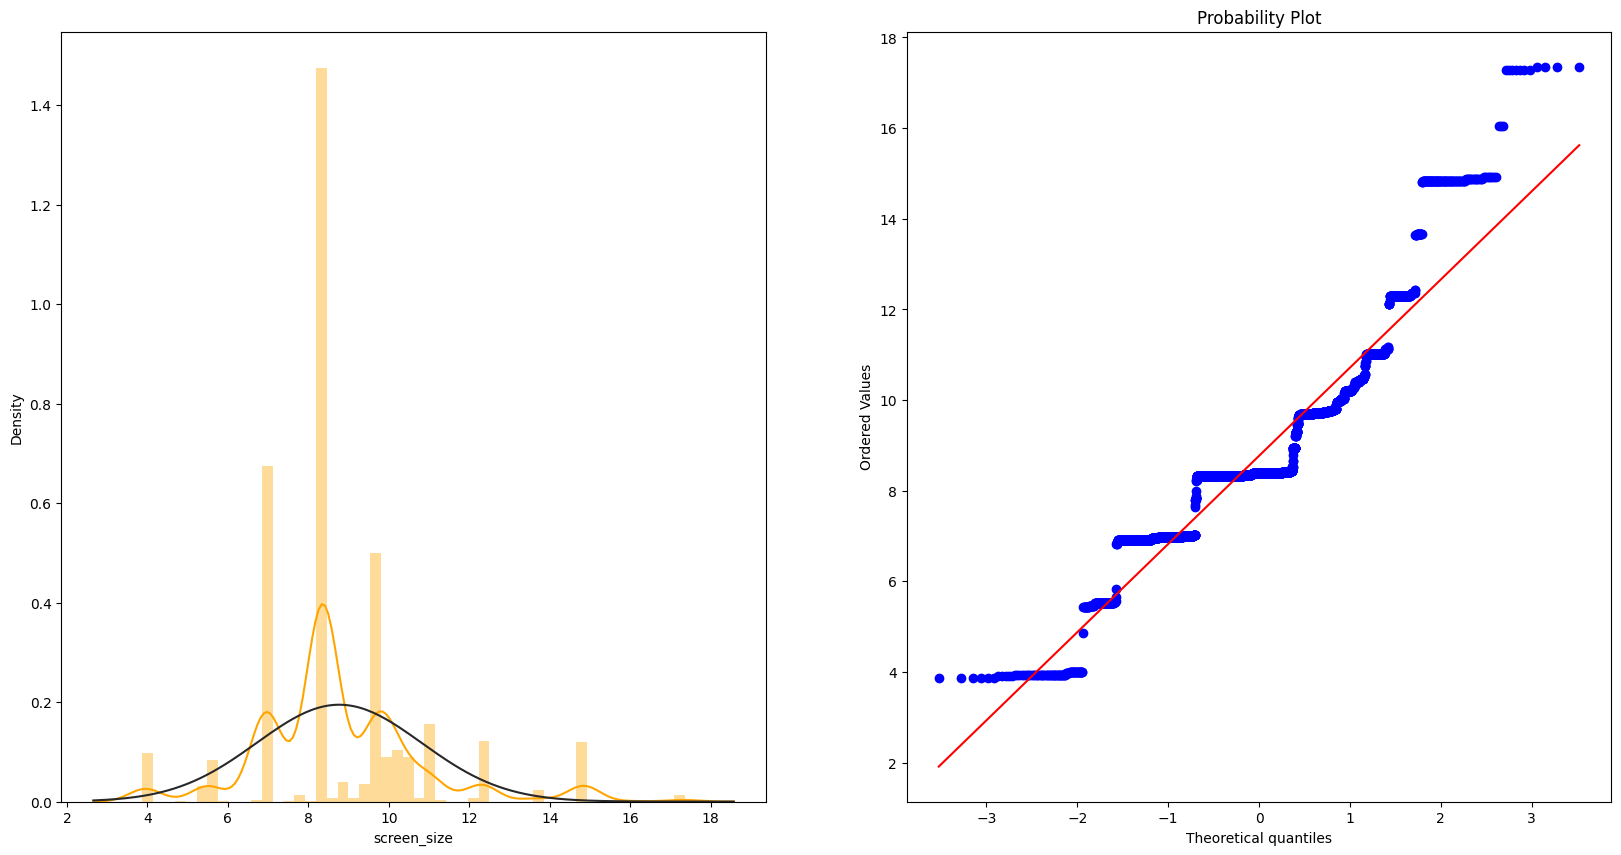

In [ ]:
for x in transformations:
    trying_different_transformations('screen_size',x)

BoxCox - rear_camera_mp
mu  5.561195580291287  sigma  2.275511236944539
Log - rear_camera_mp
mu  2.2166565580441495  sigma  0.5686388346206583
Reciprocal - rear_camera_mp
mu  0.21288679387362286  sigma  0.5034662710014629
Square_Root - rear_camera_mp
mu  2.9592967600910938  sigma  0.847889627462975
Exponential - rear_camera_mp
mu  6.386109911940589  sigma  2.776726315977432


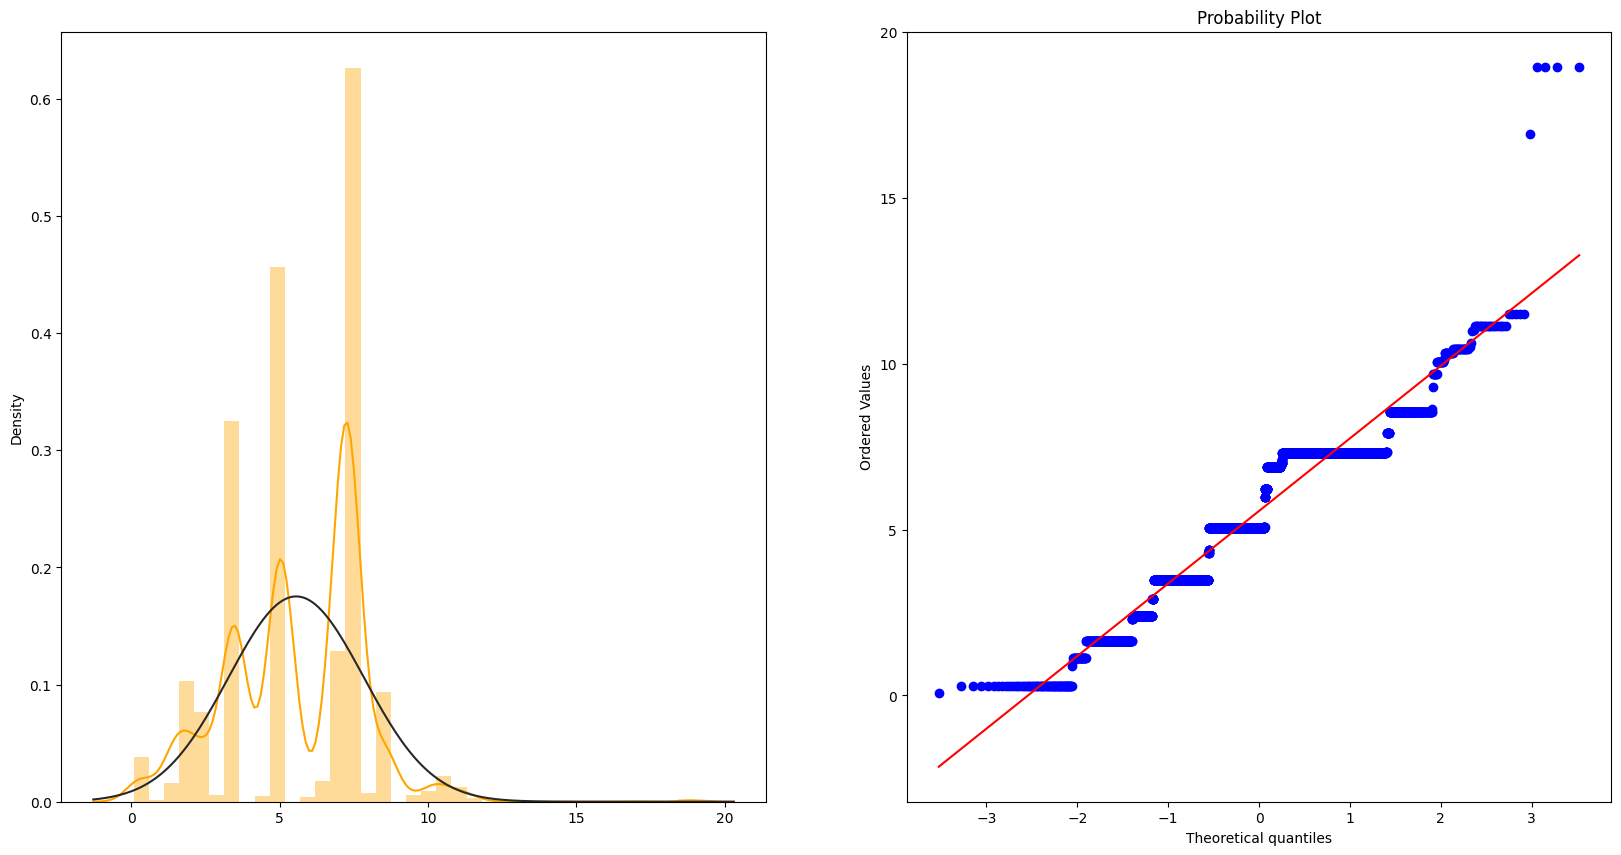

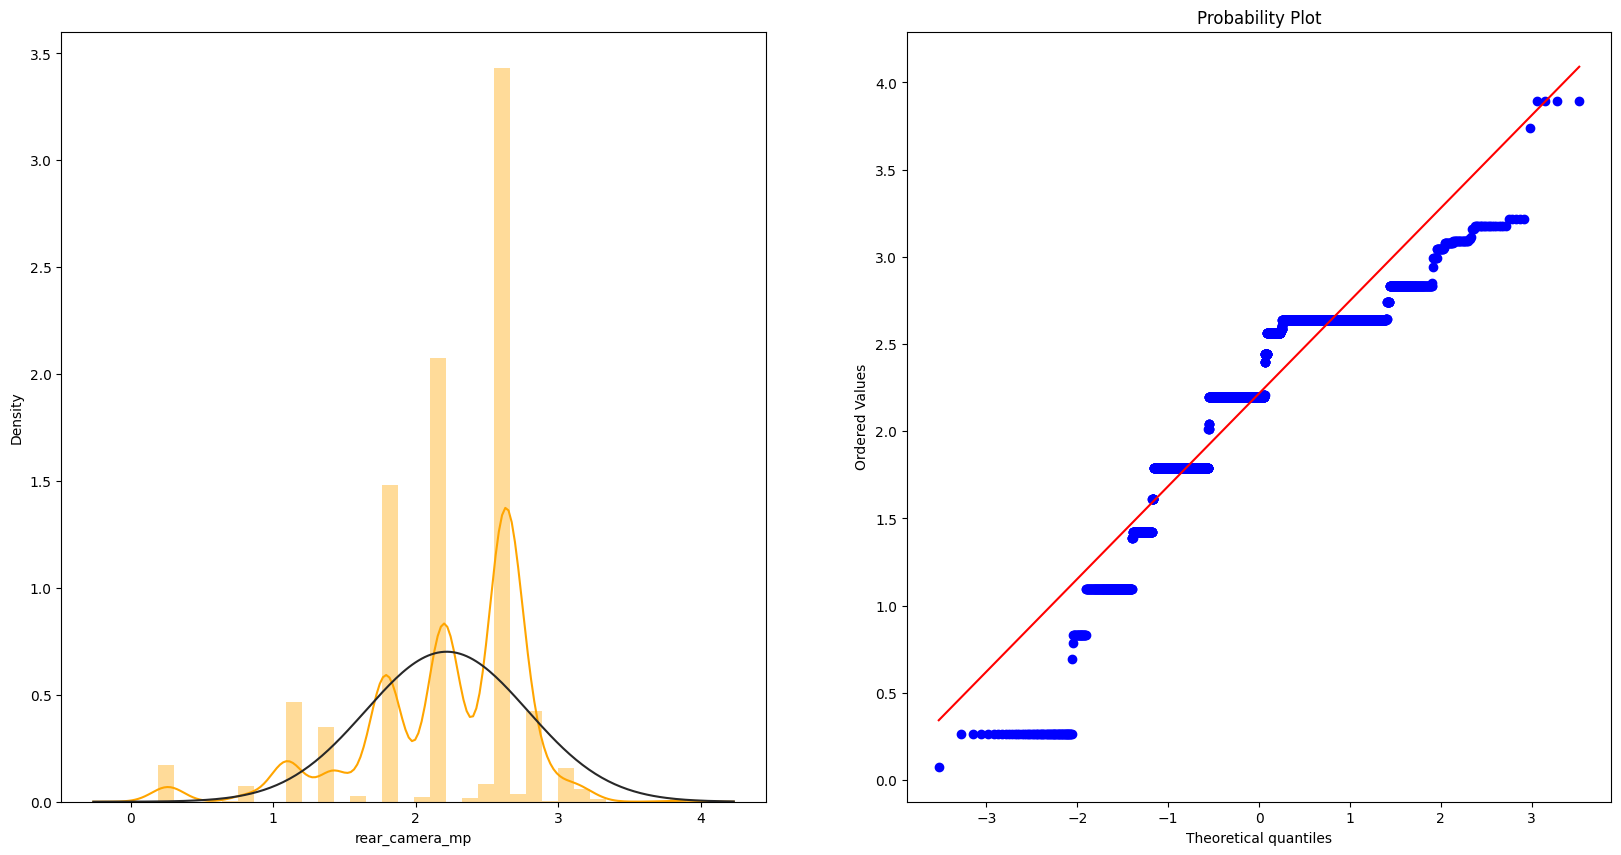

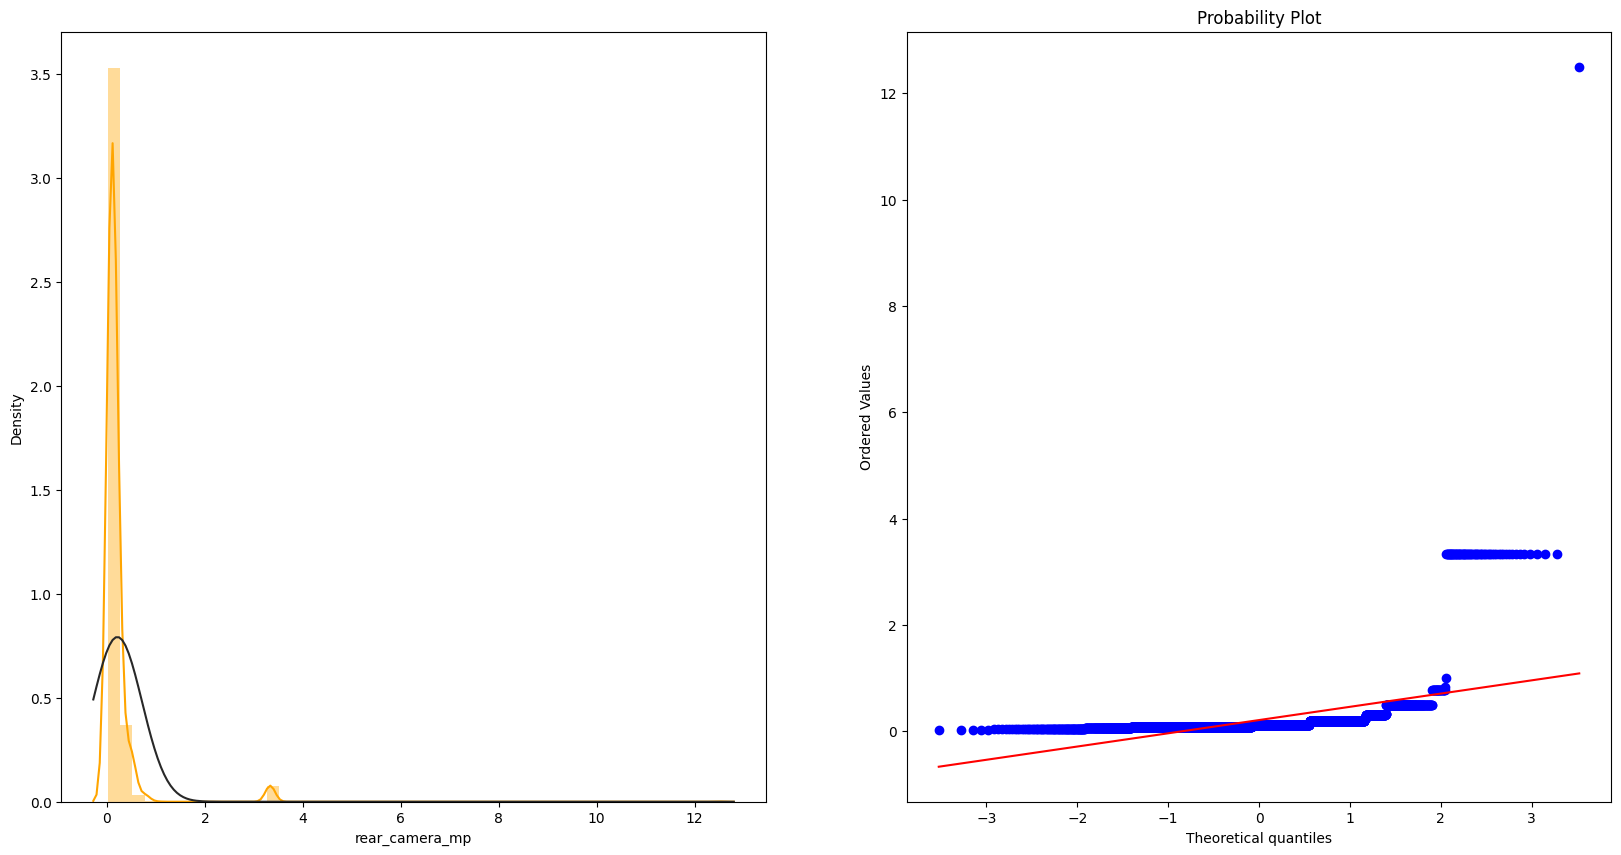

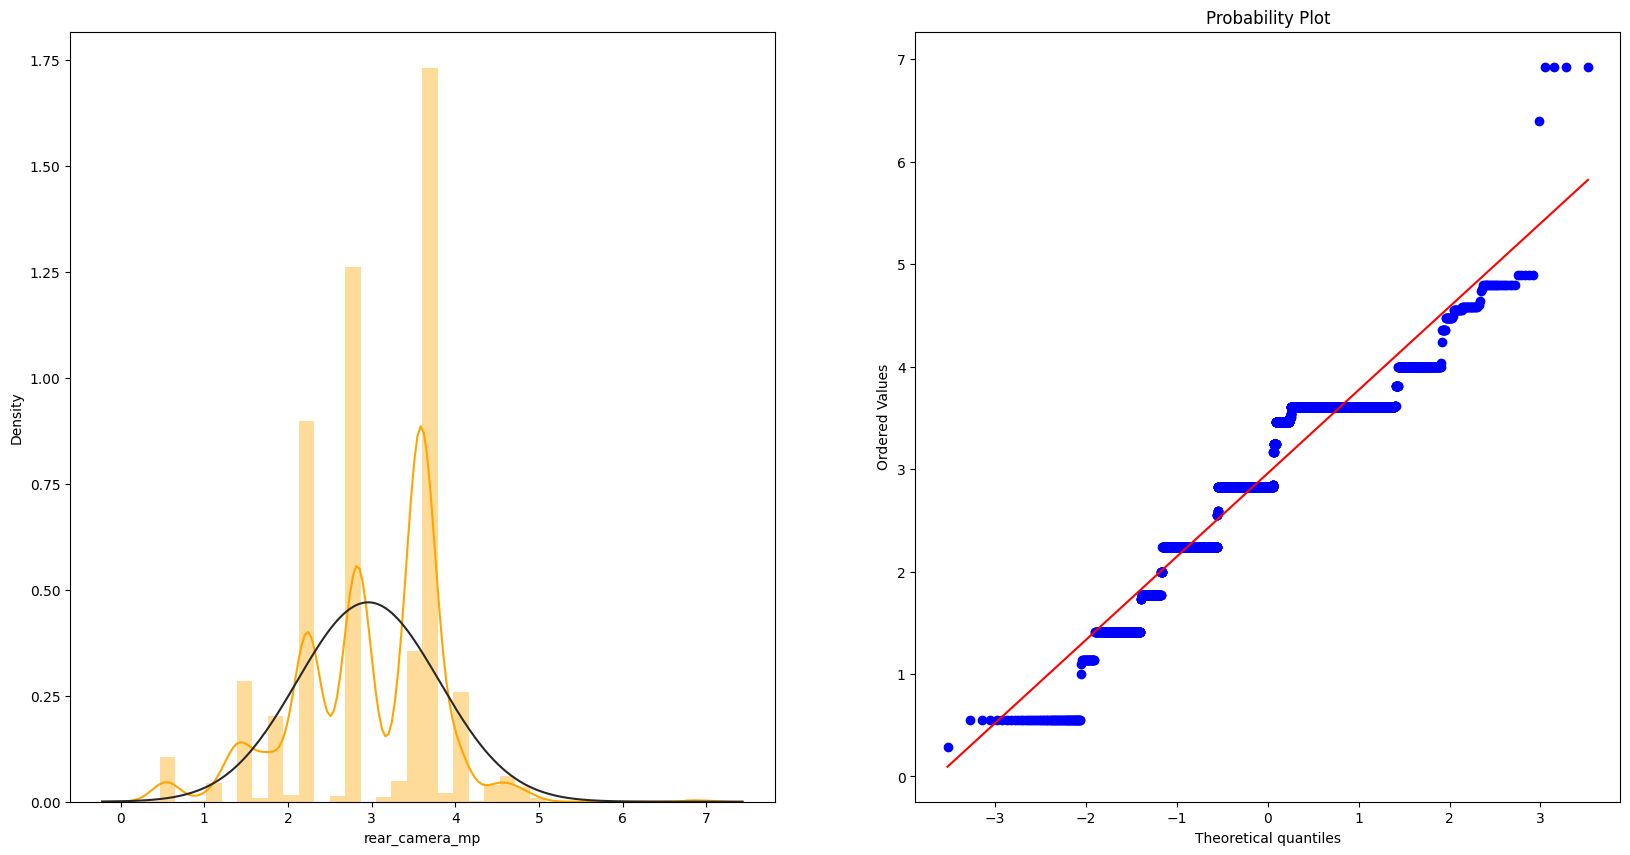

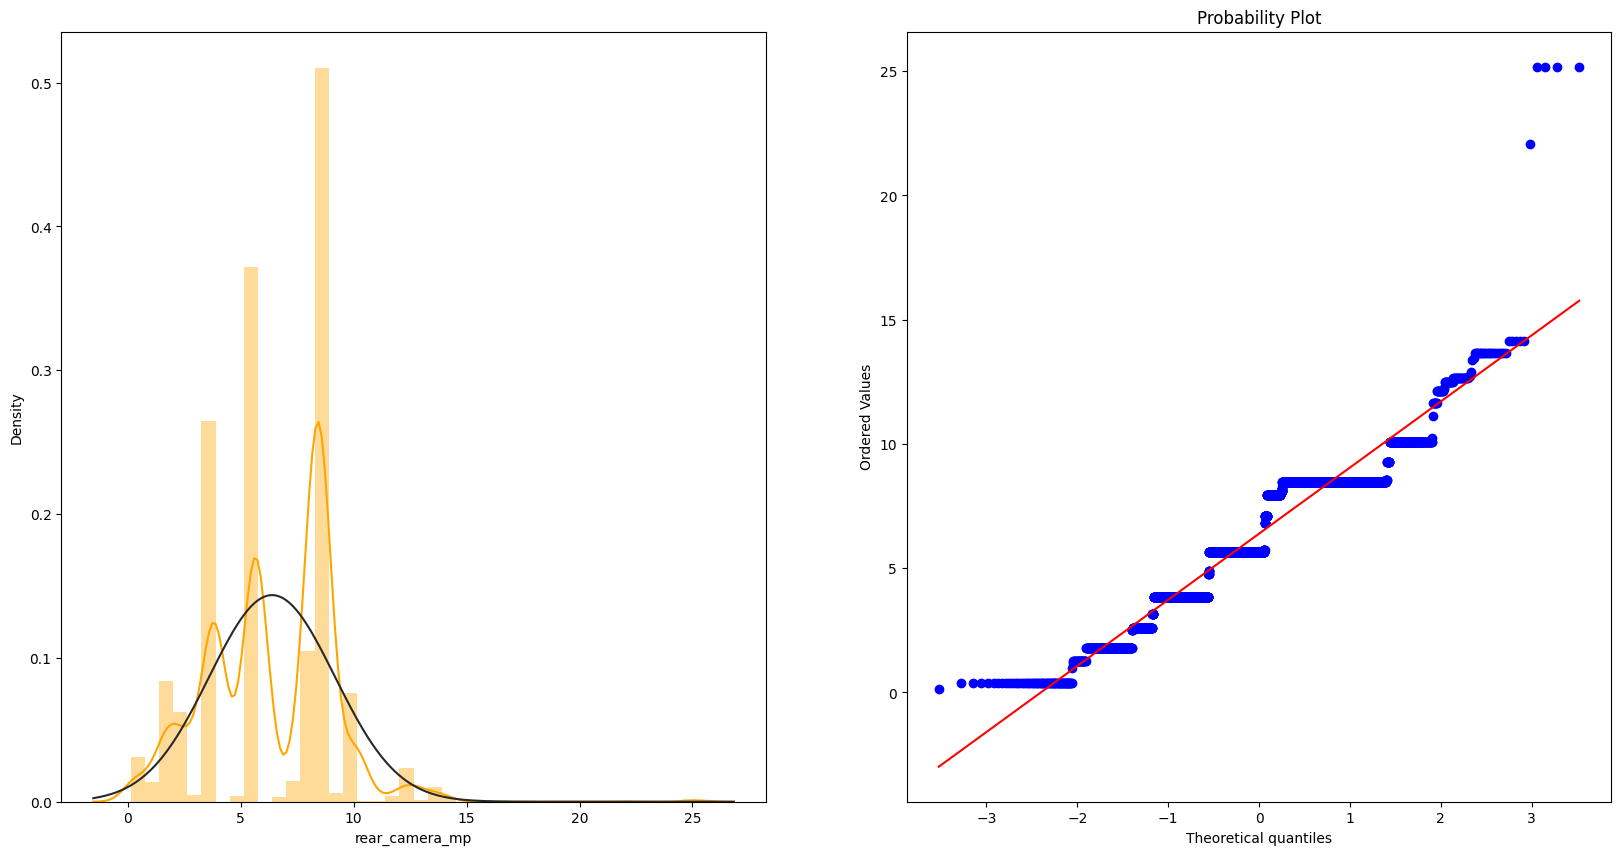

In [ ]:
for x in transformations:
    trying_different_transformations('rear_camera_mp',x)

BoxCox - front_camera_mp
mu  1.5268144858285813  sigma  0.8193688139683319
Log - front_camera_mp
mu  1.5881763402721587  sigma  0.8715756237382545
Reciprocal - front_camera_mp
mu  0.7395276436723018  sigma  1.1133356363904017
Square_Root - front_camera_mp
mu  2.1439325683717114  sigma  1.2236598749843581
Exponential - front_camera_mp
mu  4.201861528431512  sigma  3.818759083260187


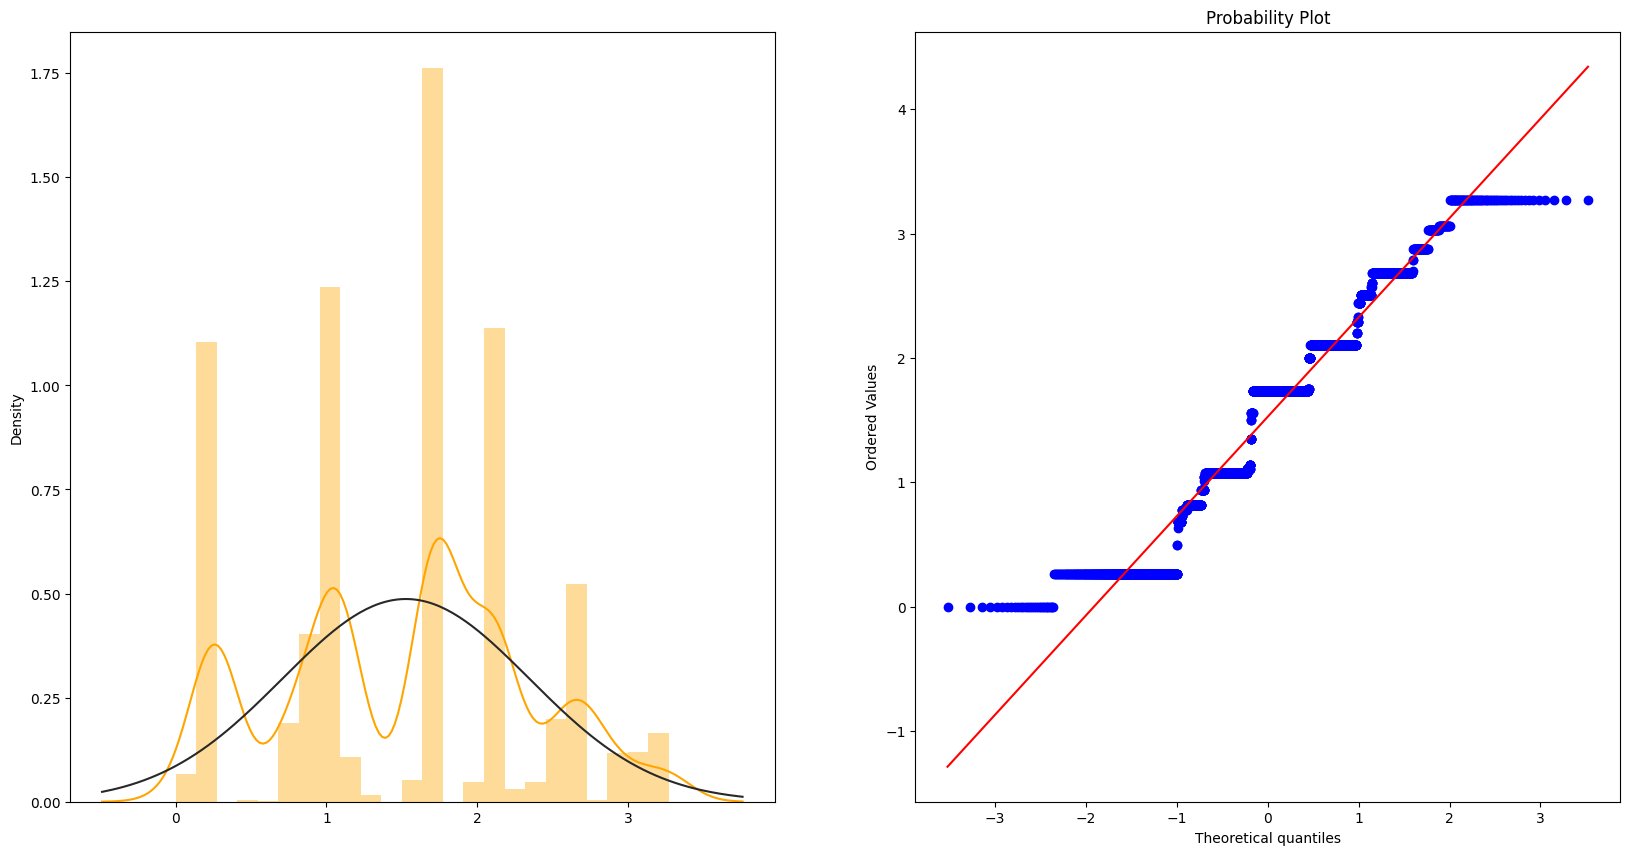

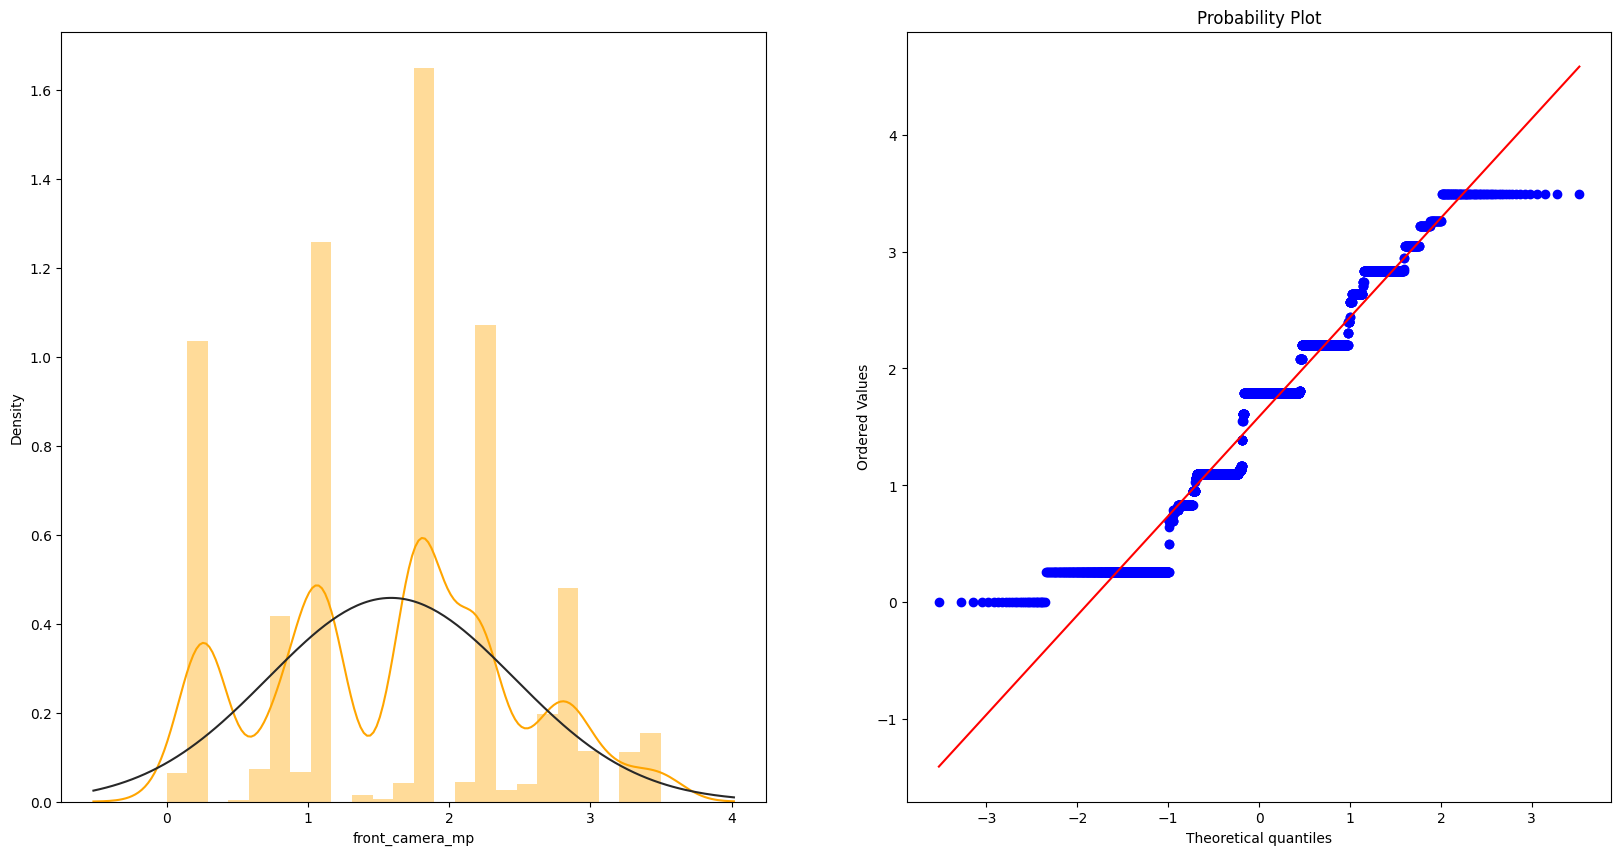

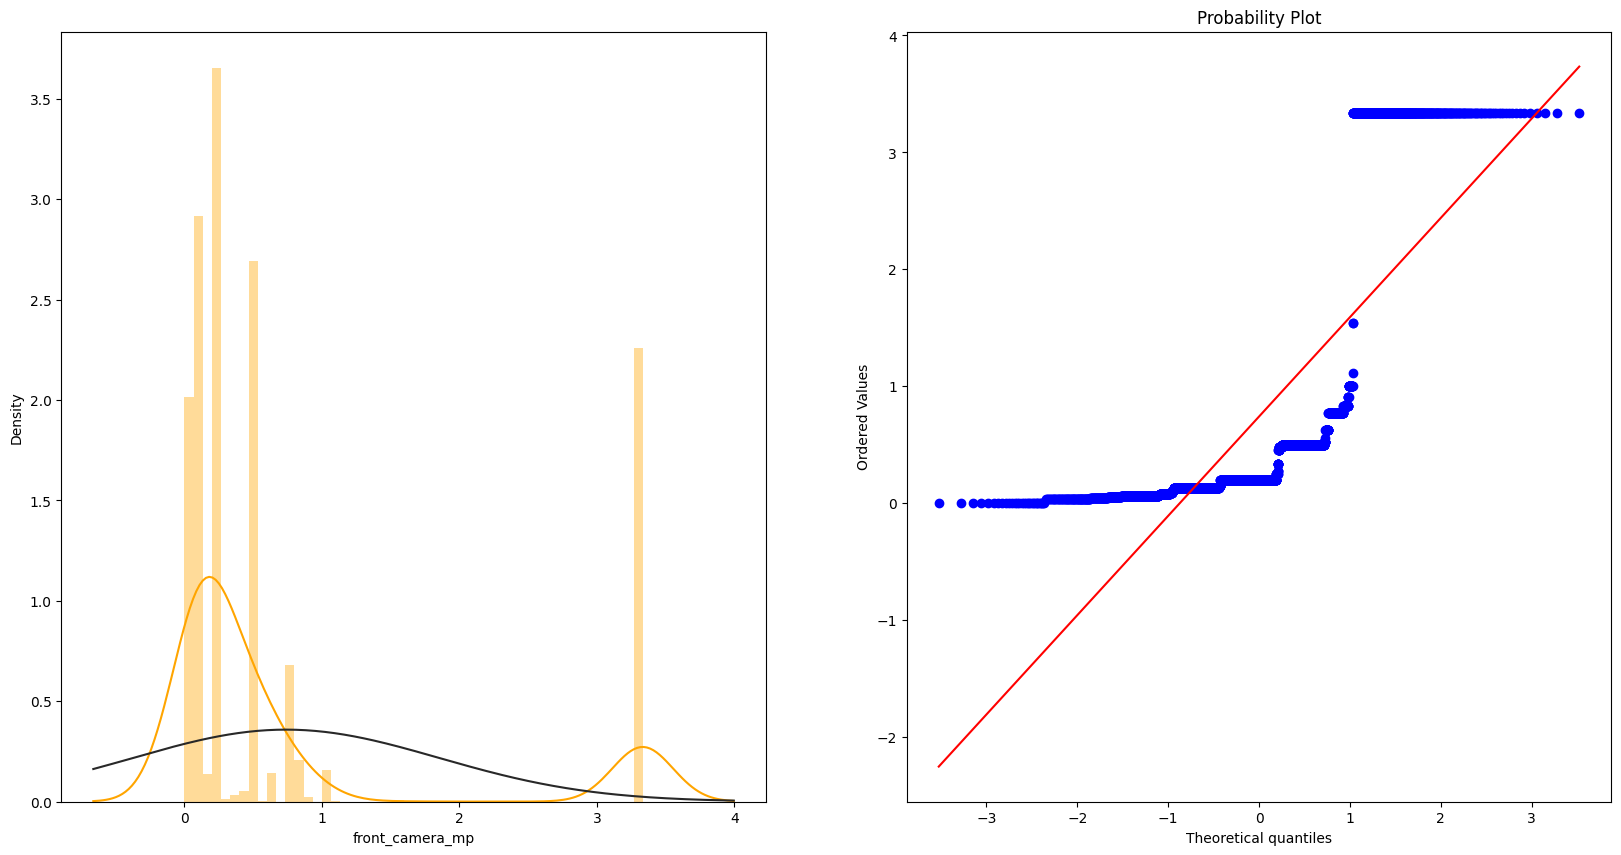

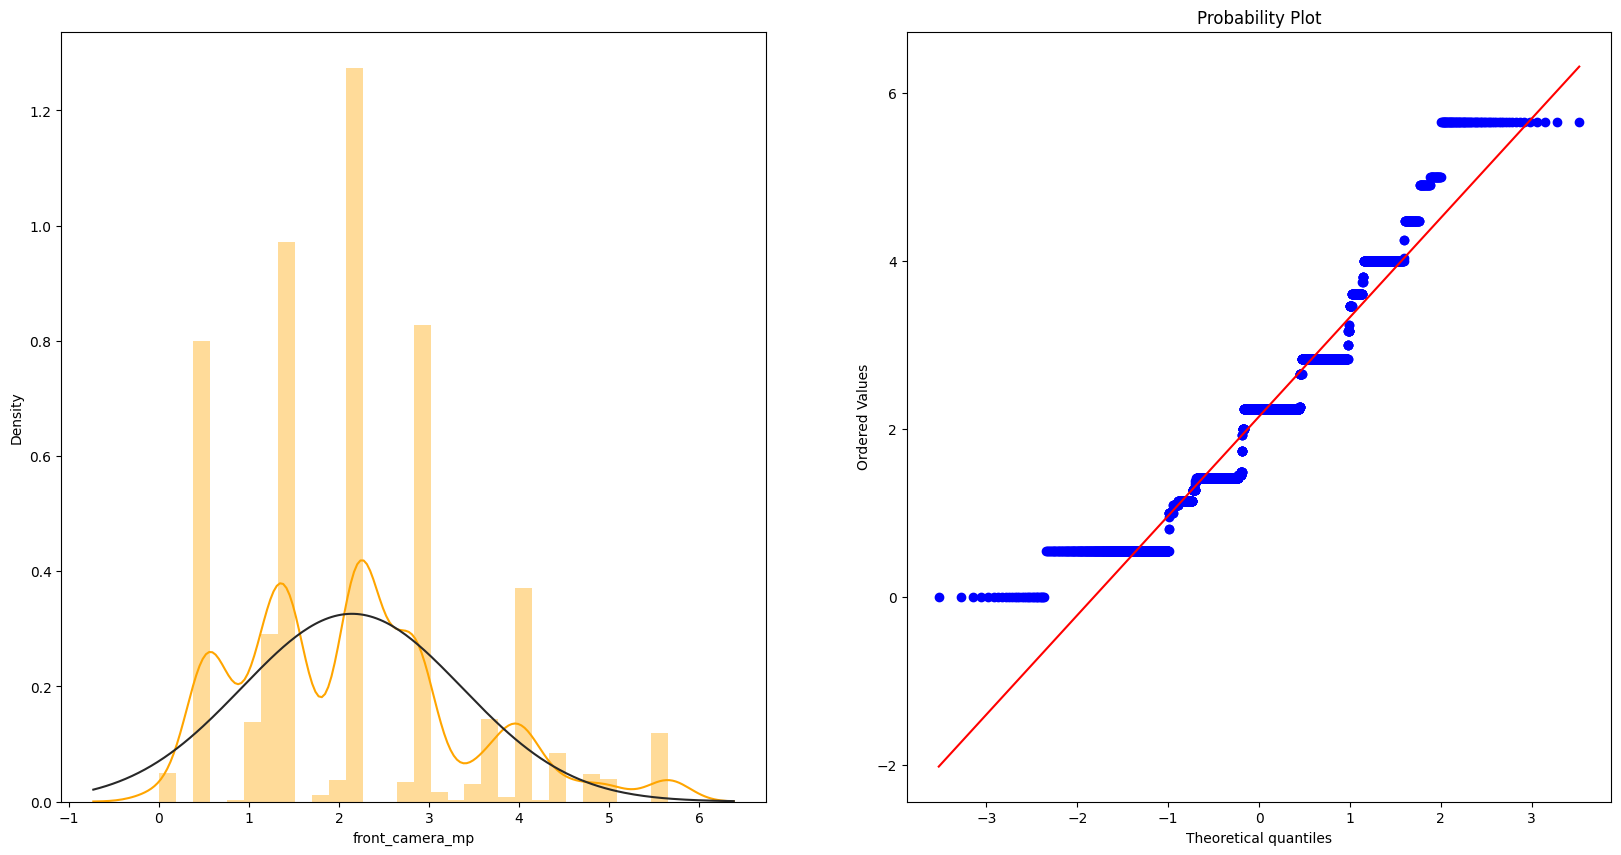

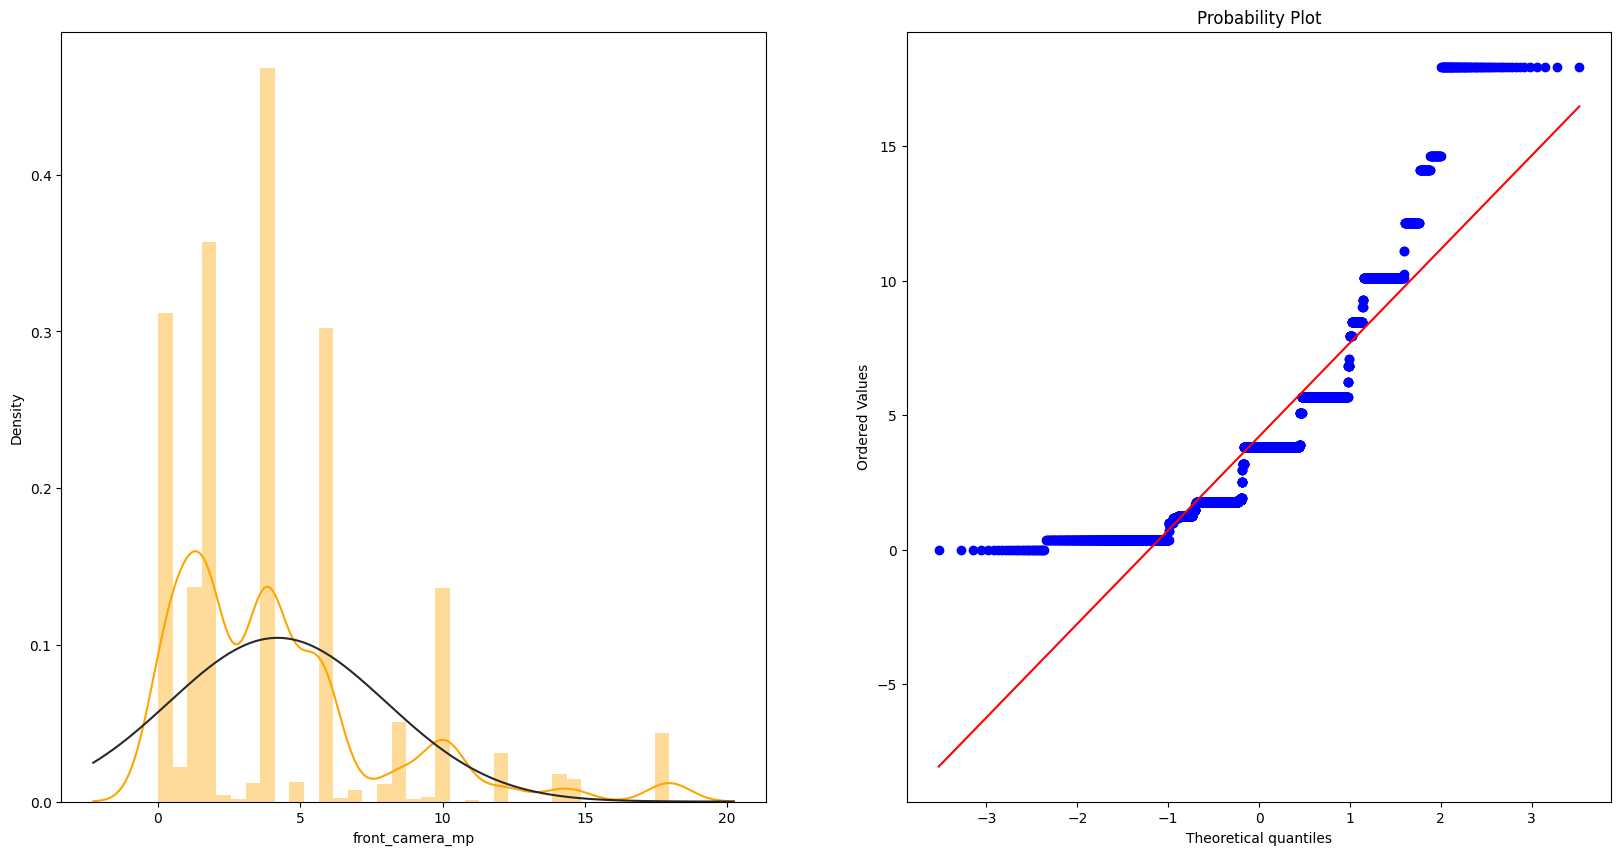

In [ ]:
for x in transformations:
    trying_different_transformations('front_camera_mp',x)

BoxCox - battery
mu  9.140952023574444  sigma  0.5274073169353909
Log - battery
mu  7.950738907016909  sigma  0.4018552646649475
Reciprocal - battery
mu  0.00038254872318301626  sigma  0.00016467025906119576
Square_Root - battery
mu  54.34431173601634  sigma  11.028271505952869
Exponential - battery
mu  797.3570202661799  sigma  275.7825894042893


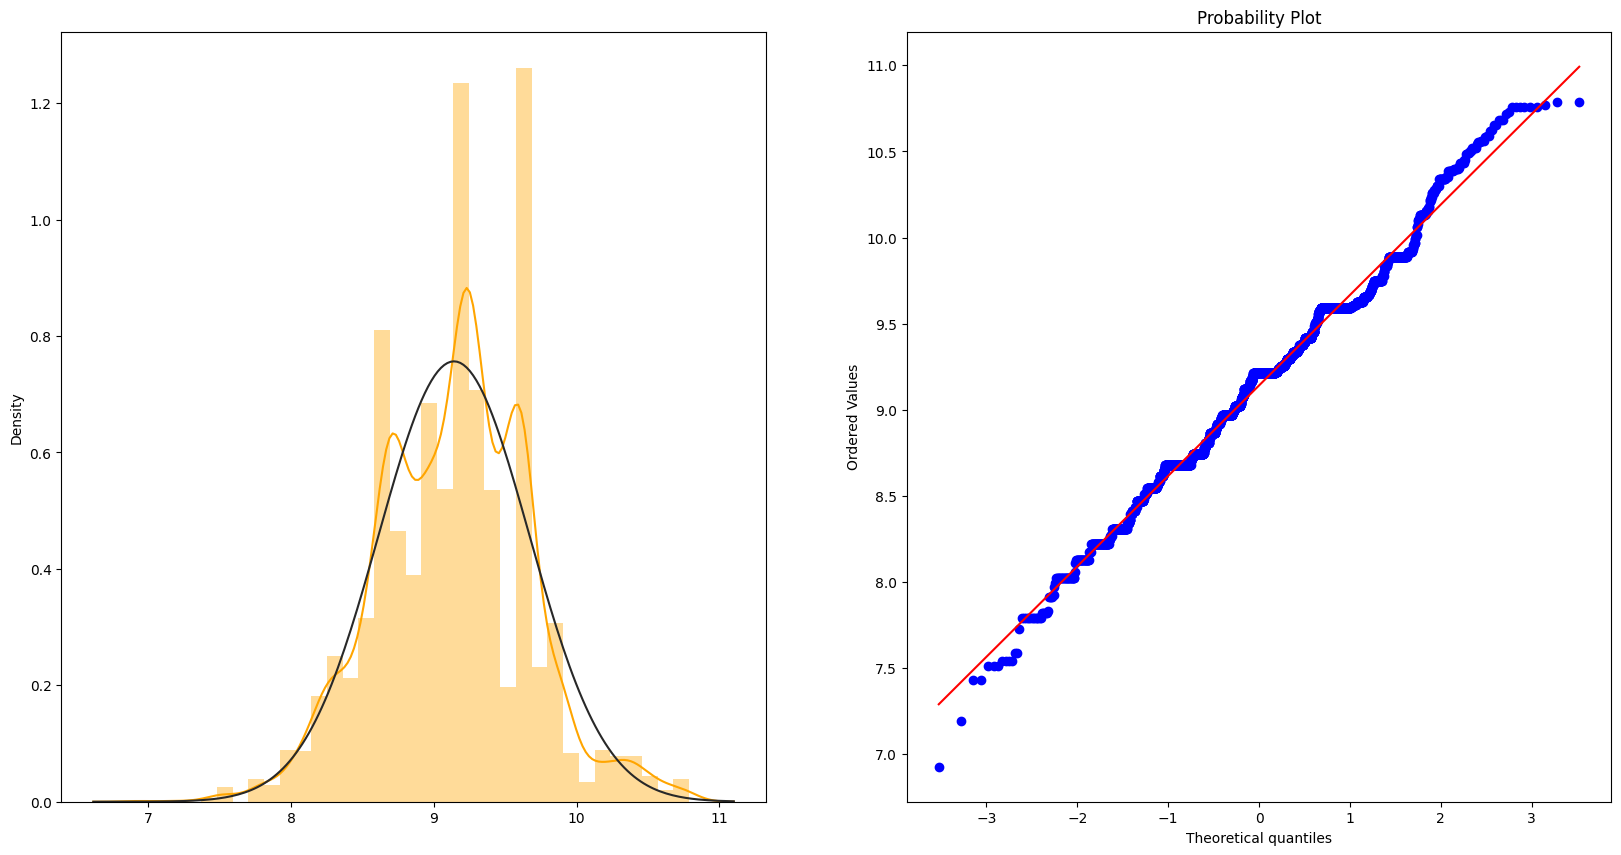

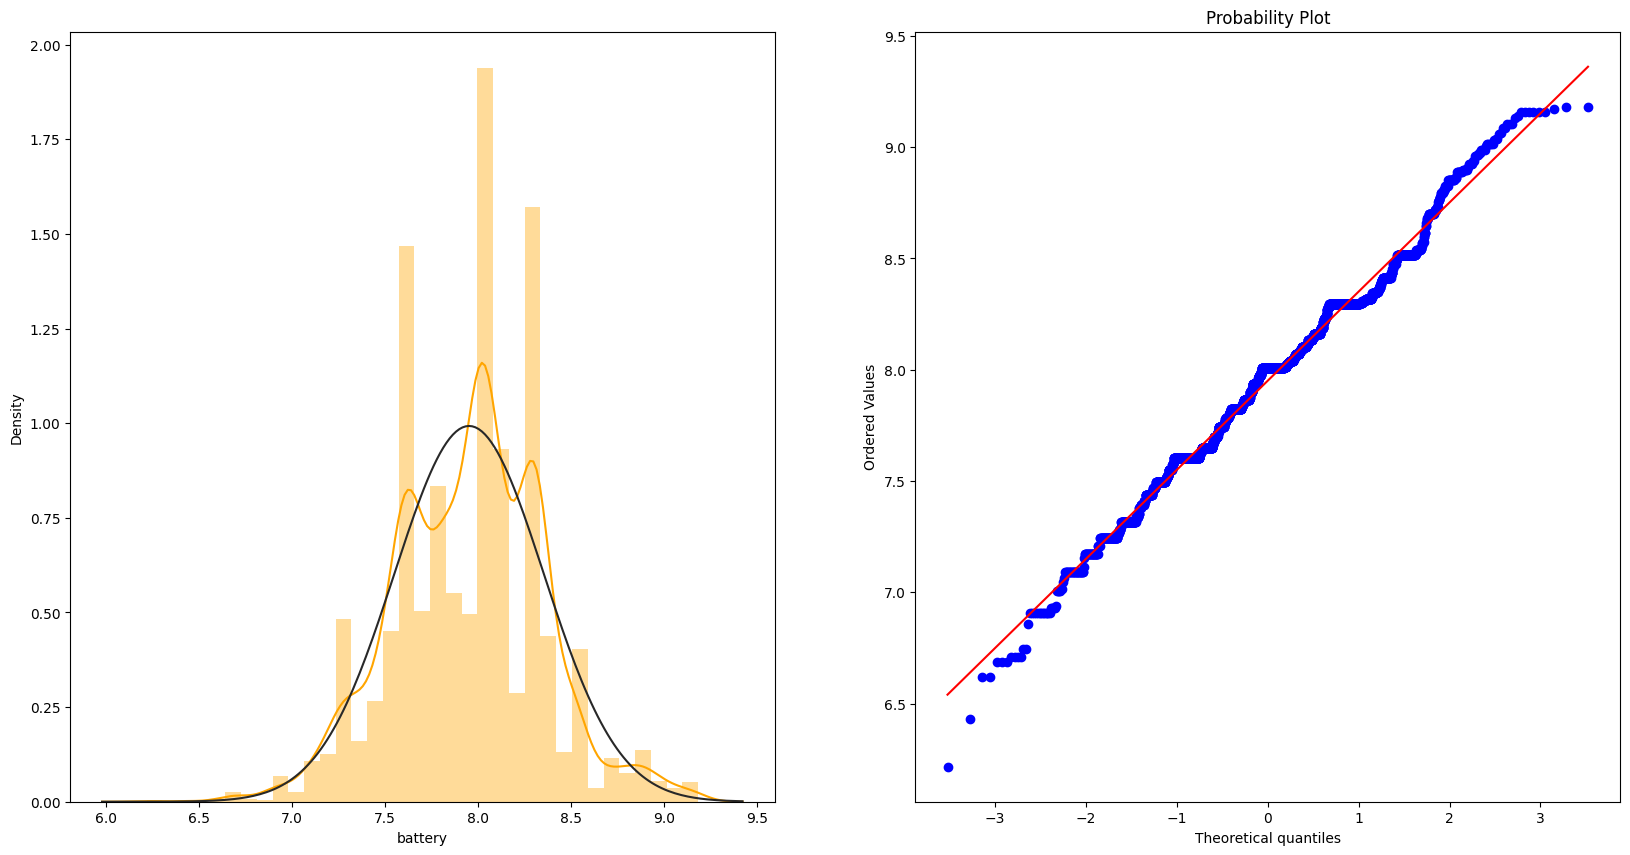

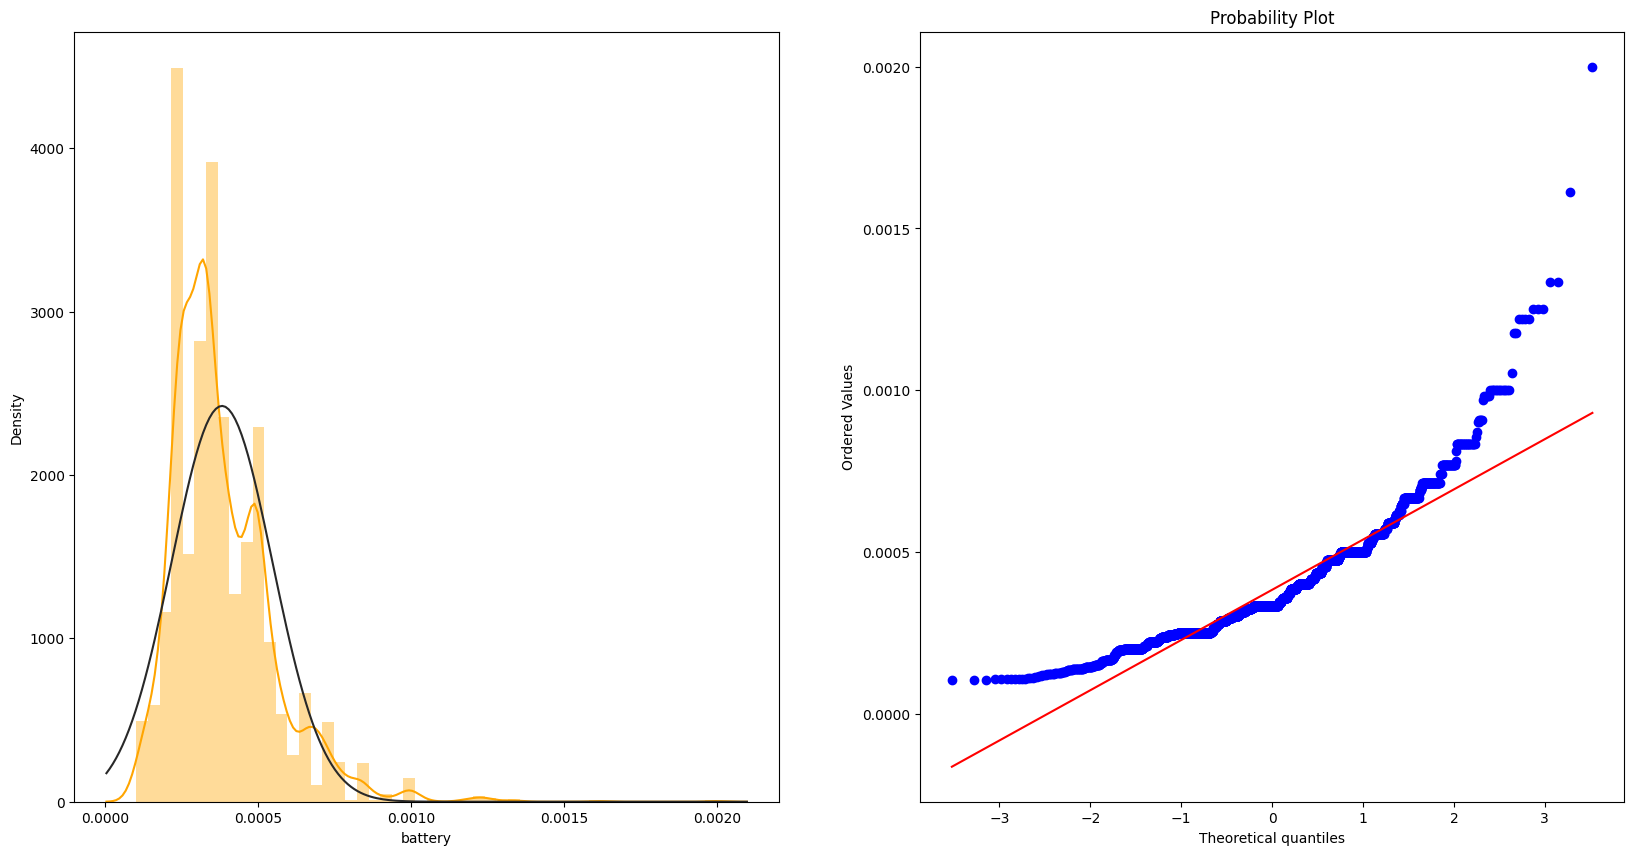

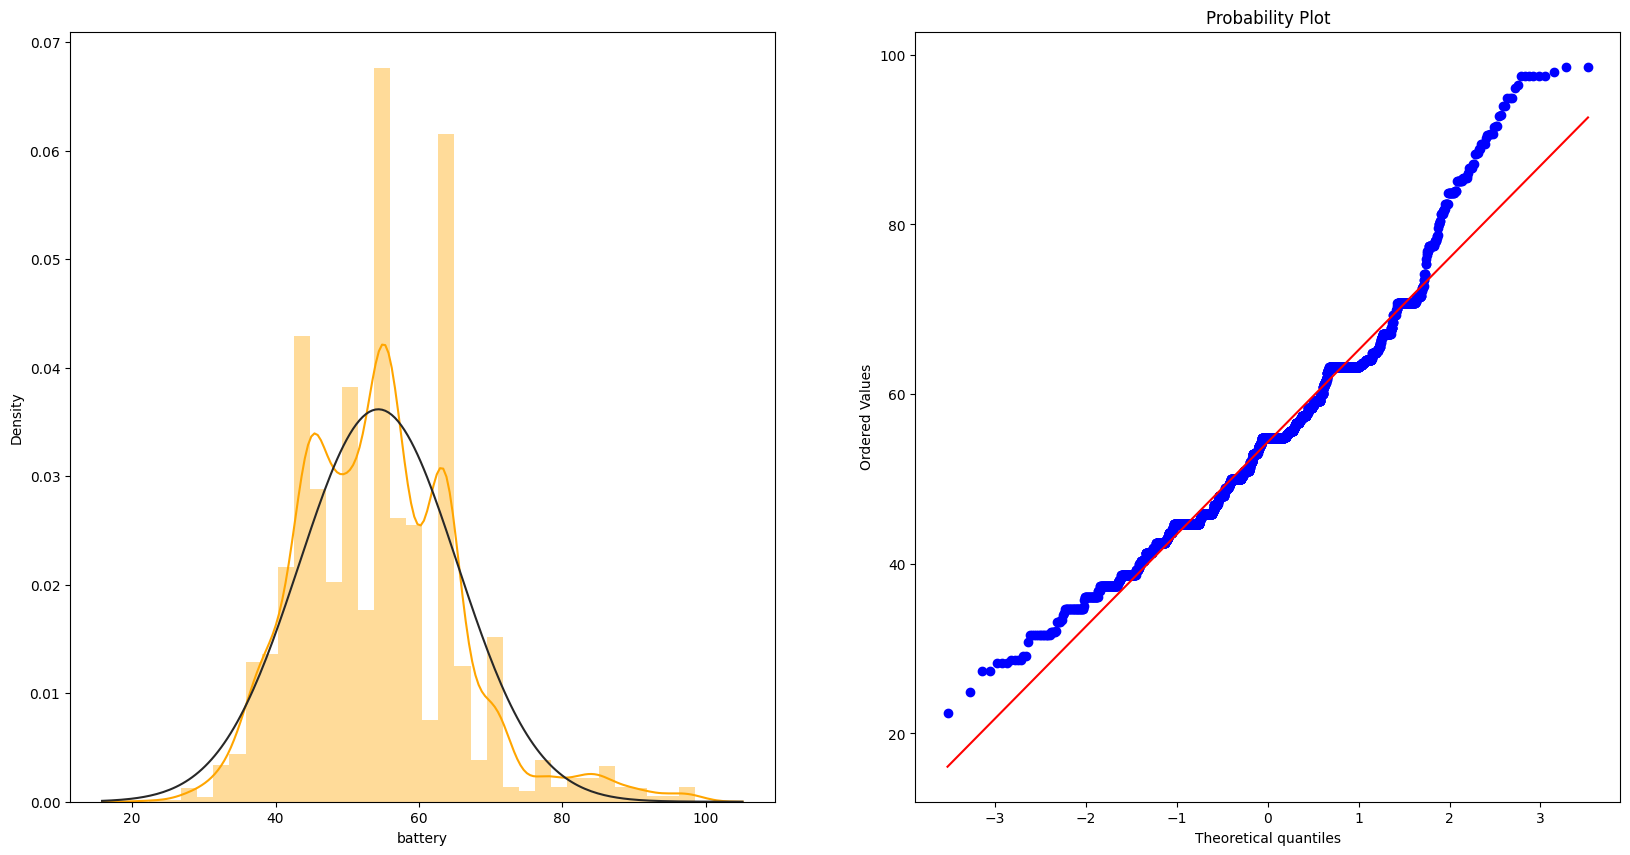

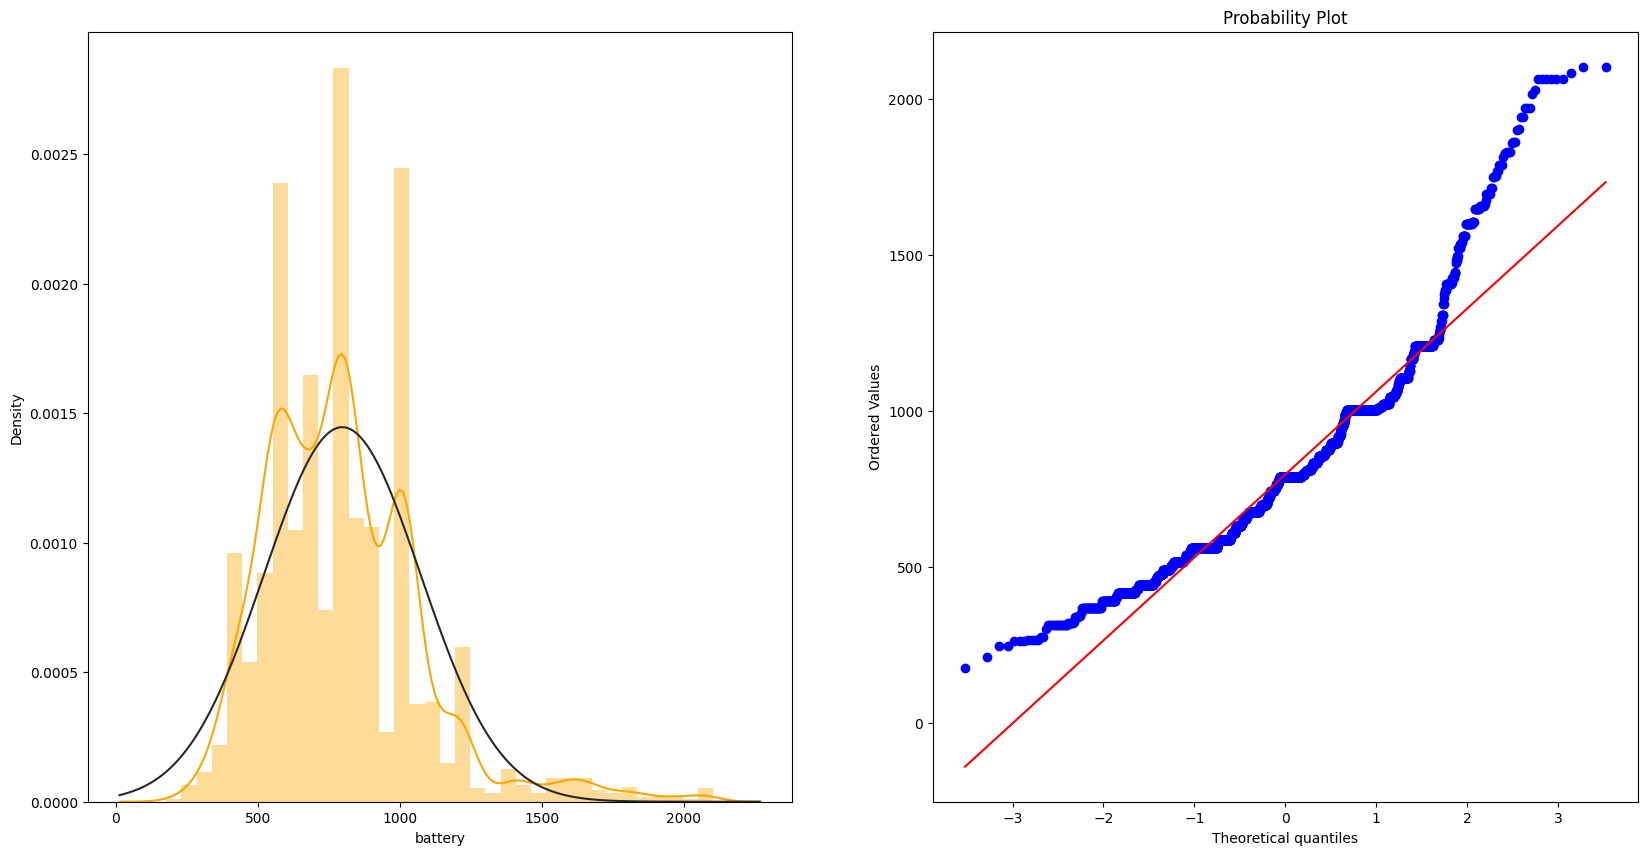

In [ ]:
for x in transformations:
    trying_different_transformations('battery',x)

BoxCox - weight
mu  0.8331451980180247  sigma  0.0006235641366920061
Log - weight
mu  5.1382326242001595  sigma  0.3466813526975624
Reciprocal - weight
mu  0.006213180426972396  sigma  0.0017488702471315902
Square_Root - weight
mu  13.23412673316506  sigma  2.711369811299194
Exponential - weight
mu  75.69601373789506  sigma  29.257851090331783


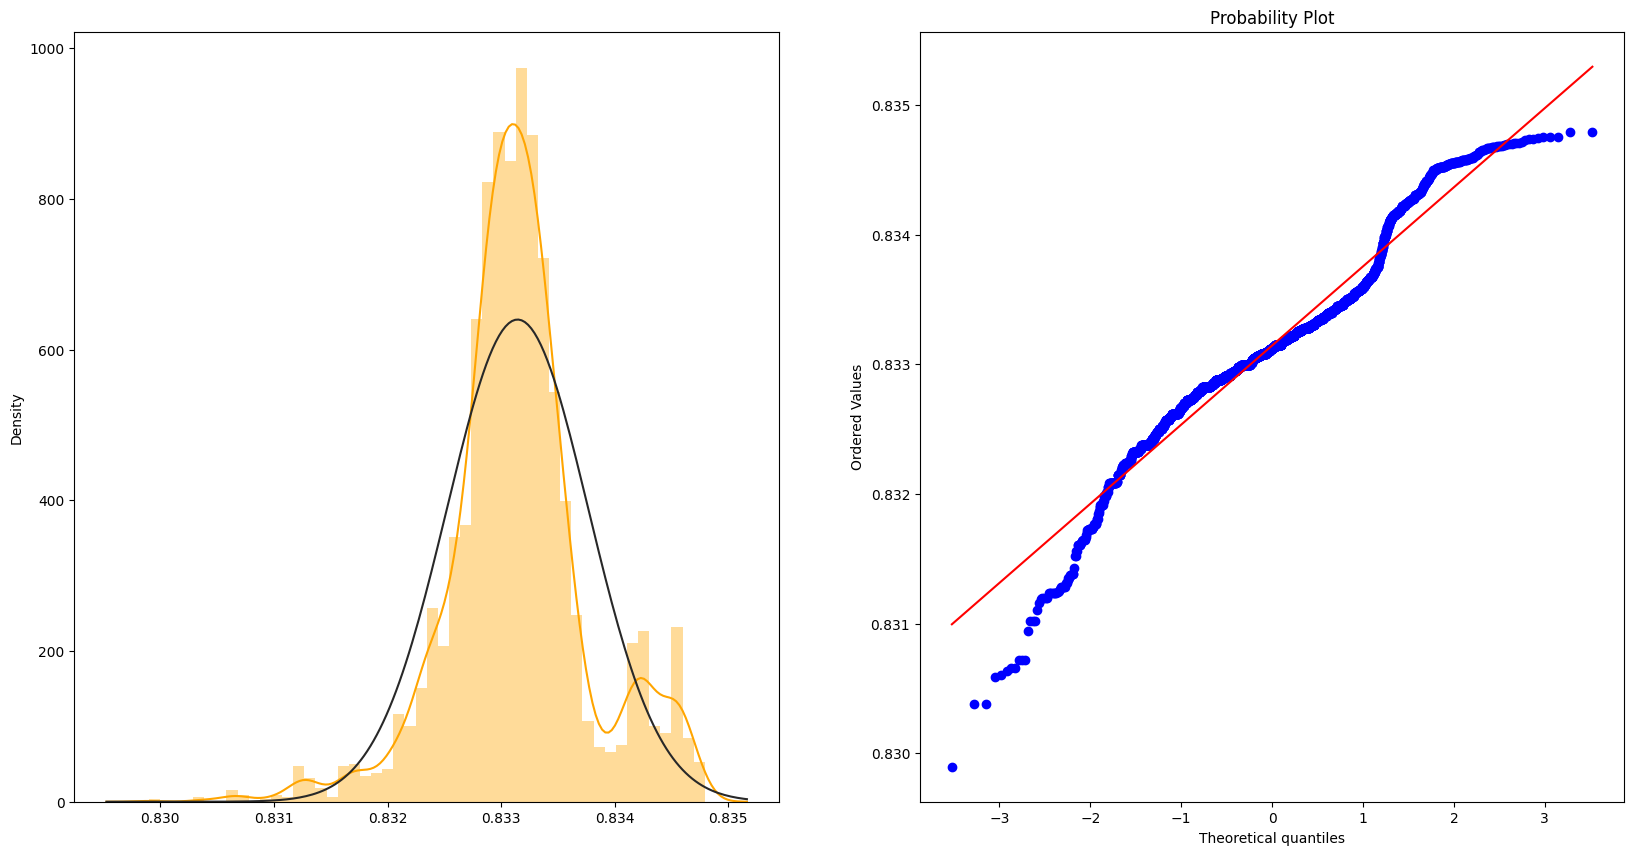

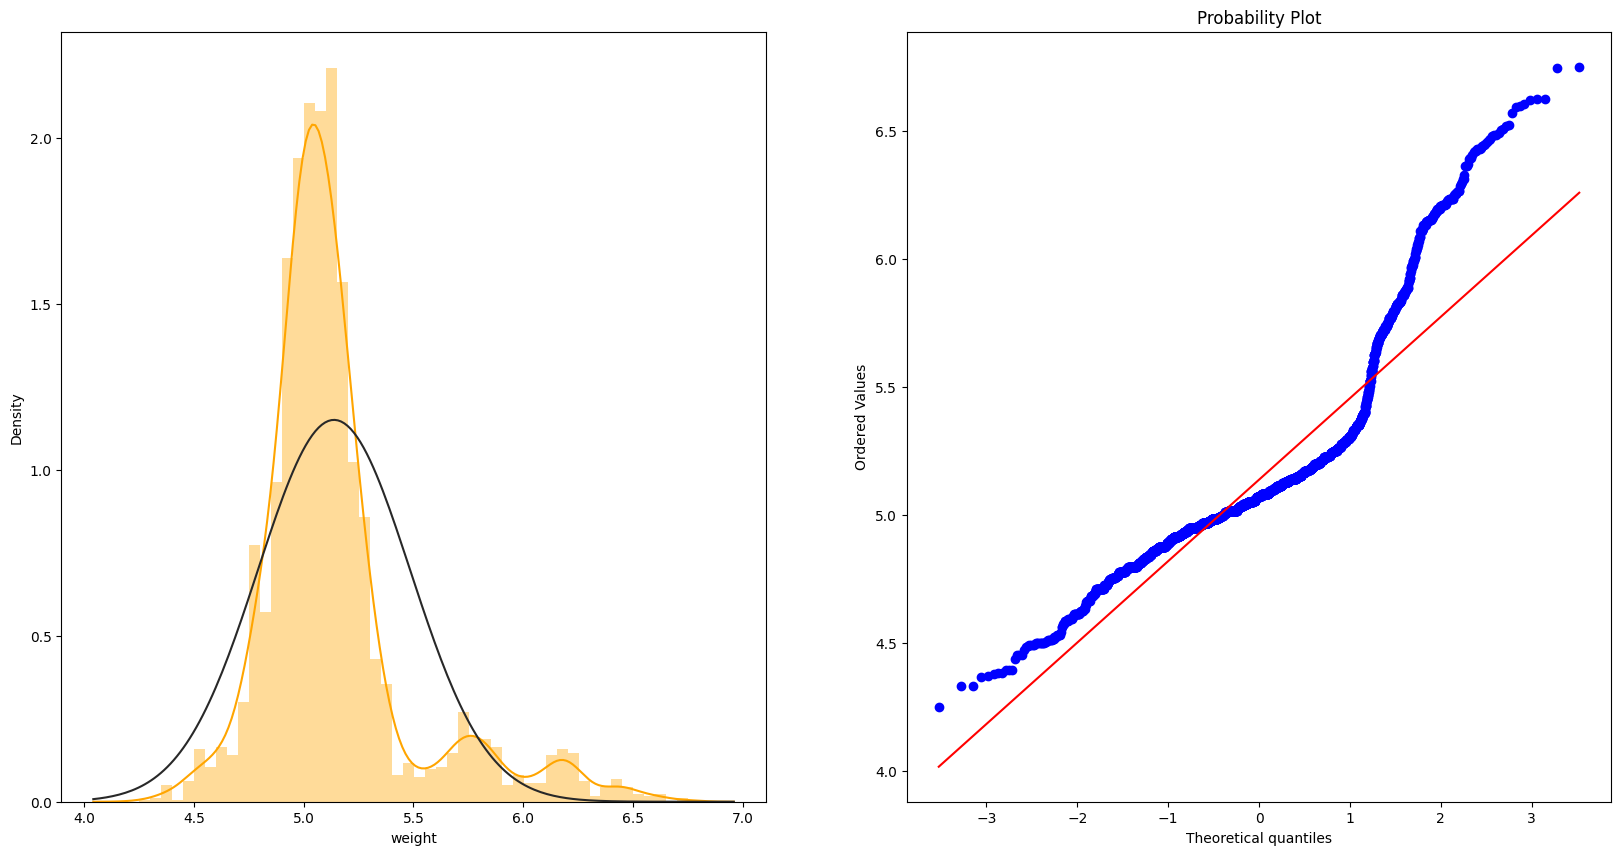

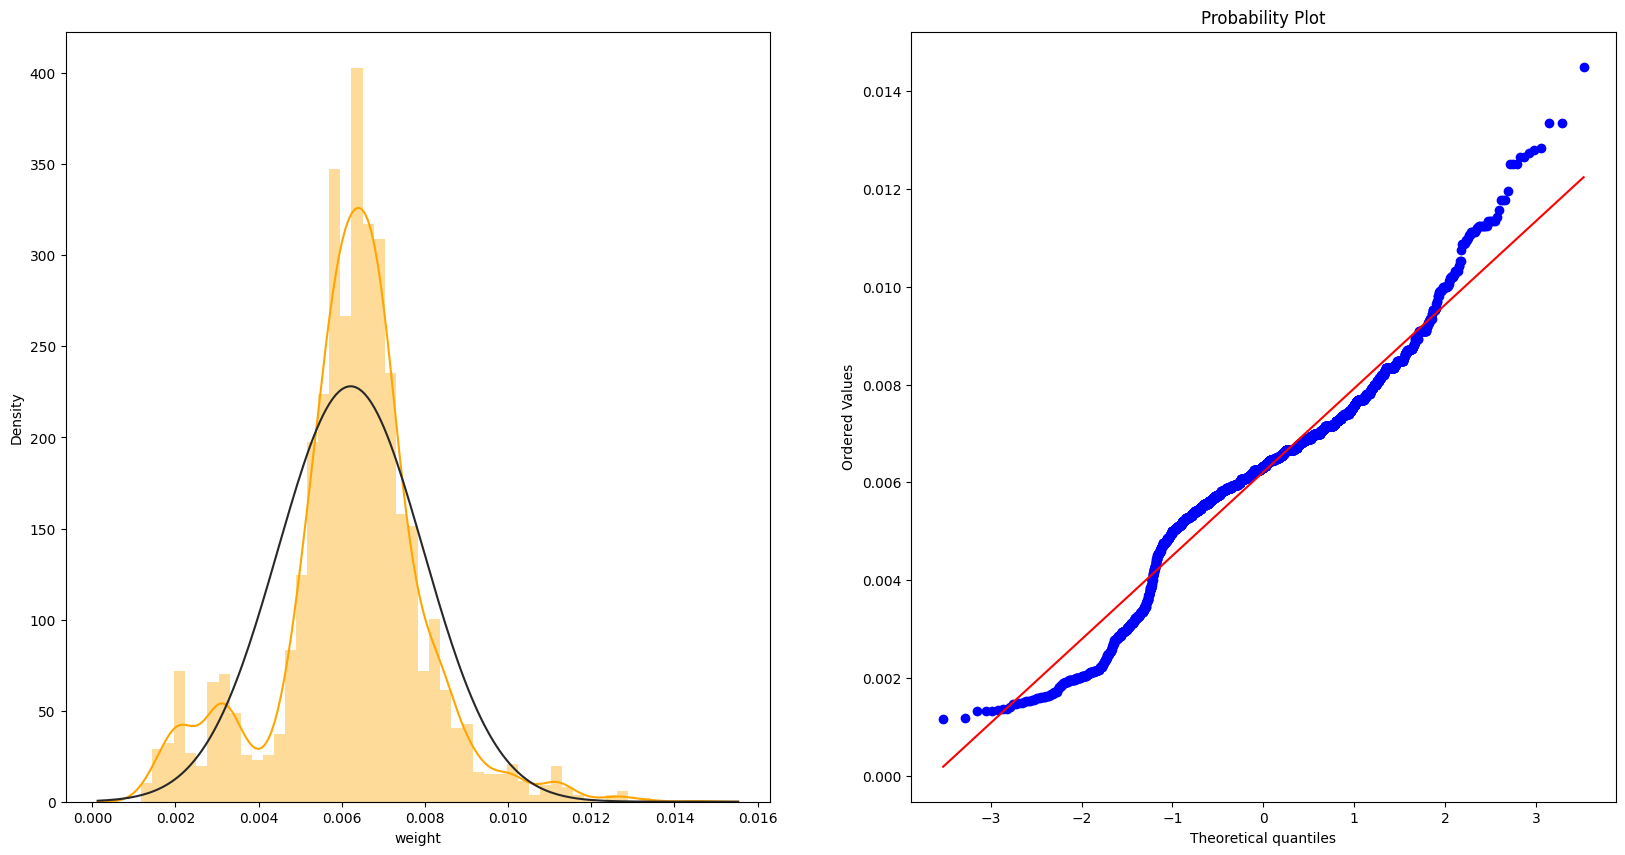

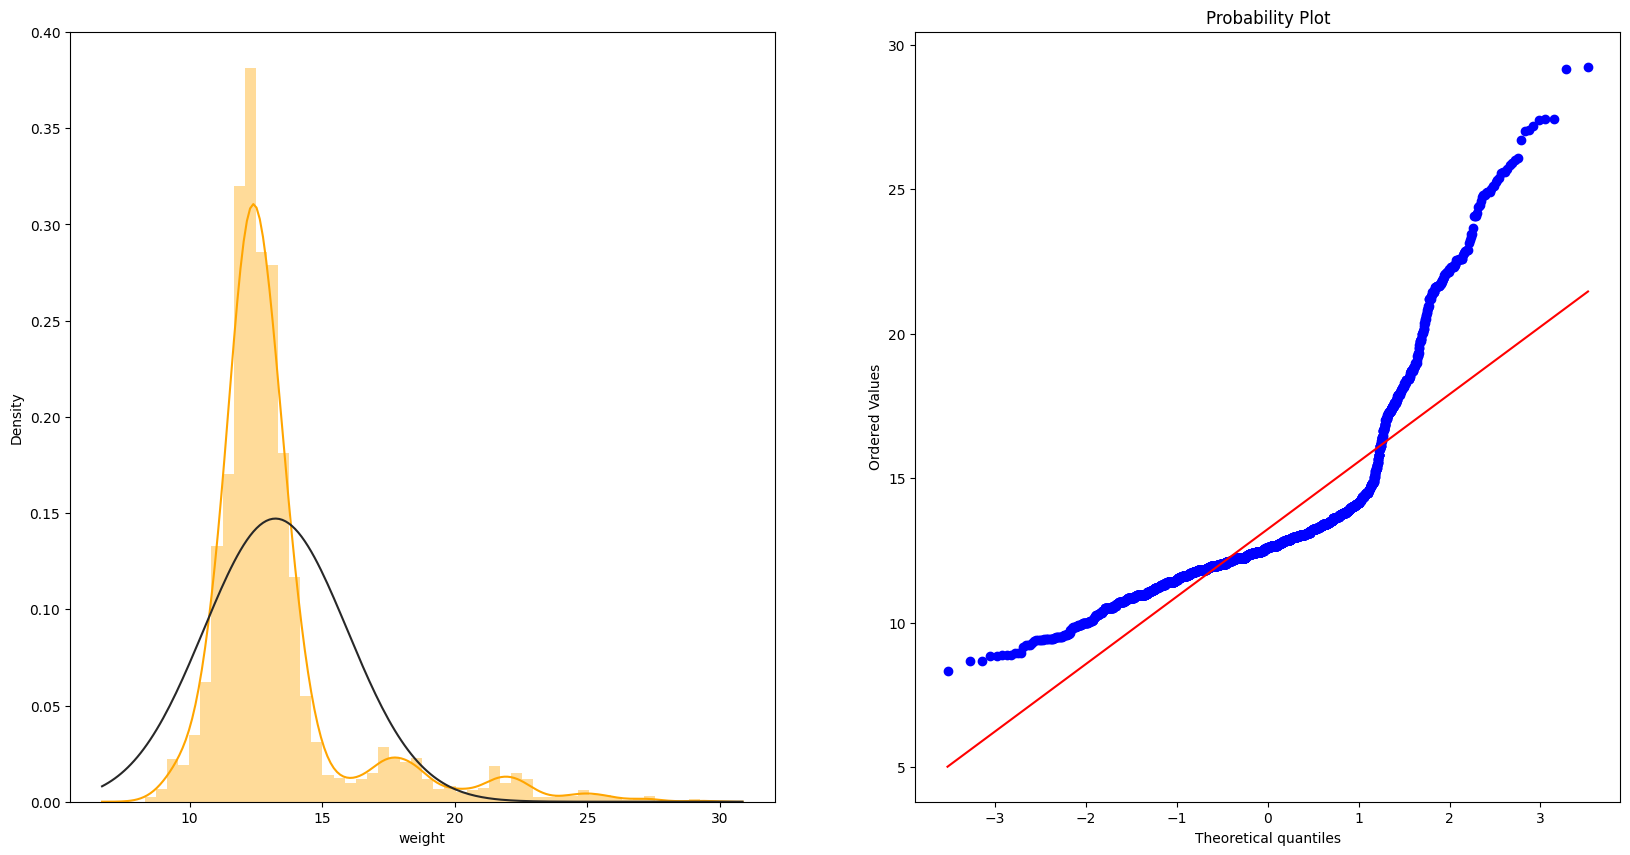

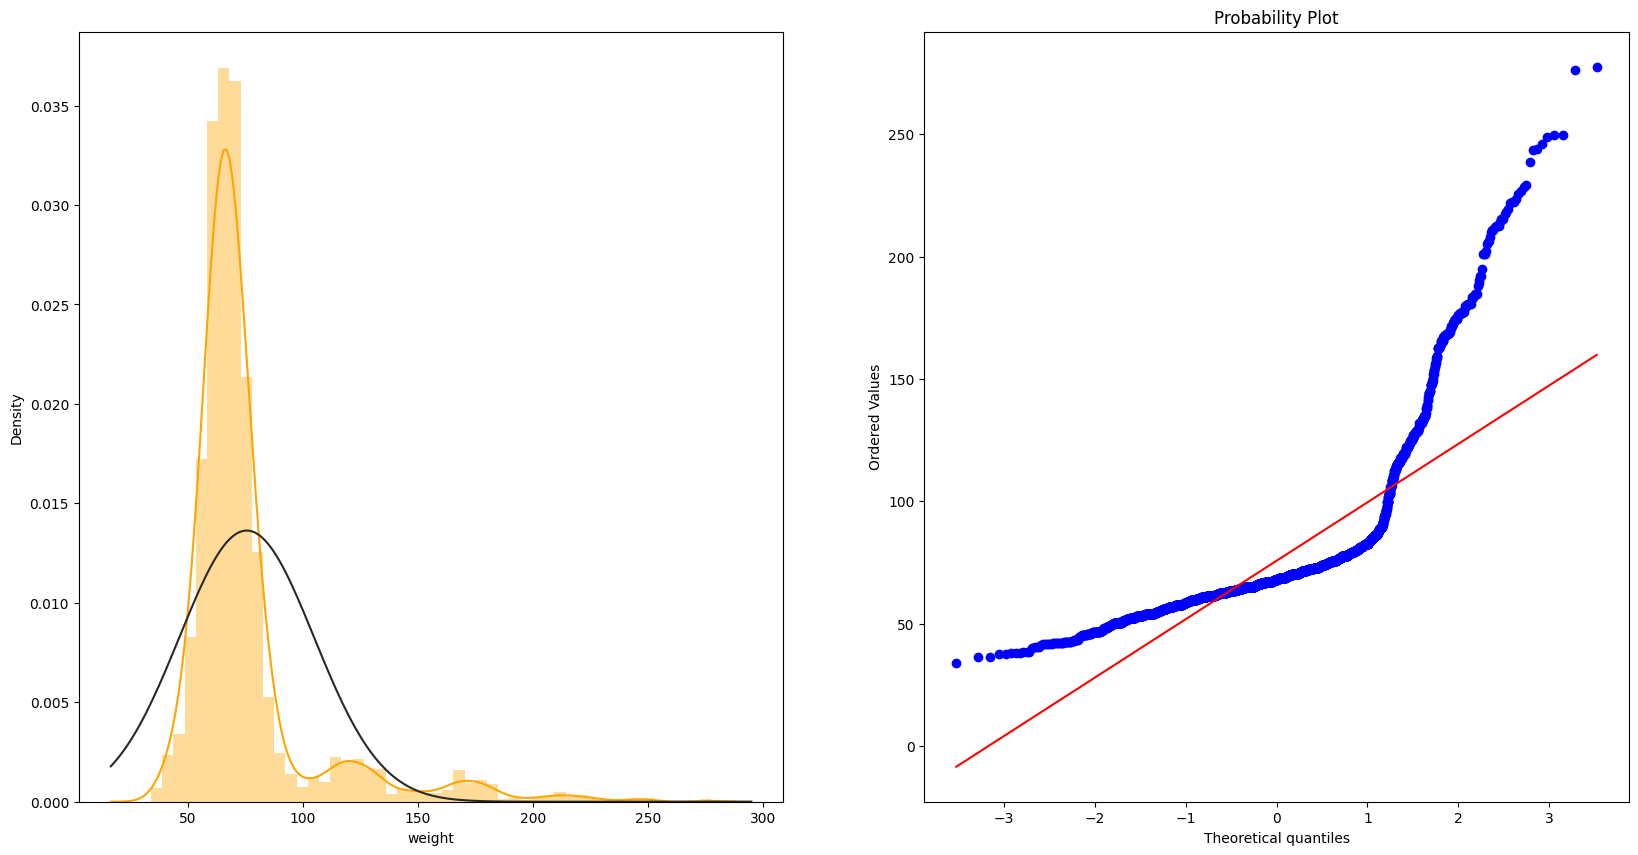

In [ ]:
for x in transformations:
    trying_different_transformations('weight',x)

BoxCox - days_used
mu  3496.8057898989555  sigma  1439.0442684769423
Log - days_used
mu  6.468905953652584  sigma  0.4336628749605923
Reciprocal - days_used
mu  0.0017471434574026178  sigma  0.0011108860529121054
Square_Root - days_used
mu  25.917714586315785  sigma  4.895654067969873
Exponential - days_used
mu  231.58748020692875  sigma  67.54464188114896


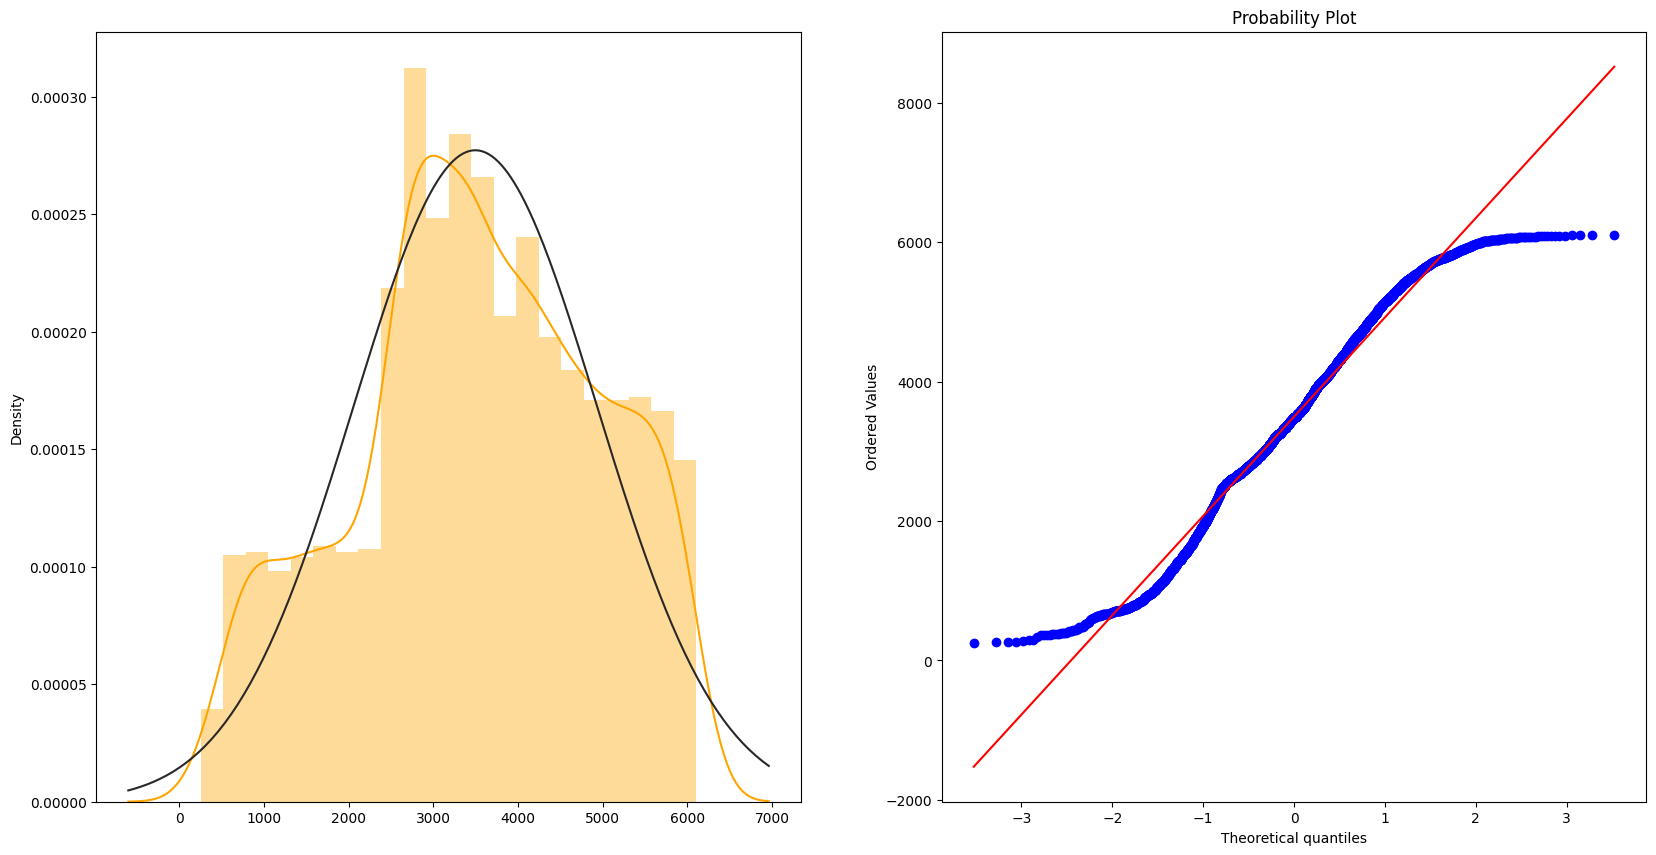

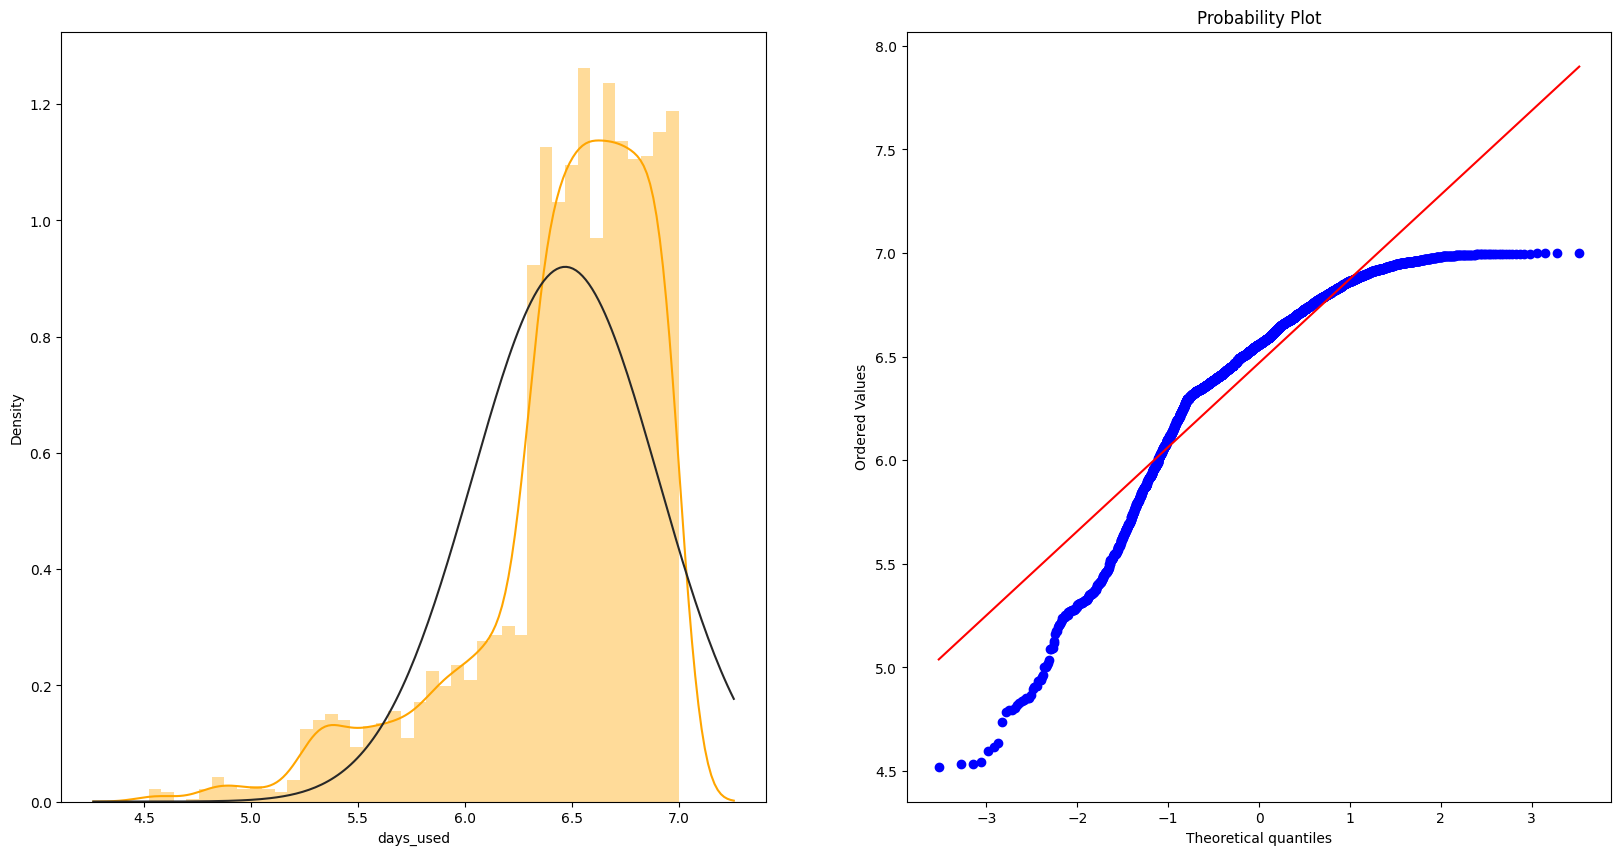

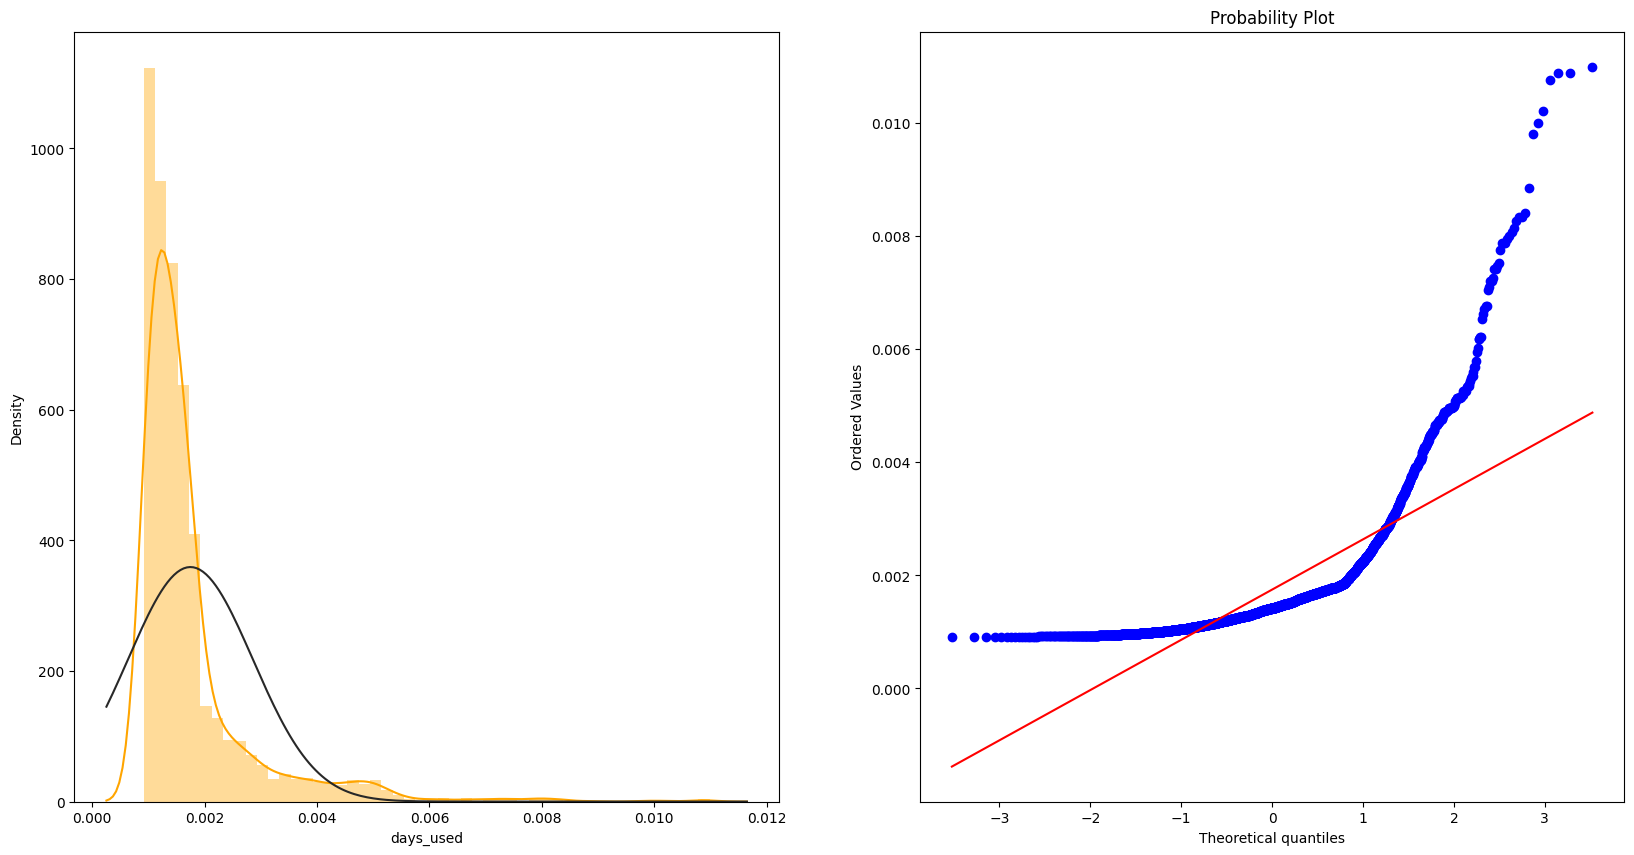

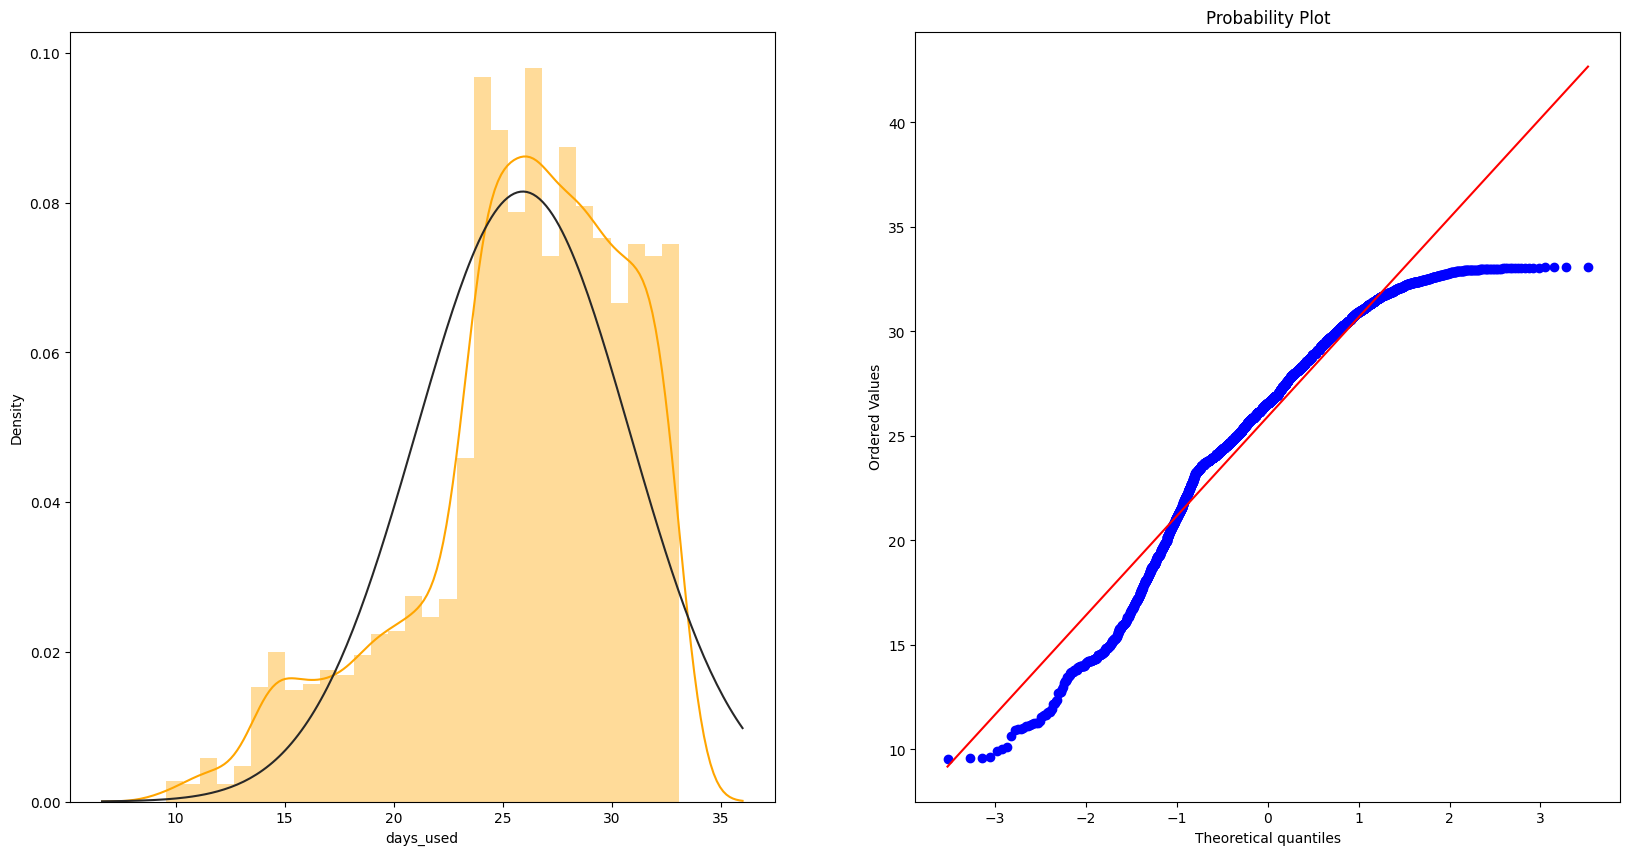

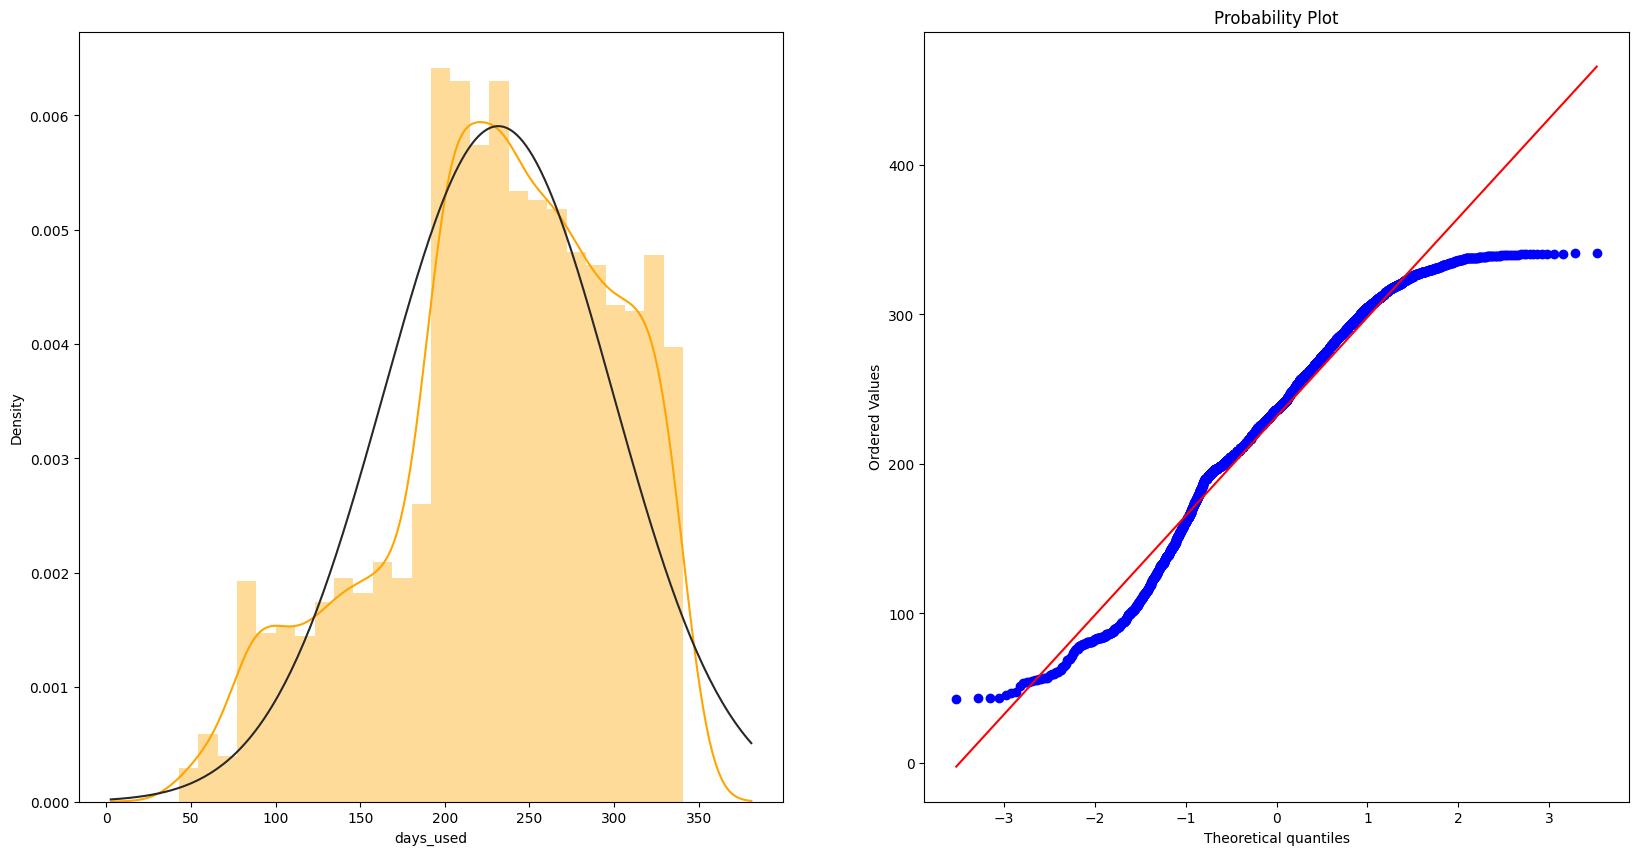

In [ ]:
for x in transformations:
    trying_different_transformations('days_used',x)

In [ ]:
def skweness_correction(columnName):    
    if columnName == 'front_camera_mp' or columnName == 'screen_size' or columnName == 'battery':
        data[columnName], temp_params = boxcox(
        data[columnName]+1)
    elif columnName == 'weight':
        data[columnName] = 1/data[columnName].replace([np.inf, -np.inf], 0)
    elif columnName =='rear_camera_mp':
        data[columnName] = data[columnName]**(1/2)
    print('''After Correcting''')
    (mu, sigma) = norm.fit(data[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot = plt)
    plt.show();

After Correcting
Mu after correcting SCREEN_SIZE : 3.5698404424676915, Sigma after correcting SCREEN_SIZE : 0.4545136324169383


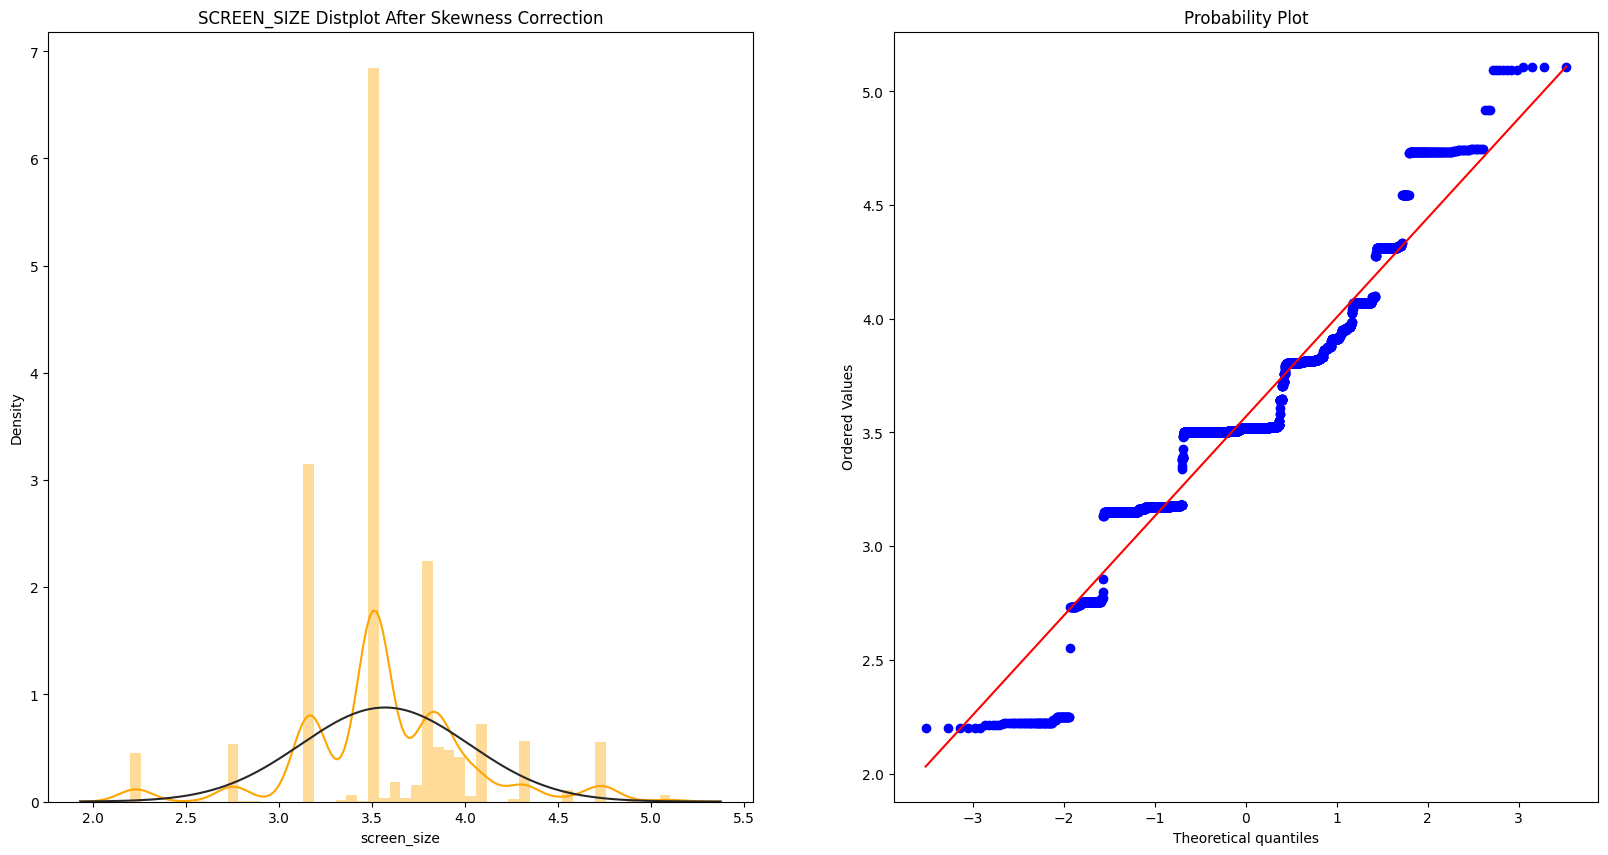

After Correcting
Mu after correcting REAR_CAMERA_MP : 2.9592967600910938, Sigma after correcting REAR_CAMERA_MP : 0.847889627462975


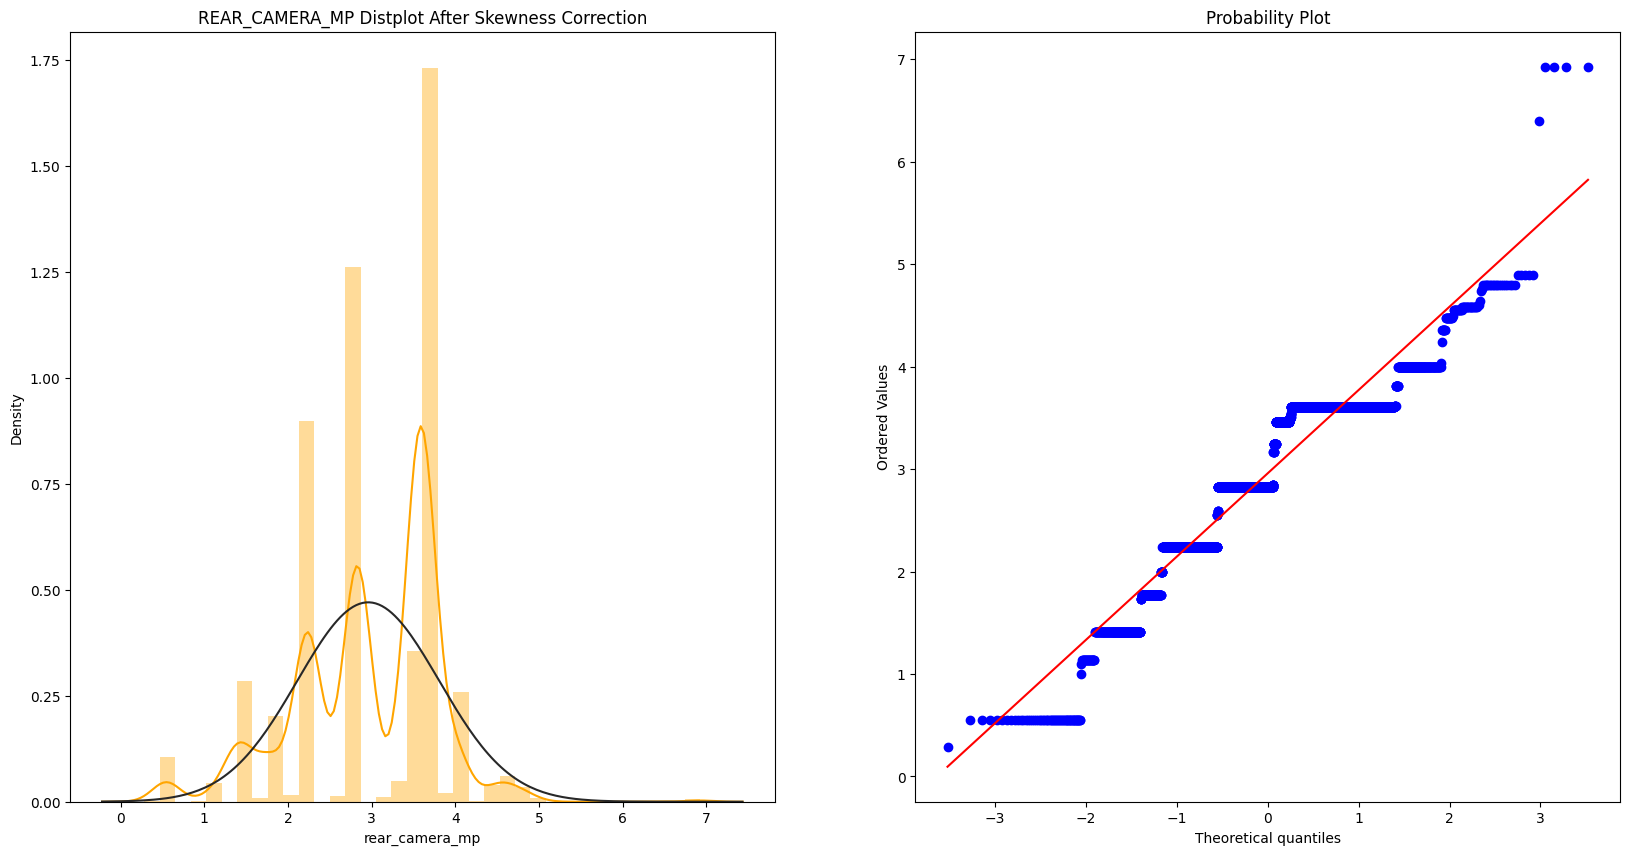

After Correcting
Mu after correcting FRONT_CAMERA_MP : 1.5268144858285813, Sigma after correcting FRONT_CAMERA_MP : 0.8193688139683319


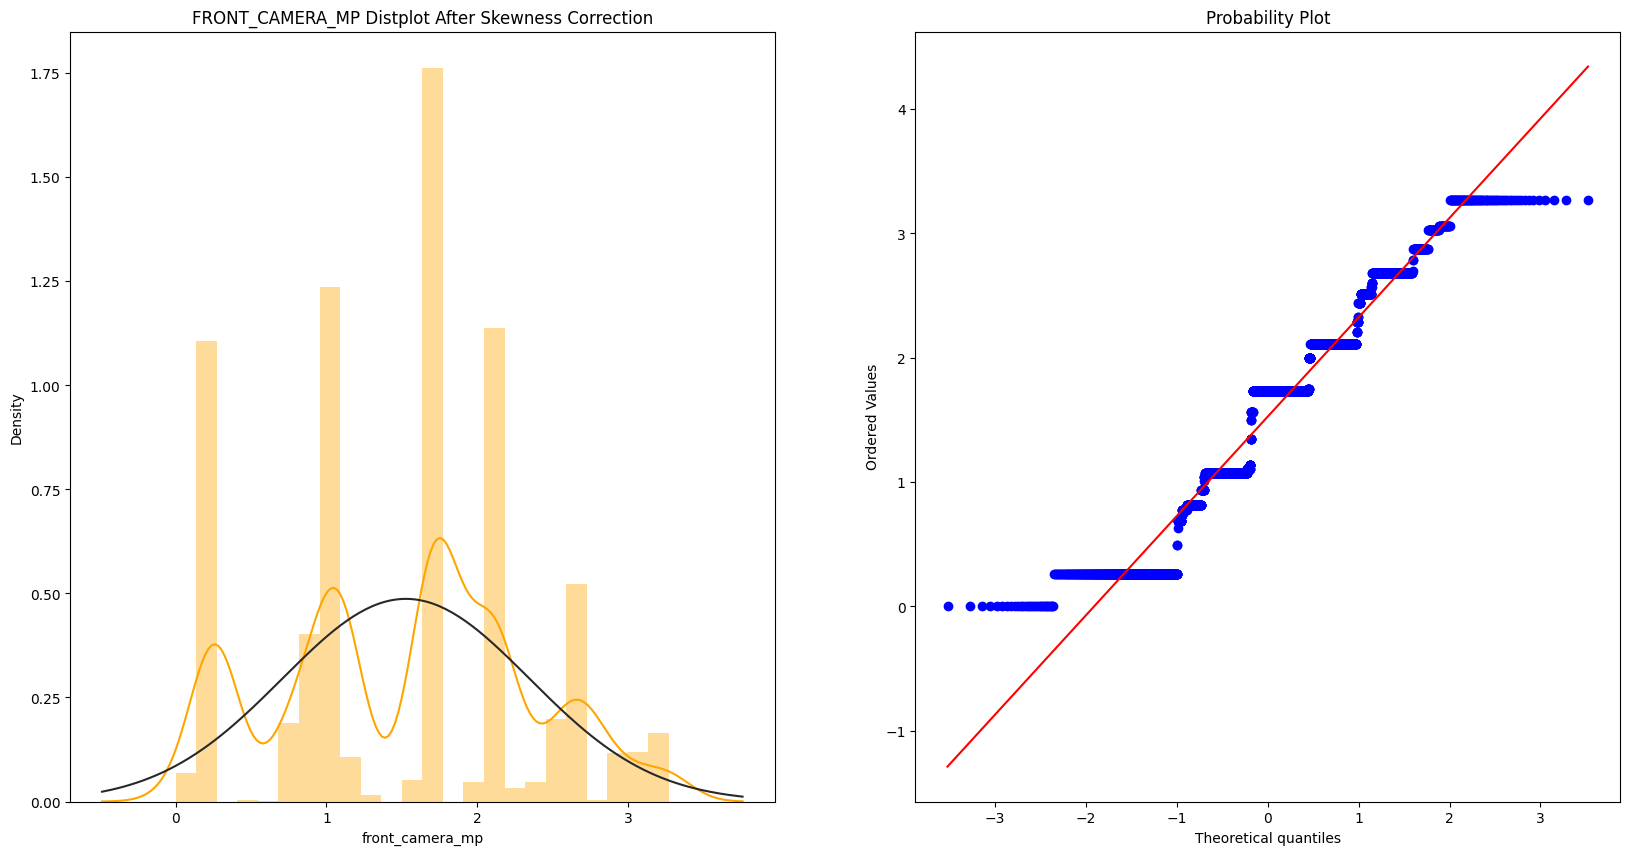

After Correcting
Mu after correcting BATTERY : 9.140952023574444, Sigma after correcting BATTERY : 0.5274073169353909


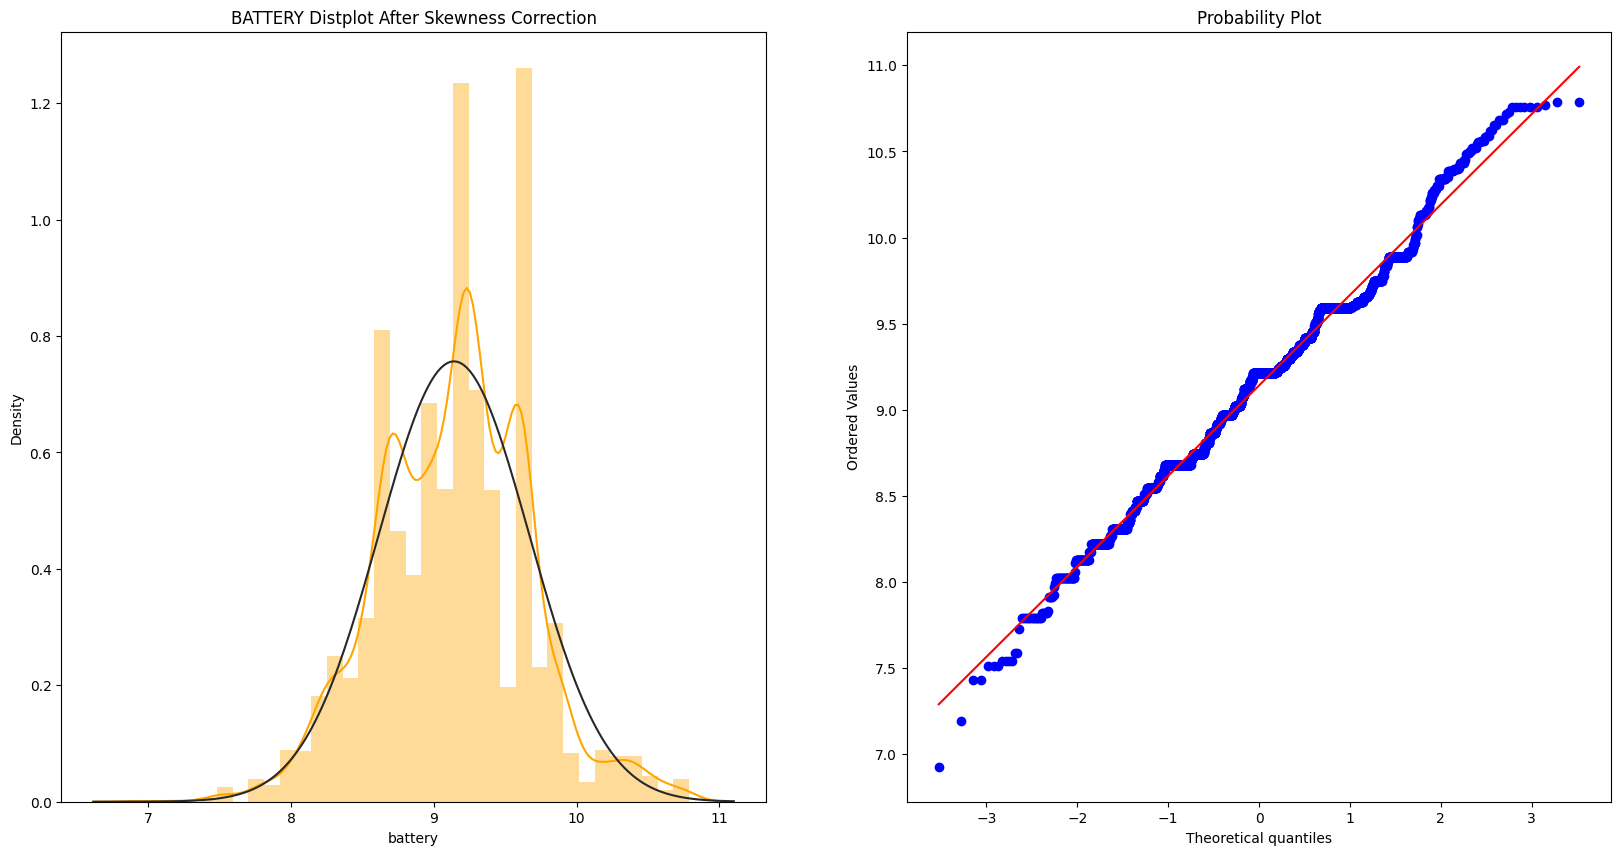

After Correcting
Mu after correcting WEIGHT : 0.006213180426972396, Sigma after correcting WEIGHT : 0.0017488702471315902


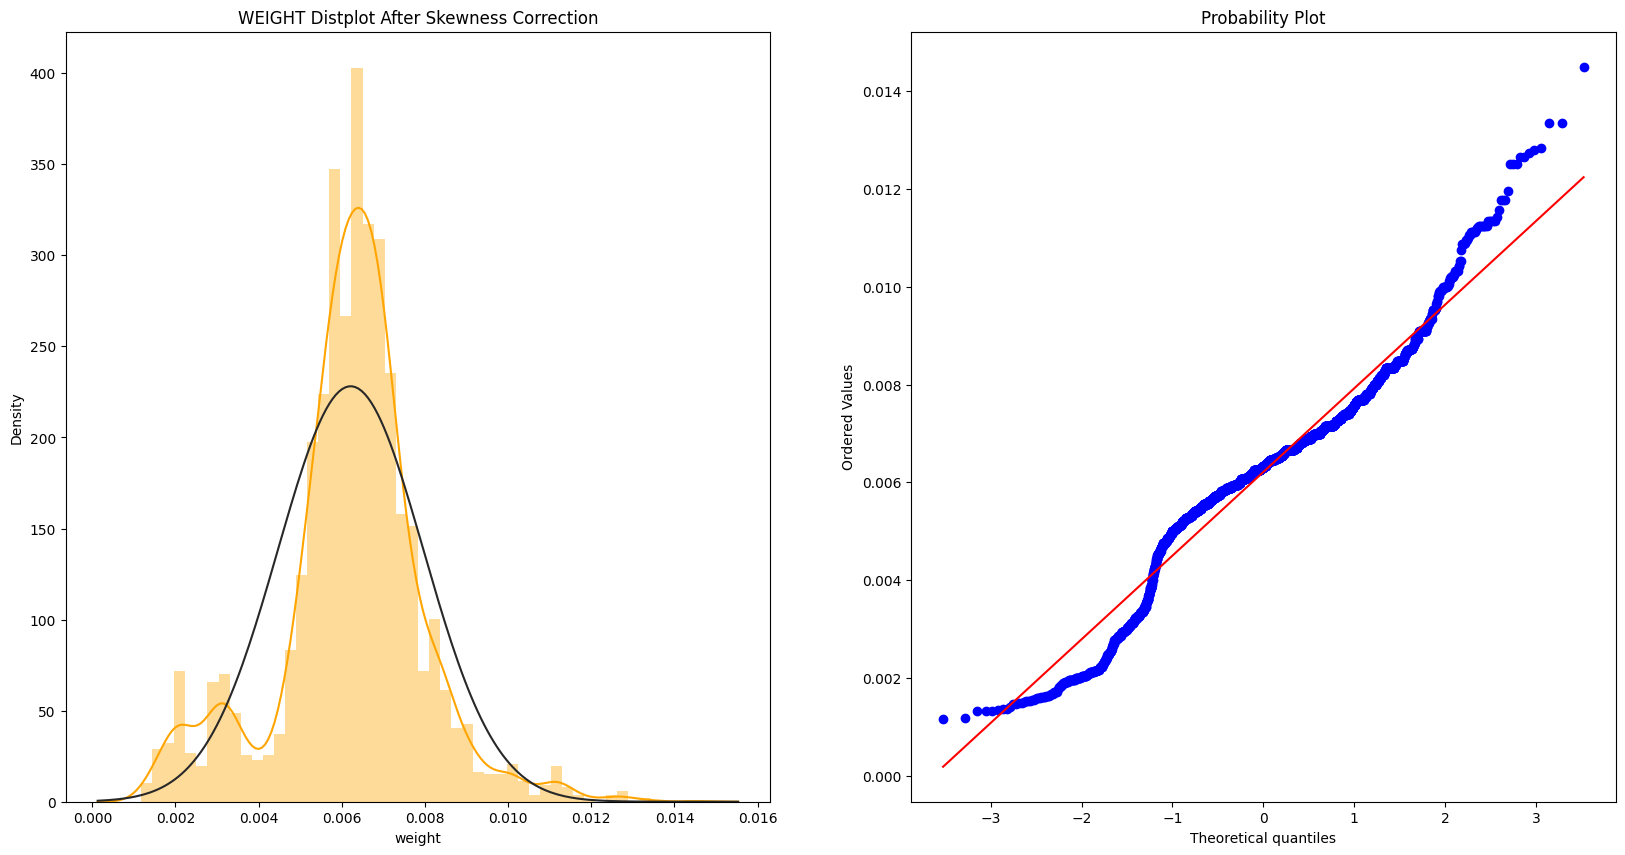

In [ ]:
skewColumnList1 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight']
for columns in skewColumnList1:
    skweness_correction(columns)

In [ ]:
data = data.drop(detect_outliers(cols2),axis = 0).reset_index(drop = True)

In [ ]:
data.shape[0]

2818

In [ ]:
data = data.drop(['os','device_brand'],axis=1)

In [ ]:
data

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
0        3.720275   1   0        3.605551         1.731322             64.0   
1        4.023023   1   1        3.605551         2.684077            128.0   
2        3.960345   1   1        3.605551         2.106805            128.0   
3        3.813117   1   0        3.605551         2.106805             64.0   
4        3.911944   1   0        3.605551         2.106805             64.0   
...           ...  ..  ..             ...              ...              ...   
2813     3.807562   1   0        2.828427         1.998335             64.0   
2814     3.804223   1   0        3.605551         2.106805            128.0   
2815     3.865771   1   0        3.605551         1.731322             32.0   
2816     3.865771   1   0        3.605551         1.731322             32.0   
2817     3.518543   1   0        3.605551         1.731322             16.0   

      ram   battery    weight  release_year  days_used  normalized_used_price  \
0     3.0  9.219591  0.006849          2020        127               4.307572   
1     8.0  9.687109  0.004695          2020        325               5.162097   
2     8.0  9.655799  0.004695          2020        162               5.111084   
3     3.0  9.888398  0.005405          2020        293               4.389995   
4     4.0  9.590960  0.005682          2020        223               4.413889   
...   ...       ...       ...           ...        ...                    ...   
2813  4.0  9.258228  0.005155          2019        208               5.100902   
2814  8.0  9.590960  0.005000          2018        541               5.037732   
2815  3.0  9.590960  0.006061          2020        201               4.357350   
2816  2.0  9.590960  0.006250          2020        149               4.349762   
2817  2.0  9.590960  0.005952          2020        176               4.132122   

      normalized_new_price  Device_Brand  
0                 4.715100      4.683326  
1                 5.519018      4.683326  
2                 5.884631      4.683326  
3                 4.947837      4.683326  
4                 5.060694      4.683326  
...                    ...           ...  
2813              6.287933      5.011901  
2814              6.251538      4.467399  
2815              4.528829      4.026423  
2816              4.624188      4.026423  
2817              4.279994      4.026423  

[2818 rows x 14 columns]

In [24]:
dummies_year = pd.get_dummies(data['release_year'],drop_first=True)
data = pd.concat([data,dummies_year],axis=1)
data = data.drop('release_year',axis=1)

In [25]:
Y = data['normalized_used_price']
X = data.loc[:, data.columns != 'normalized_used_price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [28]:
X_train.head()

device_brand       os  screen_size  4g  5g  rear_camera_mp  \
2830         Vivo  Android        15.32   1   0            13.0   
2792       Others  Android        12.70   0   0             8.0   
57         Huawei  Android        10.16   0   0             5.0   
1463         Lava  Android        10.34   0   0             8.0   
814        Others  Android        10.29   1   0             8.0   

      front_camera_mp  internal_memory  ram  battery  ...  days_used  \
2830             12.0             64.0  4.0   3260.0  ...        376   
2792              5.0             32.0  4.0   2500.0  ...        790   
57                2.0             16.0  4.0   1700.0  ...        666   
1463              0.3             16.0  4.0   2000.0  ...       1062   
814               0.3             16.0  4.0   1840.0  ...        710   

      normalized_new_price  Device_Brand  2014  2015  2016  2017  2018  2019  \
2830              5.695414      4.761832     0     0     0     0     1     0   
2792              4.692723      4.210719     0     1     0     0     0     0   
57                4.703113      4.690155     1     0     0     0     0     0   
1463              5.011635      3.932396     1     0     0     0     0     0   
814               4.385396      4.210719     1     0     0     0     0     0   

      2020  
2830     0  
2792     0  
57       0  
1463     0  
814      0  

[5 rows x 21 columns]

In [31]:
X_train.columns

Index([        'device_brand',                   'os',          'screen_size',
                         '4g',                   '5g',       'rear_camera_mp',
            'front_camera_mp',      'internal_memory',                  'ram',
                    'battery',               'weight',            'days_used',
       'normalized_new_price',         'Device_Brand',                   2014,
                         2015,                   2016,                   2017,
                         2018,                   2019,                   2020],
      dtype='object')

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Vivo'